In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
import scipy

import h5py

In [3]:
%matplotlib notebook

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### 10 sec. data

In [86]:
fnames = [r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X/Discharge_{}.h5'.format(i) for i in range(200)]
DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

OSError: Unable to open file (unable to open file: name = '/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X5/Discharge_0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.9774125066765444
x3 noise rms:  1.3947830355802813


In [7]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
for bb in DManalyzer.BDFs[::5]:
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft2 /= fft2[freq2==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].set(xlim=(135,170), xlabel='frequency[Hz.]', title='X2')
ax[1].set(xlim=(135,170), xlabel='frequency[Hz.]', title='X3')

<IPython.core.display.Javascript object>

[(135, 170), Text(0.5, 0, 'frequency[Hz.]'), Text(0.5, 1.0, 'X3')]

In [8]:
DManalyzer.get_delta_alpha(bdf_i=10, alpha_frequency=1, frequency=153)

***************************************************
bdf_i:  10 , AM frequency:  1
sensitivity:  9.74e-05


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(9.738209999800885e-05, <iminuit._libiminuit.Minuit at 0x79c09578>)

In [9]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.9774125066765444
x3 noise rms:  1.3947830355802813
***************************************************
bdf_i:  0 , AM frequency:  1
sensitivity:  2.82e-04
***************************************************
bdf_i:  1 , AM frequency:  1
sensitivity:  1.01e-04
***************************************************
bdf_i:  2 , AM frequency:  1
sensitivity:  4.43e-04
***************************************************
bdf_i:  3 , AM frequency:  1
sensitivity:  3.05e-04
***************************************************
bdf_i:  4 , AM frequency:  1
sensitivity:  2.30e-04
***************************************************
bdf_i:  5 , AM frequency:  1
sensitivity:  2.48e-04
***************************************************
bdf_i:  6 , AM frequency:  1
sensitivity:  1.28e-04
***************************************************
bdf_i:  7 , AM frequency:  1
sensitivity:  1.63e-04
***************************************************
bdf_i:  8 , AM frequency:  1
sensitivity:  1.79e

***************************************************
bdf_i:  90 , AM frequency:  1
sensitivity:  9.66e-04
***************************************************
bdf_i:  91 , AM frequency:  1
sensitivity:  1.70e-03
***************************************************
bdf_i:  92 , AM frequency:  1
sensitivity:  6.11e-04
***************************************************
bdf_i:  93 , AM frequency:  1
sensitivity:  6.22e-04
***************************************************
bdf_i:  94 , AM frequency:  1
sensitivity:  6.86e-04
***************************************************
bdf_i:  95 , AM frequency:  1
sensitivity:  8.17e-04
***************************************************
bdf_i:  96 , AM frequency:  1
sensitivity:  3.79e-04
***************************************************
bdf_i:  97 , AM frequency:  1
sensitivity:  2.19e-05
***************************************************
bdf_i:  98 , AM frequency:  1
sensitivity:  1.06e-05
***************************************************
bdf

***************************************************
bdf_i:  170 , AM frequency:  1
sensitivity:  1.08e-04
***************************************************
bdf_i:  171 , AM frequency:  1
sensitivity:  4.49e-04
***************************************************
bdf_i:  172 , AM frequency:  1
sensitivity:  3.38e-05
***************************************************
bdf_i:  173 , AM frequency:  1
sensitivity:  4.71e-04
***************************************************
bdf_i:  174 , AM frequency:  1
sensitivity:  2.26e-04
***************************************************
bdf_i:  175 , AM frequency:  1
sensitivity:  2.48e-04
***************************************************
bdf_i:  176 , AM frequency:  1
sensitivity:  1.69e-04
***************************************************
bdf_i:  177 , AM frequency:  1
sensitivity:  1.02e-04
***************************************************
bdf_i:  178 , AM frequency:  1
sensitivity:  2.65e-04
**********************************************

In [10]:
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [11]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[1].hist(A)

<IPython.core.display.Javascript object>

(array([ 1.,  1.,  1.,  8., 32., 66., 42., 35., 12.,  2.]),
 array([-3.29542908e-01, -2.74664481e-01, -2.19786055e-01, -1.64907628e-01,
        -1.10029201e-01, -5.51507739e-02, -2.72347052e-04,  5.46060798e-02,
         1.09484507e-01,  1.64362934e-01,  2.19241360e-01]),
 <a list of 10 Patch objects>)

In [12]:
alphas_freq = np.logspace(-4, 0.7, 100)
limit = [DManalyzer.get_sensitivity(alpha_frequency=freq) for freq in alphas_freq]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  0.0001
sensitivity:  2.73e-02
***************************************************
bdf_i:  1 , AM frequency:  0.0001
sensitivity:  8.93e-02
***************************************************
bdf_i:  2 , AM frequency:  0.0001
sensitivity:  4.42e-01
***************************************************
bdf_i:  3 , AM frequency:  0.0001
sensitivity:  5.14e-02
***************************************************
bdf_i:  4 , AM frequency:  0.0001
sensitivity:  4.36e-01
***************************************************
bdf_i:  5 , AM frequency:  0.0001
sensitivity:  2.41e-01
***************************************************
bdf_i:  6 , AM frequency:  0.0001
sensitivity:  4.25e-01
***************************************************
bdf_i:  7 , AM frequency:  0.0001
sensitivity:  2.50e-01
***************************************************
bdf_i:  8 , AM frequency:  0.0001
sensitivity:  4.57e-02
*******************

***************************************************
bdf_i:  84 , AM frequency:  0.0001
sensitivity:  3.88e-02
***************************************************
bdf_i:  85 , AM frequency:  0.0001
sensitivity:  5.17e-01
***************************************************
bdf_i:  86 , AM frequency:  0.0001
sensitivity:  1.92e-01
***************************************************
bdf_i:  87 , AM frequency:  0.0001
sensitivity:  5.17e-01
***************************************************
bdf_i:  88 , AM frequency:  0.0001
sensitivity:  5.15e-01
***************************************************
bdf_i:  89 , AM frequency:  0.0001
sensitivity:  5.12e-01
***************************************************
bdf_i:  90 , AM frequency:  0.0001
sensitivity:  4.26e-01
***************************************************
bdf_i:  91 , AM frequency:  0.0001
sensitivity:  3.62e-01
***************************************************
bdf_i:  92 , AM frequency:  0.0001
sensitivity:  3.98e-01
**********

***************************************************
bdf_i:  165 , AM frequency:  0.0001
sensitivity:  2.64e-06
***************************************************
bdf_i:  166 , AM frequency:  0.0001
sensitivity:  8.27e-02
***************************************************
bdf_i:  167 , AM frequency:  0.0001
sensitivity:  1.36e-01
***************************************************
bdf_i:  168 , AM frequency:  0.0001
sensitivity:  1.46e-02
***************************************************
bdf_i:  169 , AM frequency:  0.0001
sensitivity:  8.40e-06
***************************************************
bdf_i:  170 , AM frequency:  0.0001
sensitivity:  1.30e-01
***************************************************
bdf_i:  171 , AM frequency:  0.0001
sensitivity:  4.84e-01
***************************************************
bdf_i:  172 , AM frequency:  0.0001
sensitivity:  3.31e-06
***************************************************
bdf_i:  173 , AM frequency:  0.0001
sensitivity:  7.66e-03
*

***************************************************
bdf_i:  34 , AM frequency:  0.00011155132867310928
sensitivity:  4.67e-01
***************************************************
bdf_i:  35 , AM frequency:  0.00011155132867310928
sensitivity:  1.51e-01
***************************************************
bdf_i:  36 , AM frequency:  0.00011155132867310928
sensitivity:  6.18e-02
***************************************************
bdf_i:  37 , AM frequency:  0.00011155132867310928
sensitivity:  4.82e-01
***************************************************
bdf_i:  38 , AM frequency:  0.00011155132867310928
sensitivity:  2.36e-01
***************************************************
bdf_i:  39 , AM frequency:  0.00011155132867310928
sensitivity:  8.81e-02
***************************************************
bdf_i:  40 , AM frequency:  0.00011155132867310928
sensitivity:  3.65e-01
***************************************************
bdf_i:  41 , AM frequency:  0.00011155132867310928
sensitivity:  1

***************************************************
bdf_i:  103 , AM frequency:  0.00011155132867310928
sensitivity:  1.86e-01
***************************************************
bdf_i:  104 , AM frequency:  0.00011155132867310928
sensitivity:  4.74e-01
***************************************************
bdf_i:  105 , AM frequency:  0.00011155132867310928
sensitivity:  4.73e-01
***************************************************
bdf_i:  106 , AM frequency:  0.00011155132867310928
sensitivity:  1.13e-01
***************************************************
bdf_i:  107 , AM frequency:  0.00011155132867310928
sensitivity:  6.51e-06
***************************************************
bdf_i:  108 , AM frequency:  0.00011155132867310928
sensitivity:  2.18e-01
***************************************************
bdf_i:  109 , AM frequency:  0.00011155132867310928
sensitivity:  2.31e-01
***************************************************
bdf_i:  110 , AM frequency:  0.00011155132867310928
sensiti

***************************************************
bdf_i:  180 , AM frequency:  0.00011155132867310928
sensitivity:  4.29e-02
***************************************************
bdf_i:  181 , AM frequency:  0.00011155132867310928
sensitivity:  4.91e-01
***************************************************
bdf_i:  182 , AM frequency:  0.00011155132867310928
sensitivity:  4.97e-01
***************************************************
bdf_i:  183 , AM frequency:  0.00011155132867310928
sensitivity:  1.45e-01
***************************************************
bdf_i:  184 , AM frequency:  0.00011155132867310928
sensitivity:  4.11e-01
***************************************************
bdf_i:  185 , AM frequency:  0.00011155132867310928
sensitivity:  5.05e-01
***************************************************
bdf_i:  186 , AM frequency:  0.00011155132867310928
sensitivity:  4.66e-02
***************************************************
bdf_i:  187 , AM frequency:  0.00011155132867310928
sensiti

***************************************************
bdf_i:  52 , AM frequency:  0.0001244369892873604
sensitivity:  2.56e-01
***************************************************
bdf_i:  53 , AM frequency:  0.0001244369892873604
sensitivity:  8.95e-02
***************************************************
bdf_i:  54 , AM frequency:  0.0001244369892873604
sensitivity:  1.61e-02
***************************************************
bdf_i:  55 , AM frequency:  0.0001244369892873604
sensitivity:  3.64e-02
***************************************************
bdf_i:  56 , AM frequency:  0.0001244369892873604
sensitivity:  5.03e-01
***************************************************
bdf_i:  57 , AM frequency:  0.0001244369892873604
sensitivity:  4.39e-02
***************************************************
bdf_i:  58 , AM frequency:  0.0001244369892873604
sensitivity:  2.99e-06
***************************************************
bdf_i:  59 , AM frequency:  0.0001244369892873604
sensitivity:  1.21e-01


***************************************************
bdf_i:  121 , AM frequency:  0.0001244369892873604
sensitivity:  1.61e-01
***************************************************
bdf_i:  122 , AM frequency:  0.0001244369892873604
sensitivity:  2.25e-01
***************************************************
bdf_i:  123 , AM frequency:  0.0001244369892873604
sensitivity:  2.01e-01
***************************************************
bdf_i:  124 , AM frequency:  0.0001244369892873604
sensitivity:  5.84e-02
***************************************************
bdf_i:  125 , AM frequency:  0.0001244369892873604
sensitivity:  4.42e-01
***************************************************
bdf_i:  126 , AM frequency:  0.0001244369892873604
sensitivity:  1.24e-01
***************************************************
bdf_i:  127 , AM frequency:  0.0001244369892873604
sensitivity:  2.73e-01
***************************************************
bdf_i:  128 , AM frequency:  0.0001244369892873604
sensitivity:  2

***************************************************
bdf_i:  195 , AM frequency:  0.0001244369892873604
sensitivity:  2.23e-01
***************************************************
bdf_i:  196 , AM frequency:  0.0001244369892873604
sensitivity:  1.79e-01
***************************************************
bdf_i:  197 , AM frequency:  0.0001244369892873604
sensitivity:  1.26e-05
***************************************************
bdf_i:  198 , AM frequency:  0.0001244369892873604
sensitivity:  3.81e-03
***************************************************
bdf_i:  199 , AM frequency:  0.0001244369892873604
sensitivity:  6.61e-06
***************************************************
average:  0.19443172157460037 std:  0.17261617418850242
standard error:  0.012205806731116835
***************************************************
bdf_i:  0 , AM frequency:  0.00013881111491086522
sensitivity:  7.87e-02
***************************************************
bdf_i:  1 , AM frequency:  0.000138811114910865

***************************************************
bdf_i:  59 , AM frequency:  0.00013881111491086522
sensitivity:  1.08e-01
***************************************************
bdf_i:  60 , AM frequency:  0.00013881111491086522
sensitivity:  3.27e-01
***************************************************
bdf_i:  61 , AM frequency:  0.00013881111491086522
sensitivity:  3.83e-06
***************************************************
bdf_i:  62 , AM frequency:  0.00013881111491086522
sensitivity:  5.95e-06
***************************************************
bdf_i:  63 , AM frequency:  0.00013881111491086522
sensitivity:  5.16e-01
***************************************************
bdf_i:  64 , AM frequency:  0.00013881111491086522
sensitivity:  2.76e-02
***************************************************
bdf_i:  65 , AM frequency:  0.00013881111491086522
sensitivity:  1.25e-02
***************************************************
bdf_i:  66 , AM frequency:  0.00013881111491086522
sensitivity:  1

***************************************************
bdf_i:  129 , AM frequency:  0.00013881111491086522
sensitivity:  4.56e-01
***************************************************
bdf_i:  130 , AM frequency:  0.00013881111491086522
sensitivity:  1.47e-01
***************************************************
bdf_i:  131 , AM frequency:  0.00013881111491086522
sensitivity:  2.44e-01
***************************************************
bdf_i:  132 , AM frequency:  0.00013881111491086522
sensitivity:  4.49e-01
***************************************************
bdf_i:  133 , AM frequency:  0.00013881111491086522
sensitivity:  2.23e-01
***************************************************
bdf_i:  134 , AM frequency:  0.00013881111491086522
sensitivity:  3.98e-02
***************************************************
bdf_i:  135 , AM frequency:  0.00013881111491086522
sensitivity:  1.00e-01
***************************************************
bdf_i:  136 , AM frequency:  0.00013881111491086522
sensiti

***************************************************
bdf_i:  4 , AM frequency:  0.00015484564302902648
sensitivity:  9.39e-02
***************************************************
bdf_i:  5 , AM frequency:  0.00015484564302902648
sensitivity:  1.56e-01
***************************************************
bdf_i:  6 , AM frequency:  0.00015484564302902648
sensitivity:  7.91e-02
***************************************************
bdf_i:  7 , AM frequency:  0.00015484564302902648
sensitivity:  1.61e-01
***************************************************
bdf_i:  8 , AM frequency:  0.00015484564302902648
sensitivity:  2.95e-02
***************************************************
bdf_i:  9 , AM frequency:  0.00015484564302902648
sensitivity:  6.19e-02
***************************************************
bdf_i:  10 , AM frequency:  0.00015484564302902648
sensitivity:  2.75e-02
***************************************************
bdf_i:  11 , AM frequency:  0.00015484564302902648
sensitivity:  1.81e-0

***************************************************
bdf_i:  76 , AM frequency:  0.00015484564302902648
sensitivity:  5.22e-01
***************************************************
bdf_i:  77 , AM frequency:  0.00015484564302902648
sensitivity:  1.04e-02
***************************************************
bdf_i:  78 , AM frequency:  0.00015484564302902648
sensitivity:  2.81e-02
***************************************************
bdf_i:  79 , AM frequency:  0.00015484564302902648
sensitivity:  1.63e-01
***************************************************
bdf_i:  80 , AM frequency:  0.00015484564302902648
sensitivity:  3.01e-01
***************************************************
bdf_i:  81 , AM frequency:  0.00015484564302902648
sensitivity:  1.29e-05
***************************************************
bdf_i:  82 , AM frequency:  0.00015484564302902648
sensitivity:  1.60e-01
***************************************************
bdf_i:  83 , AM frequency:  0.00015484564302902648
sensitivity:  1

***************************************************
bdf_i:  151 , AM frequency:  0.00015484564302902648
sensitivity:  1.14e-01
***************************************************
bdf_i:  152 , AM frequency:  0.00015484564302902648
sensitivity:  2.60e-01
***************************************************
bdf_i:  153 , AM frequency:  0.00015484564302902648
sensitivity:  9.56e-02
***************************************************
bdf_i:  154 , AM frequency:  0.00015484564302902648
sensitivity:  5.58e-02
***************************************************
bdf_i:  155 , AM frequency:  0.00015484564302902648
sensitivity:  5.82e-02
***************************************************
bdf_i:  156 , AM frequency:  0.00015484564302902648
sensitivity:  3.07e-06
***************************************************
bdf_i:  157 , AM frequency:  0.00015484564302902648
sensitivity:  4.13e-01
***************************************************
bdf_i:  158 , AM frequency:  0.00015484564302902648
sensiti

***************************************************
bdf_i:  22 , AM frequency:  0.00017273237219129887
sensitivity:  5.09e-06
***************************************************
bdf_i:  23 , AM frequency:  0.00017273237219129887
sensitivity:  2.12e-02
***************************************************
bdf_i:  24 , AM frequency:  0.00017273237219129887
sensitivity:  2.56e-01
***************************************************
bdf_i:  25 , AM frequency:  0.00017273237219129887
sensitivity:  1.48e-05
***************************************************
bdf_i:  26 , AM frequency:  0.00017273237219129887
sensitivity:  4.06e-01
***************************************************
bdf_i:  27 , AM frequency:  0.00017273237219129887
sensitivity:  1.58e-01
***************************************************
bdf_i:  28 , AM frequency:  0.00017273237219129887
sensitivity:  3.39e-01
***************************************************
bdf_i:  29 , AM frequency:  0.00017273237219129887
sensitivity:  1

***************************************************
bdf_i:  90 , AM frequency:  0.00017273237219129887
sensitivity:  5.14e-01
***************************************************
bdf_i:  91 , AM frequency:  0.00017273237219129887
sensitivity:  2.09e-01
***************************************************
bdf_i:  92 , AM frequency:  0.00017273237219129887
sensitivity:  2.30e-01
***************************************************
bdf_i:  93 , AM frequency:  0.00017273237219129887
sensitivity:  6.95e-06
***************************************************
bdf_i:  94 , AM frequency:  0.00017273237219129887
sensitivity:  2.51e-01
***************************************************
bdf_i:  95 , AM frequency:  0.00017273237219129887
sensitivity:  1.40e-05
***************************************************
bdf_i:  96 , AM frequency:  0.00017273237219129887
sensitivity:  2.12e-01
***************************************************
bdf_i:  97 , AM frequency:  0.00017273237219129887
sensitivity:  2

***************************************************
bdf_i:  160 , AM frequency:  0.00017273237219129887
sensitivity:  3.76e-01
***************************************************
bdf_i:  161 , AM frequency:  0.00017273237219129887
sensitivity:  1.03e-01
***************************************************
bdf_i:  162 , AM frequency:  0.00017273237219129887
sensitivity:  4.69e-01
***************************************************
bdf_i:  163 , AM frequency:  0.00017273237219129887
sensitivity:  1.81e-01
***************************************************
bdf_i:  164 , AM frequency:  0.00017273237219129887
sensitivity:  3.80e-05
***************************************************
bdf_i:  165 , AM frequency:  0.00017273237219129887
sensitivity:  3.30e-06
***************************************************
bdf_i:  166 , AM frequency:  0.00017273237219129887
sensitivity:  4.79e-02
***************************************************
bdf_i:  167 , AM frequency:  0.00017273237219129887
sensiti

***************************************************
bdf_i:  31 , AM frequency:  0.00019268525622797403
sensitivity:  4.17e-01
***************************************************
bdf_i:  32 , AM frequency:  0.00019268525622797403
sensitivity:  1.21e-01
***************************************************
bdf_i:  33 , AM frequency:  0.00019268525622797403
sensitivity:  2.33e-01
***************************************************
bdf_i:  34 , AM frequency:  0.00019268525622797403
sensitivity:  4.67e-01
***************************************************
bdf_i:  35 , AM frequency:  0.00019268525622797403
sensitivity:  2.20e-02
***************************************************
bdf_i:  36 , AM frequency:  0.00019268525622797403
sensitivity:  5.15e-04
***************************************************
bdf_i:  37 , AM frequency:  0.00019268525622797403
sensitivity:  4.82e-01
***************************************************
bdf_i:  38 , AM frequency:  0.00019268525622797403
sensitivity:  1

***************************************************
bdf_i:  98 , AM frequency:  0.00019268525622797403
sensitivity:  5.13e-01
***************************************************
bdf_i:  99 , AM frequency:  0.00019268525622797403
sensitivity:  5.06e-01
***************************************************
bdf_i:  100 , AM frequency:  0.00019268525622797403
sensitivity:  4.68e-01
***************************************************
bdf_i:  101 , AM frequency:  0.00019268525622797403
sensitivity:  2.56e-01
***************************************************
bdf_i:  102 , AM frequency:  0.00019268525622797403
sensitivity:  2.65e-06
***************************************************
bdf_i:  103 , AM frequency:  0.00019268525622797403
sensitivity:  1.08e-01
***************************************************
bdf_i:  104 , AM frequency:  0.00019268525622797403
sensitivity:  3.45e-01
***************************************************
bdf_i:  105 , AM frequency:  0.00019268525622797403
sensitivi

***************************************************
bdf_i:  169 , AM frequency:  0.00019268525622797403
sensitivity:  2.40e-01
***************************************************
bdf_i:  170 , AM frequency:  0.00019268525622797403
sensitivity:  6.75e-02
***************************************************
bdf_i:  171 , AM frequency:  0.00019268525622797403
sensitivity:  1.22e-01
***************************************************
bdf_i:  172 , AM frequency:  0.00019268525622797403
sensitivity:  1.16e-01
***************************************************
bdf_i:  173 , AM frequency:  0.00019268525622797403
sensitivity:  2.18e-02
***************************************************
bdf_i:  174 , AM frequency:  0.00019268525622797403
sensitivity:  4.14e-01
***************************************************
bdf_i:  175 , AM frequency:  0.00019268525622797403
sensitivity:  4.38e-01
***************************************************
bdf_i:  176 , AM frequency:  0.00019268525622797403
sensiti

***************************************************
bdf_i:  42 , AM frequency:  0.0002149429634794901
sensitivity:  5.39e-06
***************************************************
bdf_i:  43 , AM frequency:  0.0002149429634794901
sensitivity:  1.30e-01
***************************************************
bdf_i:  44 , AM frequency:  0.0002149429634794901
sensitivity:  7.51e-02
***************************************************
bdf_i:  45 , AM frequency:  0.0002149429634794901
sensitivity:  2.38e-06
***************************************************
bdf_i:  46 , AM frequency:  0.0002149429634794901
sensitivity:  5.53e-06
***************************************************
bdf_i:  47 , AM frequency:  0.0002149429634794901
sensitivity:  2.58e-02
***************************************************
bdf_i:  48 , AM frequency:  0.0002149429634794901
sensitivity:  3.07e-04
***************************************************
bdf_i:  49 , AM frequency:  0.0002149429634794901
sensitivity:  9.25e-02


***************************************************
bdf_i:  108 , AM frequency:  0.0002149429634794901
sensitivity:  4.52e-01
***************************************************
bdf_i:  109 , AM frequency:  0.0002149429634794901
sensitivity:  2.97e-02
***************************************************
bdf_i:  110 , AM frequency:  0.0002149429634794901
sensitivity:  9.43e-02
***************************************************
bdf_i:  111 , AM frequency:  0.0002149429634794901
sensitivity:  4.14e-01
***************************************************
bdf_i:  112 , AM frequency:  0.0002149429634794901
sensitivity:  7.56e-02
***************************************************
bdf_i:  113 , AM frequency:  0.0002149429634794901
sensitivity:  7.56e-02
***************************************************
bdf_i:  114 , AM frequency:  0.0002149429634794901
sensitivity:  1.52e-01
***************************************************
bdf_i:  115 , AM frequency:  0.0002149429634794901
sensitivity:  5

***************************************************
bdf_i:  177 , AM frequency:  0.0002149429634794901
sensitivity:  3.96e-01
***************************************************
bdf_i:  178 , AM frequency:  0.0002149429634794901
sensitivity:  3.94e-02
***************************************************
bdf_i:  179 , AM frequency:  0.0002149429634794901
sensitivity:  4.86e-01
***************************************************
bdf_i:  180 , AM frequency:  0.0002149429634794901
sensitivity:  2.22e-02
***************************************************
bdf_i:  181 , AM frequency:  0.0002149429634794901
sensitivity:  8.57e-02
***************************************************
bdf_i:  182 , AM frequency:  0.0002149429634794901
sensitivity:  2.27e-01
***************************************************
bdf_i:  183 , AM frequency:  0.0002149429634794901
sensitivity:  2.11e-06
***************************************************
bdf_i:  184 , AM frequency:  0.0002149429634794901
sensitivity:  5

***************************************************
bdf_i:  46 , AM frequency:  0.00023977173165072702
sensitivity:  4.58e-03
***************************************************
bdf_i:  47 , AM frequency:  0.00023977173165072702
sensitivity:  2.31e-02
***************************************************
bdf_i:  48 , AM frequency:  0.00023977173165072702
sensitivity:  1.59e-05
***************************************************
bdf_i:  49 , AM frequency:  0.00023977173165072702
sensitivity:  3.32e-01
***************************************************
bdf_i:  50 , AM frequency:  0.00023977173165072702
sensitivity:  5.70e-03
***************************************************
bdf_i:  51 , AM frequency:  0.00023977173165072702
sensitivity:  1.91e-02
***************************************************
bdf_i:  52 , AM frequency:  0.00023977173165072702
sensitivity:  1.33e-01
***************************************************
bdf_i:  53 , AM frequency:  0.00023977173165072702
sensitivity:  4

***************************************************
bdf_i:  118 , AM frequency:  0.00023977173165072702
sensitivity:  3.21e-07
***************************************************
bdf_i:  119 , AM frequency:  0.00023977173165072702
sensitivity:  6.62e-02
***************************************************
bdf_i:  120 , AM frequency:  0.00023977173165072702
sensitivity:  3.94e-02
***************************************************
bdf_i:  121 , AM frequency:  0.00023977173165072702
sensitivity:  8.36e-02
***************************************************
bdf_i:  122 , AM frequency:  0.00023977173165072702
sensitivity:  1.17e-01
***************************************************
bdf_i:  123 , AM frequency:  0.00023977173165072702
sensitivity:  1.04e-01
***************************************************
bdf_i:  124 , AM frequency:  0.00023977173165072702
sensitivity:  3.03e-02
***************************************************
bdf_i:  125 , AM frequency:  0.00023977173165072702
sensiti

***************************************************
bdf_i:  187 , AM frequency:  0.00023977173165072702
sensitivity:  6.65e-02
***************************************************
bdf_i:  188 , AM frequency:  0.00023977173165072702
sensitivity:  2.98e-02
***************************************************
bdf_i:  189 , AM frequency:  0.00023977173165072702
sensitivity:  2.25e-02
***************************************************
bdf_i:  190 , AM frequency:  0.00023977173165072702
sensitivity:  1.01e-01
***************************************************
bdf_i:  191 , AM frequency:  0.00023977173165072702
sensitivity:  9.97e-04
***************************************************
bdf_i:  192 , AM frequency:  0.00023977173165072702
sensitivity:  8.94e-06
***************************************************
bdf_i:  193 , AM frequency:  0.00023977173165072702
sensitivity:  1.14e-01
***************************************************
bdf_i:  194 , AM frequency:  0.00023977173165072702
sensiti

***************************************************
bdf_i:  58 , AM frequency:  0.0002674685524389081
sensitivity:  5.98e-02
***************************************************
bdf_i:  59 , AM frequency:  0.0002674685524389081
sensitivity:  5.62e-02
***************************************************
bdf_i:  60 , AM frequency:  0.0002674685524389081
sensitivity:  1.70e-01
***************************************************
bdf_i:  61 , AM frequency:  0.0002674685524389081
sensitivity:  1.83e-02
***************************************************
bdf_i:  62 , AM frequency:  0.0002674685524389081
sensitivity:  8.48e-06
***************************************************
bdf_i:  63 , AM frequency:  0.0002674685524389081
sensitivity:  1.64e-01
***************************************************
bdf_i:  64 , AM frequency:  0.0002674685524389081
sensitivity:  3.91e-06
***************************************************
bdf_i:  65 , AM frequency:  0.0002674685524389081
sensitivity:  1.34e-05


***************************************************
bdf_i:  125 , AM frequency:  0.0002674685524389081
sensitivity:  2.84e-01
***************************************************
bdf_i:  126 , AM frequency:  0.0002674685524389081
sensitivity:  5.77e-02
***************************************************
bdf_i:  127 , AM frequency:  0.0002674685524389081
sensitivity:  2.10e-06
***************************************************
bdf_i:  128 , AM frequency:  0.0002674685524389081
sensitivity:  1.04e-01
***************************************************
bdf_i:  129 , AM frequency:  0.0002674685524389081
sensitivity:  6.88e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0002674685524389081
sensitivity:  7.63e-02
***************************************************
bdf_i:  131 , AM frequency:  0.0002674685524389081
sensitivity:  1.27e-01
***************************************************
bdf_i:  132 , AM frequency:  0.0002674685524389081
sensitivity:  8

***************************************************
bdf_i:  193 , AM frequency:  0.0002674685524389081
sensitivity:  4.08e-01
***************************************************
bdf_i:  194 , AM frequency:  0.0002674685524389081
sensitivity:  2.47e-02
***************************************************
bdf_i:  195 , AM frequency:  0.0002674685524389081
sensitivity:  2.61e-02
***************************************************
bdf_i:  196 , AM frequency:  0.0002674685524389081
sensitivity:  8.34e-02
***************************************************
bdf_i:  197 , AM frequency:  0.0002674685524389081
sensitivity:  1.11e-02
***************************************************
bdf_i:  198 , AM frequency:  0.0002674685524389081
sensitivity:  1.77e-03
***************************************************
bdf_i:  199 , AM frequency:  0.0002674685524389081
sensitivity:  7.21e-03
***************************************************
average:  0.10946402642445775 std:  0.12159335117792765
standard e

***************************************************
bdf_i:  61 , AM frequency:  0.00029836472402833405
sensitivity:  1.64e-02
***************************************************
bdf_i:  62 , AM frequency:  0.00029836472402833405
sensitivity:  1.92e-05
***************************************************
bdf_i:  63 , AM frequency:  0.00029836472402833405
sensitivity:  1.47e-01
***************************************************
bdf_i:  64 , AM frequency:  0.00029836472402833405
sensitivity:  1.29e-02
***************************************************
bdf_i:  65 , AM frequency:  0.00029836472402833405
sensitivity:  2.84e-02
***************************************************
bdf_i:  66 , AM frequency:  0.00029836472402833405
sensitivity:  1.58e-02
***************************************************
bdf_i:  67 , AM frequency:  0.00029836472402833405
sensitivity:  1.60e-01
***************************************************
bdf_i:  68 , AM frequency:  0.00029836472402833405
sensitivity:  1

bdf_i:  128 , AM frequency:  0.00029836472402833405
sensitivity:  3.72e-01
***************************************************
bdf_i:  129 , AM frequency:  0.00029836472402833405
sensitivity:  6.17e-02
***************************************************
bdf_i:  130 , AM frequency:  0.00029836472402833405
sensitivity:  2.68e-01
***************************************************
bdf_i:  131 , AM frequency:  0.00029836472402833405
sensitivity:  4.43e-01
***************************************************
bdf_i:  132 , AM frequency:  0.00029836472402833405
sensitivity:  7.25e-02
***************************************************
bdf_i:  133 , AM frequency:  0.00029836472402833405
sensitivity:  1.04e-01
***************************************************
bdf_i:  134 , AM frequency:  0.00029836472402833405
sensitivity:  1.85e-02
***************************************************
bdf_i:  135 , AM frequency:  0.00029836472402833405
sensitivity:  4.66e-02
************************************

***************************************************
bdf_i:  198 , AM frequency:  0.00029836472402833405
sensitivity:  1.83e-06
***************************************************
bdf_i:  199 , AM frequency:  0.00029836472402833405
sensitivity:  4.02e-06
***************************************************
average:  0.11189339045275135 std:  0.1313604812960776
standard error:  0.009288588710438512
***************************************************
bdf_i:  0 , AM frequency:  0.000332829813945462
sensitivity:  8.19e-03
***************************************************
bdf_i:  1 , AM frequency:  0.000332829813945462
sensitivity:  2.68e-02
***************************************************
bdf_i:  2 , AM frequency:  0.000332829813945462
sensitivity:  1.96e-01
***************************************************
bdf_i:  3 , AM frequency:  0.000332829813945462
sensitivity:  1.54e-02
***************************************************
bdf_i:  4 , AM frequency:  0.000332829813945462
sensitivi

sensitivity:  4.41e-06
***************************************************
bdf_i:  65 , AM frequency:  0.000332829813945462
sensitivity:  5.20e-03
***************************************************
bdf_i:  66 , AM frequency:  0.000332829813945462
sensitivity:  1.42e-02
***************************************************
bdf_i:  67 , AM frequency:  0.000332829813945462
sensitivity:  3.49e-02
***************************************************
bdf_i:  68 , AM frequency:  0.000332829813945462
sensitivity:  1.26e-01
***************************************************
bdf_i:  69 , AM frequency:  0.000332829813945462
sensitivity:  1.84e-01
***************************************************
bdf_i:  70 , AM frequency:  0.000332829813945462
sensitivity:  1.14e-01
***************************************************
bdf_i:  71 , AM frequency:  0.000332829813945462
sensitivity:  3.90e-02
***************************************************
bdf_i:  72 , AM frequency:  0.000332829813945462
sensitiv

***************************************************
bdf_i:  140 , AM frequency:  0.000332829813945462
sensitivity:  6.28e-02
***************************************************
bdf_i:  141 , AM frequency:  0.000332829813945462
sensitivity:  1.03e-01
***************************************************
bdf_i:  142 , AM frequency:  0.000332829813945462
sensitivity:  3.62e-01
***************************************************
bdf_i:  143 , AM frequency:  0.000332829813945462
sensitivity:  7.44e-02
***************************************************
bdf_i:  144 , AM frequency:  0.000332829813945462
sensitivity:  3.87e-03
***************************************************
bdf_i:  145 , AM frequency:  0.000332829813945462
sensitivity:  1.38e-01
***************************************************
bdf_i:  146 , AM frequency:  0.000332829813945462
sensitivity:  1.11e-02
***************************************************
bdf_i:  147 , AM frequency:  0.000332829813945462
sensitivity:  5.47e-02


***************************************************
bdf_i:  6 , AM frequency:  0.0003712760796764005
sensitivity:  3.30e-02
***************************************************
bdf_i:  7 , AM frequency:  0.0003712760796764005
sensitivity:  2.66e-01
***************************************************
bdf_i:  8 , AM frequency:  0.0003712760796764005
sensitivity:  4.92e-02
***************************************************
bdf_i:  9 , AM frequency:  0.0003712760796764005
sensitivity:  2.58e-02
***************************************************
bdf_i:  10 , AM frequency:  0.0003712760796764005
sensitivity:  1.15e-02
***************************************************
bdf_i:  11 , AM frequency:  0.0003712760796764005
sensitivity:  3.15e-06
***************************************************
bdf_i:  12 , AM frequency:  0.0003712760796764005
sensitivity:  3.28e-02
***************************************************
bdf_i:  13 , AM frequency:  0.0003712760796764005
sensitivity:  8.62e-03
****

***************************************************
bdf_i:  77 , AM frequency:  0.0003712760796764005
sensitivity:  4.31e-03
***************************************************
bdf_i:  78 , AM frequency:  0.0003712760796764005
sensitivity:  1.17e-02
***************************************************
bdf_i:  79 , AM frequency:  0.0003712760796764005
sensitivity:  2.76e-01
***************************************************
bdf_i:  80 , AM frequency:  0.0003712760796764005
sensitivity:  1.25e-01
***************************************************
bdf_i:  81 , AM frequency:  0.0003712760796764005
sensitivity:  1.26e-02
***************************************************
bdf_i:  82 , AM frequency:  0.0003712760796764005
sensitivity:  6.66e-02
***************************************************
bdf_i:  83 , AM frequency:  0.0003712760796764005
sensitivity:  8.88e-07
***************************************************
bdf_i:  84 , AM frequency:  0.0003712760796764005
sensitivity:  1.05e-02


***************************************************
bdf_i:  143 , AM frequency:  0.0003712760796764005
sensitivity:  6.67e-02
***************************************************
bdf_i:  144 , AM frequency:  0.0003712760796764005
sensitivity:  3.47e-03
***************************************************
bdf_i:  145 , AM frequency:  0.0003712760796764005
sensitivity:  1.24e-06
***************************************************
bdf_i:  146 , AM frequency:  0.0003712760796764005
sensitivity:  9.96e-03
***************************************************
bdf_i:  147 , AM frequency:  0.0003712760796764005
sensitivity:  4.91e-02
***************************************************
bdf_i:  148 , AM frequency:  0.0003712760796764005
sensitivity:  9.50e-02
***************************************************
bdf_i:  149 , AM frequency:  0.0003712760796764005
sensitivity:  4.23e-01
***************************************************
bdf_i:  150 , AM frequency:  0.0003712760796764005
sensitivity:  6

***************************************************
bdf_i:  17 , AM frequency:  0.0004141633999244562
sensitivity:  7.11e-02
***************************************************
bdf_i:  18 , AM frequency:  0.0004141633999244562
sensitivity:  5.16e-02
***************************************************
bdf_i:  19 , AM frequency:  0.0004141633999244562
sensitivity:  2.84e-01
***************************************************
bdf_i:  20 , AM frequency:  0.0004141633999244562
sensitivity:  5.25e-02
***************************************************
bdf_i:  21 , AM frequency:  0.0004141633999244562
sensitivity:  1.80e-01
***************************************************
bdf_i:  22 , AM frequency:  0.0004141633999244562
sensitivity:  8.15e-03
***************************************************
bdf_i:  23 , AM frequency:  0.0004141633999244562
sensitivity:  3.39e-06
***************************************************
bdf_i:  24 , AM frequency:  0.0004141633999244562
sensitivity:  1.07e-01


***************************************************
bdf_i:  91 , AM frequency:  0.0004141633999244562
sensitivity:  8.74e-02
***************************************************
bdf_i:  92 , AM frequency:  0.0004141633999244562
sensitivity:  2.36e-02
***************************************************
bdf_i:  93 , AM frequency:  0.0004141633999244562
sensitivity:  2.14e-03
***************************************************
bdf_i:  94 , AM frequency:  0.0004141633999244562
sensitivity:  1.05e-01
***************************************************
bdf_i:  95 , AM frequency:  0.0004141633999244562
sensitivity:  8.73e-02
***************************************************
bdf_i:  96 , AM frequency:  0.0004141633999244562
sensitivity:  8.84e-02
***************************************************
bdf_i:  97 , AM frequency:  0.0004141633999244562
sensitivity:  8.78e-02
***************************************************
bdf_i:  98 , AM frequency:  0.0004141633999244562
sensitivity:  8.47e-02


***************************************************
bdf_i:  157 , AM frequency:  0.0004141633999244562
sensitivity:  1.54e-01
***************************************************
bdf_i:  158 , AM frequency:  0.0004141633999244562
sensitivity:  6.12e-02
***************************************************
bdf_i:  159 , AM frequency:  0.0004141633999244562
sensitivity:  9.72e-03
***************************************************
bdf_i:  160 , AM frequency:  0.0004141633999244562
sensitivity:  3.91e-02
***************************************************
bdf_i:  161 , AM frequency:  0.0004141633999244562
sensitivity:  4.32e-02
***************************************************
bdf_i:  162 , AM frequency:  0.0004141633999244562
sensitivity:  1.30e-01
***************************************************
bdf_i:  163 , AM frequency:  0.0004141633999244562
sensitivity:  7.53e-02
***************************************************
bdf_i:  164 , AM frequency:  0.0004141633999244562
sensitivity:  7

***************************************************
bdf_i:  23 , AM frequency:  0.00046200477549345414
sensitivity:  3.24e-02
***************************************************
bdf_i:  24 , AM frequency:  0.00046200477549345414
sensitivity:  3.87e-01
***************************************************
bdf_i:  25 , AM frequency:  0.00046200477549345414
sensitivity:  6.57e-02
***************************************************
bdf_i:  26 , AM frequency:  0.00046200477549345414
sensitivity:  4.63e-01
***************************************************
bdf_i:  27 , AM frequency:  0.00046200477549345414
sensitivity:  5.91e-02
***************************************************
bdf_i:  28 , AM frequency:  0.00046200477549345414
sensitivity:  1.27e-01
***************************************************
bdf_i:  29 , AM frequency:  0.00046200477549345414
sensitivity:  1.26e-02
***************************************************
bdf_i:  30 , AM frequency:  0.00046200477549345414
sensitivity:  4

***************************************************
bdf_i:  94 , AM frequency:  0.00046200477549345414
sensitivity:  9.39e-02
***************************************************
bdf_i:  95 , AM frequency:  0.00046200477549345414
sensitivity:  7.82e-02
***************************************************
bdf_i:  96 , AM frequency:  0.00046200477549345414
sensitivity:  7.93e-02
***************************************************
bdf_i:  97 , AM frequency:  0.00046200477549345414
sensitivity:  7.88e-02
***************************************************
bdf_i:  98 , AM frequency:  0.00046200477549345414
sensitivity:  7.60e-02
***************************************************
bdf_i:  99 , AM frequency:  0.00046200477549345414
sensitivity:  2.11e-01
***************************************************
bdf_i:  100 , AM frequency:  0.00046200477549345414
sensitivity:  5.04e-02
***************************************************
bdf_i:  101 , AM frequency:  0.00046200477549345414
sensitivity: 

***************************************************
bdf_i:  165 , AM frequency:  0.00046200477549345414
sensitivity:  2.02e-02
***************************************************
bdf_i:  166 , AM frequency:  0.00046200477549345414
sensitivity:  1.79e-02
***************************************************
bdf_i:  167 , AM frequency:  0.00046200477549345414
sensitivity:  6.70e-03
***************************************************
bdf_i:  168 , AM frequency:  0.00046200477549345414
sensitivity:  8.85e-06
***************************************************
bdf_i:  169 , AM frequency:  0.00046200477549345414
sensitivity:  1.00e-01
***************************************************
bdf_i:  170 , AM frequency:  0.00046200477549345414
sensitivity:  2.82e-02
***************************************************
bdf_i:  171 , AM frequency:  0.00046200477549345414
sensitivity:  5.10e-02
***************************************************
bdf_i:  172 , AM frequency:  0.00046200477549345414
sensiti

***************************************************
bdf_i:  34 , AM frequency:  0.0005153724655961631
sensitivity:  1.76e-01
***************************************************
bdf_i:  35 , AM frequency:  0.0005153724655961631
sensitivity:  8.23e-03
***************************************************
bdf_i:  36 , AM frequency:  0.0005153724655961631
sensitivity:  1.34e-02
***************************************************
bdf_i:  37 , AM frequency:  0.0005153724655961631
sensitivity:  2.05e-06
***************************************************
bdf_i:  38 , AM frequency:  0.0005153724655961631
sensitivity:  2.03e-01
***************************************************
bdf_i:  39 , AM frequency:  0.0005153724655961631
sensitivity:  7.55e-02
***************************************************
bdf_i:  40 , AM frequency:  0.0005153724655961631
sensitivity:  7.91e-02
***************************************************
bdf_i:  41 , AM frequency:  0.0005153724655961631
sensitivity:  2.96e-05


***************************************************
bdf_i:  101 , AM frequency:  0.0005153724655961631
sensitivity:  2.43e-02
***************************************************
bdf_i:  102 , AM frequency:  0.0005153724655961631
sensitivity:  2.19e-02
***************************************************
bdf_i:  103 , AM frequency:  0.0005153724655961631
sensitivity:  4.03e-02
***************************************************
bdf_i:  104 , AM frequency:  0.0005153724655961631
sensitivity:  1.29e-01
***************************************************
bdf_i:  105 , AM frequency:  0.0005153724655961631
sensitivity:  4.05e-02
***************************************************
bdf_i:  106 , AM frequency:  0.0005153724655961631
sensitivity:  2.45e-02
***************************************************
bdf_i:  107 , AM frequency:  0.0005153724655961631
sensitivity:  5.86e-06
***************************************************
bdf_i:  108 , AM frequency:  0.0005153724655961631
sensitivity:  1

***************************************************
bdf_i:  174 , AM frequency:  0.0005153724655961631
sensitivity:  1.55e-01
***************************************************
bdf_i:  175 , AM frequency:  0.0005153724655961631
sensitivity:  4.07e-02
***************************************************
bdf_i:  176 , AM frequency:  0.0005153724655961631
sensitivity:  3.27e-03
***************************************************
bdf_i:  177 , AM frequency:  0.0005153724655961631
sensitivity:  4.14e-02
***************************************************
bdf_i:  178 , AM frequency:  0.0005153724655961631
sensitivity:  1.64e-02
***************************************************
bdf_i:  179 , AM frequency:  0.0005153724655961631
sensitivity:  6.29e-02
***************************************************
bdf_i:  180 , AM frequency:  0.0005153724655961631
sensitivity:  9.28e-03
***************************************************
bdf_i:  181 , AM frequency:  0.0005153724655961631
sensitivity:  1

***************************************************
bdf_i:  49 , AM frequency:  0.0005749048329878831
sensitivity:  1.39e-01
***************************************************
bdf_i:  50 , AM frequency:  0.0005749048329878831
sensitivity:  2.38e-03
***************************************************
bdf_i:  51 , AM frequency:  0.0005749048329878831
sensitivity:  7.98e-03
***************************************************
bdf_i:  52 , AM frequency:  0.0005749048329878831
sensitivity:  5.55e-02
***************************************************
bdf_i:  53 , AM frequency:  0.0005749048329878831
sensitivity:  1.94e-02
***************************************************
bdf_i:  54 , AM frequency:  0.0005749048329878831
sensitivity:  3.44e-03
***************************************************
bdf_i:  55 , AM frequency:  0.0005749048329878831
sensitivity:  7.87e-03
***************************************************
bdf_i:  56 , AM frequency:  0.0005749048329878831
sensitivity:  2.83e-02


***************************************************
bdf_i:  117 , AM frequency:  0.0005749048329878831
sensitivity:  7.21e-04
***************************************************
bdf_i:  118 , AM frequency:  0.0005749048329878831
sensitivity:  5.81e-02
***************************************************
bdf_i:  119 , AM frequency:  0.0005749048329878831
sensitivity:  2.77e-02
***************************************************
bdf_i:  120 , AM frequency:  0.0005749048329878831
sensitivity:  1.64e-02
***************************************************
bdf_i:  121 , AM frequency:  0.0005749048329878831
sensitivity:  1.38e-01
***************************************************
bdf_i:  122 , AM frequency:  0.0005749048329878831
sensitivity:  4.87e-02
***************************************************
bdf_i:  123 , AM frequency:  0.0005749048329878831
sensitivity:  4.36e-02
***************************************************
bdf_i:  124 , AM frequency:  0.0005749048329878831
sensitivity:  1

***************************************************
bdf_i:  186 , AM frequency:  0.0005749048329878831
sensitivity:  9.04e-03
***************************************************
bdf_i:  187 , AM frequency:  0.0005749048329878831
sensitivity:  3.42e-06
***************************************************
bdf_i:  188 , AM frequency:  0.0005749048329878831
sensitivity:  5.08e-02
***************************************************
bdf_i:  189 , AM frequency:  0.0005749048329878831
sensitivity:  3.68e-02
***************************************************
bdf_i:  190 , AM frequency:  0.0005749048329878831
sensitivity:  4.22e-02
***************************************************
bdf_i:  191 , AM frequency:  0.0005749048329878831
sensitivity:  1.34e-05
***************************************************
bdf_i:  192 , AM frequency:  0.0005749048329878831
sensitivity:  9.99e-04
***************************************************
bdf_i:  193 , AM frequency:  0.0005749048329878831
sensitivity:  1

***************************************************
bdf_i:  57 , AM frequency:  0.0006413139798039034
sensitivity:  3.35e-02
***************************************************
bdf_i:  58 , AM frequency:  0.0006413139798039034
sensitivity:  2.50e-02
***************************************************
bdf_i:  59 , AM frequency:  0.0006413139798039034
sensitivity:  9.27e-02
***************************************************
bdf_i:  60 , AM frequency:  0.0006413139798039034
sensitivity:  7.08e-02
***************************************************
bdf_i:  61 , AM frequency:  0.0006413139798039034
sensitivity:  3.10e-02
***************************************************
bdf_i:  62 , AM frequency:  0.0006413139798039034
sensitivity:  5.65e-03
***************************************************
bdf_i:  63 , AM frequency:  0.0006413139798039034
sensitivity:  2.76e-01
***************************************************
bdf_i:  64 , AM frequency:  0.0006413139798039034
sensitivity:  5.98e-03


***************************************************
bdf_i:  124 , AM frequency:  0.0006413139798039034
sensitivity:  4.62e-02
***************************************************
bdf_i:  125 , AM frequency:  0.0006413139798039034
sensitivity:  2.94e-02
***************************************************
bdf_i:  126 , AM frequency:  0.0006413139798039034
sensitivity:  2.41e-02
***************************************************
bdf_i:  127 , AM frequency:  0.0006413139798039034
sensitivity:  5.31e-02
***************************************************
bdf_i:  128 , AM frequency:  0.0006413139798039034
sensitivity:  4.35e-02
***************************************************
bdf_i:  129 , AM frequency:  0.0006413139798039034
sensitivity:  2.87e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0006413139798039034
sensitivity:  3.19e-02
***************************************************
bdf_i:  131 , AM frequency:  0.0006413139798039034
sensitivity:  2

***************************************************
bdf_i:  190 , AM frequency:  0.0006413139798039034
sensitivity:  3.79e-02
***************************************************
bdf_i:  191 , AM frequency:  0.0006413139798039034
sensitivity:  3.74e-04
***************************************************
bdf_i:  192 , AM frequency:  0.0006413139798039034
sensitivity:  5.06e-06
***************************************************
bdf_i:  193 , AM frequency:  0.0006413139798039034
sensitivity:  4.26e-02
***************************************************
bdf_i:  194 , AM frequency:  0.0006413139798039034
sensitivity:  4.15e-02
***************************************************
bdf_i:  195 , AM frequency:  0.0006413139798039034
sensitivity:  1.09e-02
***************************************************
bdf_i:  196 , AM frequency:  0.0006413139798039034
sensitivity:  3.48e-02
***************************************************
bdf_i:  197 , AM frequency:  0.0006413139798039034
sensitivity:  4

***************************************************
bdf_i:  59 , AM frequency:  0.0007153942654376493
sensitivity:  2.10e-02
***************************************************
bdf_i:  60 , AM frequency:  0.0007153942654376493
sensitivity:  6.35e-02
***************************************************
bdf_i:  61 , AM frequency:  0.0007153942654376493
sensitivity:  6.83e-03
***************************************************
bdf_i:  62 , AM frequency:  0.0007153942654376493
sensitivity:  5.05e-03
***************************************************
bdf_i:  63 , AM frequency:  0.0007153942654376493
sensitivity:  6.13e-02
***************************************************
bdf_i:  64 , AM frequency:  0.0007153942654376493
sensitivity:  2.21e-02
***************************************************
bdf_i:  65 , AM frequency:  0.0007153942654376493
sensitivity:  1.18e-02
***************************************************
bdf_i:  66 , AM frequency:  0.0007153942654376493
sensitivity:  6.61e-03


***************************************************
bdf_i:  127 , AM frequency:  0.0007153942654376493
sensitivity:  4.76e-02
***************************************************
bdf_i:  128 , AM frequency:  0.0007153942654376493
sensitivity:  3.90e-02
***************************************************
bdf_i:  129 , AM frequency:  0.0007153942654376493
sensitivity:  2.57e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0007153942654376493
sensitivity:  1.12e-01
***************************************************
bdf_i:  131 , AM frequency:  0.0007153942654376493
sensitivity:  1.88e-01
***************************************************
bdf_i:  132 , AM frequency:  0.0007153942654376493
sensitivity:  3.02e-02
***************************************************
bdf_i:  133 , AM frequency:  0.0007153942654376493
sensitivity:  1.74e-01
***************************************************
bdf_i:  134 , AM frequency:  0.0007153942654376493
sensitivity:  3

***************************************************
bdf_i:  193 , AM frequency:  0.0007153942654376493
sensitivity:  3.82e-02
***************************************************
bdf_i:  194 , AM frequency:  0.0007153942654376493
sensitivity:  3.72e-02
***************************************************
bdf_i:  195 , AM frequency:  0.0007153942654376493
sensitivity:  9.75e-03
***************************************************
bdf_i:  196 , AM frequency:  0.0007153942654376493
sensitivity:  3.12e-02
***************************************************
bdf_i:  197 , AM frequency:  0.0007153942654376493
sensitivity:  4.17e-03
***************************************************
bdf_i:  198 , AM frequency:  0.0007153942654376493
sensitivity:  6.63e-04
***************************************************
bdf_i:  199 , AM frequency:  0.0007153942654376493
sensitivity:  2.69e-03
***************************************************
average:  0.05630366933940868 std:  0.07405012358291597
standard e

***************************************************
bdf_i:  69 , AM frequency:  0.0007980318083469281
sensitivity:  1.88e-02
***************************************************
bdf_i:  70 , AM frequency:  0.0007980318083469281
sensitivity:  4.75e-02
***************************************************
bdf_i:  71 , AM frequency:  0.0007980318083469281
sensitivity:  1.63e-02
***************************************************
bdf_i:  72 , AM frequency:  0.0007980318083469281
sensitivity:  1.66e-01
***************************************************
bdf_i:  73 , AM frequency:  0.0007980318083469281
sensitivity:  4.29e-03
***************************************************
bdf_i:  74 , AM frequency:  0.0007980318083469281
sensitivity:  1.12e-02
***************************************************
bdf_i:  75 , AM frequency:  0.0007980318083469281
sensitivity:  2.46e-06
***************************************************
bdf_i:  76 , AM frequency:  0.0007980318083469281
sensitivity:  4.52e-02


***************************************************
bdf_i:  137 , AM frequency:  0.0007980318083469281
sensitivity:  1.07e-01
***************************************************
bdf_i:  138 , AM frequency:  0.0007980318083469281
sensitivity:  3.85e-01
***************************************************
bdf_i:  139 , AM frequency:  0.0007980318083469281
sensitivity:  4.22e-02
***************************************************
bdf_i:  140 , AM frequency:  0.0007980318083469281
sensitivity:  6.23e-03
***************************************************
bdf_i:  141 , AM frequency:  0.0007980318083469281
sensitivity:  4.28e-02
***************************************************
bdf_i:  142 , AM frequency:  0.0007980318083469281
sensitivity:  3.80e-02
***************************************************
bdf_i:  143 , AM frequency:  0.0007980318083469281
sensitivity:  3.10e-02
***************************************************
bdf_i:  144 , AM frequency:  0.0007980318083469281
sensitivity:  1

***************************************************
bdf_i:  8 , AM frequency:  0.0008902150854450384
sensitivity:  5.13e-03
***************************************************
bdf_i:  9 , AM frequency:  0.0008902150854450384
sensitivity:  4.27e-02
***************************************************
bdf_i:  10 , AM frequency:  0.0008902150854450384
sensitivity:  1.82e-02
***************************************************
bdf_i:  11 , AM frequency:  0.0008902150854450384
sensitivity:  1.27e-01
***************************************************
bdf_i:  12 , AM frequency:  0.0008902150854450384
sensitivity:  1.37e-02
***************************************************
bdf_i:  13 , AM frequency:  0.0008902150854450384
sensitivity:  3.57e-03
***************************************************
bdf_i:  14 , AM frequency:  0.0008902150854450384
sensitivity:  3.48e-01
***************************************************
bdf_i:  15 , AM frequency:  0.0008902150854450384
sensitivity:  2.40e-02
**

***************************************************
bdf_i:  76 , AM frequency:  0.0008902150854450384
sensitivity:  4.05e-02
***************************************************
bdf_i:  77 , AM frequency:  0.0008902150854450384
sensitivity:  1.12e-05
***************************************************
bdf_i:  78 , AM frequency:  0.0008902150854450384
sensitivity:  1.97e-02
***************************************************
bdf_i:  79 , AM frequency:  0.0008902150854450384
sensitivity:  2.83e-02
***************************************************
bdf_i:  80 , AM frequency:  0.0008902150854450384
sensitivity:  5.23e-02
***************************************************
bdf_i:  81 , AM frequency:  0.0008902150854450384
sensitivity:  5.26e-03
***************************************************
bdf_i:  82 , AM frequency:  0.0008902150854450384
sensitivity:  1.14e-01
***************************************************
bdf_i:  83 , AM frequency:  0.0008902150854450384
sensitivity:  3.08e-02


***************************************************
bdf_i:  143 , AM frequency:  0.0008902150854450384
sensitivity:  2.78e-02
***************************************************
bdf_i:  144 , AM frequency:  0.0008902150854450384
sensitivity:  3.98e-07
***************************************************
bdf_i:  145 , AM frequency:  0.0008902150854450384
sensitivity:  1.29e-02
***************************************************
bdf_i:  146 , AM frequency:  0.0008902150854450384
sensitivity:  1.65e-02
***************************************************
bdf_i:  147 , AM frequency:  0.0008902150854450384
sensitivity:  5.00e-03
***************************************************
bdf_i:  148 , AM frequency:  0.0008902150854450384
sensitivity:  9.64e-03
***************************************************
bdf_i:  149 , AM frequency:  0.0008902150854450384
sensitivity:  2.33e-01
***************************************************
bdf_i:  150 , AM frequency:  0.0008902150854450384
sensitivity:  1

***************************************************
bdf_i:  9 , AM frequency:  0.0009930467558623955
sensitivity:  9.65e-03
***************************************************
bdf_i:  10 , AM frequency:  0.0009930467558623955
sensitivity:  4.29e-03
***************************************************
bdf_i:  11 , AM frequency:  0.0009930467558623955
sensitivity:  1.13e-01
***************************************************
bdf_i:  12 , AM frequency:  0.0009930467558623955
sensitivity:  1.23e-02
***************************************************
bdf_i:  13 , AM frequency:  0.0009930467558623955
sensitivity:  3.20e-03
***************************************************
bdf_i:  14 , AM frequency:  0.0009930467558623955
sensitivity:  7.80e-02
***************************************************
bdf_i:  15 , AM frequency:  0.0009930467558623955
sensitivity:  2.15e-02
***************************************************
bdf_i:  16 , AM frequency:  0.0009930467558623955
sensitivity:  1.28e-02
*

bdf_i:  88 , AM frequency:  0.0009930467558623955
sensitivity:  5.51e-02
***************************************************
bdf_i:  89 , AM frequency:  0.0009930467558623955
sensitivity:  2.80e-01
***************************************************
bdf_i:  90 , AM frequency:  0.0009930467558623955
sensitivity:  4.29e-02
***************************************************
bdf_i:  91 , AM frequency:  0.0009930467558623955
sensitivity:  1.47e-01
***************************************************
bdf_i:  92 , AM frequency:  0.0009930467558623955
sensitivity:  9.82e-03
***************************************************
bdf_i:  93 , AM frequency:  0.0009930467558623955
sensitivity:  8.99e-04
***************************************************
bdf_i:  94 , AM frequency:  0.0009930467558623955
sensitivity:  1.08e-02
***************************************************
bdf_i:  95 , AM frequency:  0.0009930467558623955
sensitivity:  1.47e-01
***************************************************


***************************************************
bdf_i:  163 , AM frequency:  0.0009930467558623955
sensitivity:  3.14e-02
***************************************************
bdf_i:  164 , AM frequency:  0.0009930467558623955
sensitivity:  3.16e-03
***************************************************
bdf_i:  165 , AM frequency:  0.0009930467558623955
sensitivity:  9.42e-03
***************************************************
bdf_i:  166 , AM frequency:  0.0009930467558623955
sensitivity:  3.30e-02
***************************************************
bdf_i:  167 , AM frequency:  0.0009930467558623955
sensitivity:  3.12e-03
***************************************************
bdf_i:  168 , AM frequency:  0.0009930467558623955
sensitivity:  6.66e-03
***************************************************
bdf_i:  169 , AM frequency:  0.0009930467558623955
sensitivity:  1.16e-02
***************************************************
bdf_i:  170 , AM frequency:  0.0009930467558623955
sensitivity:  1

***************************************************
bdf_i:  33 , AM frequency:  0.0011077568505097088
sensitivity:  1.01e-02
***************************************************
bdf_i:  34 , AM frequency:  0.0011077568505097088
sensitivity:  2.05e-02
***************************************************
bdf_i:  35 , AM frequency:  0.0011077568505097088
sensitivity:  1.53e-02
***************************************************
bdf_i:  36 , AM frequency:  0.0011077568505097088
sensitivity:  6.22e-03
***************************************************
bdf_i:  37 , AM frequency:  0.0011077568505097088
sensitivity:  4.15e-02
***************************************************
bdf_i:  38 , AM frequency:  0.0011077568505097088
sensitivity:  2.37e-02
***************************************************
bdf_i:  39 , AM frequency:  0.0011077568505097088
sensitivity:  8.87e-03
***************************************************
bdf_i:  40 , AM frequency:  0.0011077568505097088
sensitivity:  3.68e-02


***************************************************
bdf_i:  108 , AM frequency:  0.0011077568505097088
sensitivity:  8.78e-02
***************************************************
bdf_i:  109 , AM frequency:  0.0011077568505097088
sensitivity:  2.33e-02
***************************************************
bdf_i:  110 , AM frequency:  0.0011077568505097088
sensitivity:  1.83e-02
***************************************************
bdf_i:  111 , AM frequency:  0.0011077568505097088
sensitivity:  8.04e-02
***************************************************
bdf_i:  112 , AM frequency:  0.0011077568505097088
sensitivity:  5.73e-02
***************************************************
bdf_i:  113 , AM frequency:  0.0011077568505097088
sensitivity:  3.62e-03
***************************************************
bdf_i:  114 , AM frequency:  0.0011077568505097088
sensitivity:  2.96e-02
***************************************************
bdf_i:  115 , AM frequency:  0.0011077568505097088
sensitivity:  1

***************************************************
bdf_i:  174 , AM frequency:  0.0011077568505097088
sensitivity:  1.82e-02
***************************************************
bdf_i:  175 , AM frequency:  0.0011077568505097088
sensitivity:  1.90e-02
***************************************************
bdf_i:  176 , AM frequency:  0.0011077568505097088
sensitivity:  1.52e-03
***************************************************
bdf_i:  177 , AM frequency:  0.0011077568505097088
sensitivity:  1.93e-02
***************************************************
bdf_i:  178 , AM frequency:  0.0011077568505097088
sensitivity:  3.05e-02
***************************************************
bdf_i:  179 , AM frequency:  0.0011077568505097088
sensitivity:  1.18e-01
***************************************************
bdf_i:  180 , AM frequency:  0.0011077568505097088
sensitivity:  1.72e-02
***************************************************
bdf_i:  181 , AM frequency:  0.0011077568505097088
sensitivity:  1

***************************************************
bdf_i:  50 , AM frequency:  0.001235717485210969
sensitivity:  1.11e-03
***************************************************
bdf_i:  51 , AM frequency:  0.001235717485210969
sensitivity:  3.71e-03
***************************************************
bdf_i:  52 , AM frequency:  0.001235717485210969
sensitivity:  1.03e-01
***************************************************
bdf_i:  53 , AM frequency:  0.001235717485210969
sensitivity:  3.54e-02
***************************************************
bdf_i:  54 , AM frequency:  0.001235717485210969
sensitivity:  1.62e-03
***************************************************
bdf_i:  55 , AM frequency:  0.001235717485210969
sensitivity:  3.66e-03
***************************************************
bdf_i:  56 , AM frequency:  0.001235717485210969
sensitivity:  1.32e-02
***************************************************
bdf_i:  57 , AM frequency:  0.001235717485210969
sensitivity:  1.74e-02
********

***************************************************
bdf_i:  122 , AM frequency:  0.001235717485210969
sensitivity:  8.97e-02
***************************************************
bdf_i:  123 , AM frequency:  0.001235717485210969
sensitivity:  2.03e-02
***************************************************
bdf_i:  124 , AM frequency:  0.001235717485210969
sensitivity:  2.40e-02
***************************************************
bdf_i:  125 , AM frequency:  0.001235717485210969
sensitivity:  1.52e-02
***************************************************
bdf_i:  126 , AM frequency:  0.001235717485210969
sensitivity:  1.25e-02
***************************************************
bdf_i:  127 , AM frequency:  0.001235717485210969
sensitivity:  2.76e-02
***************************************************
bdf_i:  128 , AM frequency:  0.001235717485210969
sensitivity:  2.26e-02
***************************************************
bdf_i:  129 , AM frequency:  0.001235717485210969
sensitivity:  1.49e-02


***************************************************
bdf_i:  0 , AM frequency:  0.0013784592733987687
sensitivity:  1.98e-03
***************************************************
bdf_i:  1 , AM frequency:  0.0013784592733987687
sensitivity:  6.48e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0013784592733987687
sensitivity:  4.74e-02
***************************************************
bdf_i:  3 , AM frequency:  0.0013784592733987687
sensitivity:  3.74e-03
***************************************************
bdf_i:  4 , AM frequency:  0.0013784592733987687
sensitivity:  1.06e-02
***************************************************
bdf_i:  5 , AM frequency:  0.0013784592733987687
sensitivity:  1.75e-02
***************************************************
bdf_i:  6 , AM frequency:  0.0013784592733987687
sensitivity:  8.88e-03
***************************************************
bdf_i:  7 , AM frequency:  0.0013784592733987687
sensitivity:  7.16e-02
********

***************************************************
bdf_i:  76 , AM frequency:  0.0013784592733987687
sensitivity:  2.62e-02
***************************************************
bdf_i:  77 , AM frequency:  0.0013784592733987687
sensitivity:  1.14e-03
***************************************************
bdf_i:  78 , AM frequency:  0.0013784592733987687
sensitivity:  3.15e-03
***************************************************
bdf_i:  79 , AM frequency:  0.0013784592733987687
sensitivity:  7.42e-02
***************************************************
bdf_i:  80 , AM frequency:  0.0013784592733987687
sensitivity:  3.38e-02
***************************************************
bdf_i:  81 , AM frequency:  0.0013784592733987687
sensitivity:  3.40e-03
***************************************************
bdf_i:  82 , AM frequency:  0.0013784592733987687
sensitivity:  7.35e-02
***************************************************
bdf_i:  83 , AM frequency:  0.0013784592733987687
sensitivity:  7.97e-02


***************************************************
bdf_i:  152 , AM frequency:  0.0013784592733987687
sensitivity:  2.92e-02
***************************************************
bdf_i:  153 , AM frequency:  0.0013784592733987687
sensitivity:  1.53e-06
***************************************************
bdf_i:  154 , AM frequency:  0.0013784592733987687
sensitivity:  2.52e-02
***************************************************
bdf_i:  155 , AM frequency:  0.0013784592733987687
sensitivity:  2.62e-02
***************************************************
bdf_i:  156 , AM frequency:  0.0013784592733987687
sensitivity:  2.23e-02
***************************************************
bdf_i:  157 , AM frequency:  0.0013784592733987687
sensitivity:  4.64e-02
***************************************************
bdf_i:  158 , AM frequency:  0.0013784592733987687
sensitivity:  1.84e-02
***************************************************
bdf_i:  159 , AM frequency:  0.0013784592733987687
sensitivity:  2

bdf_i:  26 , AM frequency:  0.001537689634694013
sensitivity:  4.57e-02
***************************************************
bdf_i:  27 , AM frequency:  0.001537689634694013
sensitivity:  1.78e-02
***************************************************
bdf_i:  28 , AM frequency:  0.001537689634694013
sensitivity:  1.52e-01
***************************************************
bdf_i:  29 , AM frequency:  0.001537689634694013
sensitivity:  1.41e-02
***************************************************
bdf_i:  30 , AM frequency:  0.001537689634694013
sensitivity:  1.35e-02
***************************************************
bdf_i:  31 , AM frequency:  0.001537689634694013
sensitivity:  1.33e-02
***************************************************
bdf_i:  32 , AM frequency:  0.001537689634694013
sensitivity:  1.52e-02
***************************************************
bdf_i:  33 , AM frequency:  0.001537689634694013
sensitivity:  7.28e-03
***************************************************
bdf_i:  

***************************************************
bdf_i:  98 , AM frequency:  0.001537689634694013
sensitivity:  2.28e-02
***************************************************
bdf_i:  99 , AM frequency:  0.001537689634694013
sensitivity:  6.34e-02
***************************************************
bdf_i:  100 , AM frequency:  0.001537689634694013
sensitivity:  1.51e-02
***************************************************
bdf_i:  101 , AM frequency:  0.001537689634694013
sensitivity:  8.13e-03
***************************************************
bdf_i:  102 , AM frequency:  0.001537689634694013
sensitivity:  7.36e-03
***************************************************
bdf_i:  103 , AM frequency:  0.001537689634694013
sensitivity:  5.34e-02
***************************************************
bdf_i:  104 , AM frequency:  0.001537689634694013
sensitivity:  4.32e-02
***************************************************
bdf_i:  105 , AM frequency:  0.001537689634694013
sensitivity:  1.36e-02
**

bdf_i:  176 , AM frequency:  0.001537689634694013
sensitivity:  1.09e-03
***************************************************
bdf_i:  177 , AM frequency:  0.001537689634694013
sensitivity:  5.54e-02
***************************************************
bdf_i:  178 , AM frequency:  0.001537689634694013
sensitivity:  5.52e-03
***************************************************
bdf_i:  179 , AM frequency:  0.001537689634694013
sensitivity:  2.11e-02
***************************************************
bdf_i:  180 , AM frequency:  0.001537689634694013
sensitivity:  3.11e-03
***************************************************
bdf_i:  181 , AM frequency:  0.001537689634694013
sensitivity:  1.20e-02
***************************************************
bdf_i:  182 , AM frequency:  0.001537689634694013
sensitivity:  1.27e-01
***************************************************
bdf_i:  183 , AM frequency:  0.001537689634694013
sensitivity:  1.05e-02
***************************************************


***************************************************
bdf_i:  49 , AM frequency:  0.0017153132183698502
sensitivity:  1.16e-02
***************************************************
bdf_i:  50 , AM frequency:  0.0017153132183698502
sensitivity:  8.00e-04
***************************************************
bdf_i:  51 , AM frequency:  0.0017153132183698502
sensitivity:  2.68e-03
***************************************************
bdf_i:  52 , AM frequency:  0.0017153132183698502
sensitivity:  1.86e-02
***************************************************
bdf_i:  53 , AM frequency:  0.0017153132183698502
sensitivity:  6.48e-03
***************************************************
bdf_i:  54 , AM frequency:  0.0017153132183698502
sensitivity:  1.17e-03
***************************************************
bdf_i:  55 , AM frequency:  0.0017153132183698502
sensitivity:  2.64e-03
***************************************************
bdf_i:  56 , AM frequency:  0.0017153132183698502
sensitivity:  9.49e-03


***************************************************
bdf_i:  124 , AM frequency:  0.0017153132183698502
sensitivity:  1.73e-02
***************************************************
bdf_i:  125 , AM frequency:  0.0017153132183698502
sensitivity:  1.10e-02
***************************************************
bdf_i:  126 , AM frequency:  0.0017153132183698502
sensitivity:  3.55e-02
***************************************************
bdf_i:  127 , AM frequency:  0.0017153132183698502
sensitivity:  1.98e-02
***************************************************
bdf_i:  128 , AM frequency:  0.0017153132183698502
sensitivity:  1.63e-02
***************************************************
bdf_i:  129 , AM frequency:  0.0017153132183698502
sensitivity:  1.07e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0017153132183698502
sensitivity:  1.19e-02
***************************************************
bdf_i:  131 , AM frequency:  0.0017153132183698502
sensitivity:  1

***************************************************
bdf_i:  0 , AM frequency:  0.0019134546859970404
sensitivity:  1.43e-03
***************************************************
bdf_i:  1 , AM frequency:  0.0019134546859970404
sensitivity:  4.67e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0019134546859970404
sensitivity:  3.42e-02
***************************************************
bdf_i:  3 , AM frequency:  0.0019134546859970404
sensitivity:  9.90e-03
***************************************************
bdf_i:  4 , AM frequency:  0.0019134546859970404
sensitivity:  7.60e-03
***************************************************
bdf_i:  5 , AM frequency:  0.0019134546859970404
sensitivity:  1.26e-02
***************************************************
bdf_i:  6 , AM frequency:  0.0019134546859970404
sensitivity:  8.80e-07
***************************************************
bdf_i:  7 , AM frequency:  0.0019134546859970404
sensitivity:  1.31e-02
********

***************************************************
bdf_i:  66 , AM frequency:  0.0019134546859970404
sensitivity:  1.76e-06
***************************************************
bdf_i:  67 , AM frequency:  0.0019134546859970404
sensitivity:  2.51e-02
***************************************************
bdf_i:  68 , AM frequency:  0.0019134546859970404
sensitivity:  2.20e-02
***************************************************
bdf_i:  69 , AM frequency:  0.0019134546859970404
sensitivity:  3.20e-02
***************************************************
bdf_i:  70 , AM frequency:  0.0019134546859970404
sensitivity:  8.49e-06
***************************************************
bdf_i:  71 , AM frequency:  0.0019134546859970404
sensitivity:  2.77e-02
***************************************************
bdf_i:  72 , AM frequency:  0.0019134546859970404
sensitivity:  1.70e-02
***************************************************
bdf_i:  73 , AM frequency:  0.0019134546859970404
sensitivity:  1.79e-03


***************************************************
bdf_i:  139 , AM frequency:  0.0019134546859970404
sensitivity:  7.11e-02
***************************************************
bdf_i:  140 , AM frequency:  0.0019134546859970404
sensitivity:  2.60e-03
***************************************************
bdf_i:  141 , AM frequency:  0.0019134546859970404
sensitivity:  1.79e-02
***************************************************
bdf_i:  142 , AM frequency:  0.0019134546859970404
sensitivity:  1.59e-02
***************************************************
bdf_i:  143 , AM frequency:  0.0019134546859970404
sensitivity:  3.23e-03
***************************************************
bdf_i:  144 , AM frequency:  0.0019134546859970404
sensitivity:  6.76e-04
***************************************************
bdf_i:  145 , AM frequency:  0.0019134546859970404
sensitivity:  2.41e-02
***************************************************
bdf_i:  146 , AM frequency:  0.0019134546859970404
sensitivity:  1

***************************************************
bdf_i:  3 , AM frequency:  0.00213448412578757
sensitivity:  2.41e-03
***************************************************
bdf_i:  4 , AM frequency:  0.00213448412578757
sensitivity:  2.78e-02
***************************************************
bdf_i:  5 , AM frequency:  0.00213448412578757
sensitivity:  4.47e-02
***************************************************
bdf_i:  6 , AM frequency:  0.00213448412578757
sensitivity:  5.73e-03
***************************************************
bdf_i:  7 , AM frequency:  0.00213448412578757
sensitivity:  1.17e-02
***************************************************
bdf_i:  8 , AM frequency:  0.00213448412578757
sensitivity:  8.55e-03
***************************************************
bdf_i:  9 , AM frequency:  0.00213448412578757
sensitivity:  4.49e-03
***************************************************
bdf_i:  10 , AM frequency:  0.00213448412578757
sensitivity:  1.99e-03
***********************

***************************************************
bdf_i:  83 , AM frequency:  0.00213448412578757
sensitivity:  1.28e-02
***************************************************
bdf_i:  84 , AM frequency:  0.00213448412578757
sensitivity:  7.64e-03
***************************************************
bdf_i:  85 , AM frequency:  0.00213448412578757
sensitivity:  1.12e-02
***************************************************
bdf_i:  86 , AM frequency:  0.00213448412578757
sensitivity:  9.01e-03
***************************************************
bdf_i:  87 , AM frequency:  0.00213448412578757
sensitivity:  1.07e-01
***************************************************
bdf_i:  88 , AM frequency:  0.00213448412578757
sensitivity:  2.56e-02
***************************************************
bdf_i:  89 , AM frequency:  0.00213448412578757
sensitivity:  3.23e-02
***************************************************
bdf_i:  90 , AM frequency:  0.00213448412578757
sensitivity:  8.07e-02
****************

***************************************************
bdf_i:  159 , AM frequency:  0.00213448412578757
sensitivity:  7.95e-03
***************************************************
bdf_i:  160 , AM frequency:  0.00213448412578757
sensitivity:  3.05e-02
***************************************************
bdf_i:  161 , AM frequency:  0.00213448412578757
sensitivity:  8.37e-03
***************************************************
bdf_i:  162 , AM frequency:  0.00213448412578757
sensitivity:  1.01e-01
***************************************************
bdf_i:  163 , AM frequency:  0.00213448412578757
sensitivity:  1.46e-02
***************************************************
bdf_i:  164 , AM frequency:  0.00213448412578757
sensitivity:  1.47e-03
***************************************************
bdf_i:  165 , AM frequency:  0.00213448412578757
sensitivity:  4.39e-03
***************************************************
bdf_i:  166 , AM frequency:  0.00213448412578757
sensitivity:  1.53e-02
********

***************************************************
bdf_i:  24 , AM frequency:  0.002381045402632633
sensitivity:  7.52e-02
***************************************************
bdf_i:  25 , AM frequency:  0.002381045402632633
sensitivity:  1.28e-02
***************************************************
bdf_i:  26 , AM frequency:  0.002381045402632633
sensitivity:  1.19e-01
***************************************************
bdf_i:  27 , AM frequency:  0.002381045402632633
sensitivity:  1.15e-02
***************************************************
bdf_i:  28 , AM frequency:  0.002381045402632633
sensitivity:  2.47e-02
***************************************************
bdf_i:  29 , AM frequency:  0.002381045402632633
sensitivity:  2.42e-03
***************************************************
bdf_i:  30 , AM frequency:  0.002381045402632633
sensitivity:  3.60e-02
***************************************************
bdf_i:  31 , AM frequency:  0.002381045402632633
sensitivity:  3.38e-02
********

***************************************************
bdf_i:  92 , AM frequency:  0.002381045402632633
sensitivity:  1.67e-02
***************************************************
bdf_i:  93 , AM frequency:  0.002381045402632633
sensitivity:  1.42e-03
***************************************************
bdf_i:  94 , AM frequency:  0.002381045402632633
sensitivity:  4.49e-03
***************************************************
bdf_i:  95 , AM frequency:  0.002381045402632633
sensitivity:  1.52e-02
***************************************************
bdf_i:  96 , AM frequency:  0.002381045402632633
sensitivity:  1.54e-02
***************************************************
bdf_i:  97 , AM frequency:  0.002381045402632633
sensitivity:  1.53e-02
***************************************************
bdf_i:  98 , AM frequency:  0.002381045402632633
sensitivity:  5.83e-02
***************************************************
bdf_i:  99 , AM frequency:  0.002381045402632633
sensitivity:  4.10e-02
********

***************************************************
bdf_i:  169 , AM frequency:  0.002381045402632633
sensitivity:  1.94e-02
***************************************************
bdf_i:  170 , AM frequency:  0.002381045402632633
sensitivity:  2.18e-02
***************************************************
bdf_i:  171 , AM frequency:  0.002381045402632633
sensitivity:  9.88e-03
***************************************************
bdf_i:  172 , AM frequency:  0.002381045402632633
sensitivity:  2.40e-03
***************************************************
bdf_i:  173 , AM frequency:  0.002381045402632633
sensitivity:  3.22e-04
***************************************************
bdf_i:  174 , AM frequency:  0.002381045402632633
sensitivity:  8.46e-03
***************************************************
bdf_i:  175 , AM frequency:  0.002381045402632633
sensitivity:  3.55e-02
***************************************************
bdf_i:  176 , AM frequency:  0.002381045402632633
sensitivity:  6.96e-04


***************************************************
bdf_i:  36 , AM frequency:  0.0026560877829466868
sensitivity:  2.60e-03
***************************************************
bdf_i:  37 , AM frequency:  0.0026560877829466868
sensitivity:  1.73e-02
***************************************************
bdf_i:  38 , AM frequency:  0.0026560877829466868
sensitivity:  9.91e-03
***************************************************
bdf_i:  39 , AM frequency:  0.0026560877829466868
sensitivity:  3.70e-03
***************************************************
bdf_i:  40 , AM frequency:  0.0026560877829466868
sensitivity:  3.95e-04
***************************************************
bdf_i:  41 , AM frequency:  0.0026560877829466868
sensitivity:  3.23e-02
***************************************************
bdf_i:  42 , AM frequency:  0.0026560877829466868
sensitivity:  3.48e-03
***************************************************
bdf_i:  43 , AM frequency:  0.0026560877829466868
sensitivity:  2.65e-03


***************************************************
bdf_i:  109 , AM frequency:  0.0026560877829466868
sensitivity:  2.40e-03
***************************************************
bdf_i:  110 , AM frequency:  0.0026560877829466868
sensitivity:  3.02e-02
***************************************************
bdf_i:  111 , AM frequency:  0.0026560877829466868
sensitivity:  8.47e-03
***************************************************
bdf_i:  112 , AM frequency:  0.0026560877829466868
sensitivity:  6.13e-03
***************************************************
bdf_i:  113 , AM frequency:  0.0026560877829466868
sensitivity:  1.50e-03
***************************************************
bdf_i:  114 , AM frequency:  0.0026560877829466868
sensitivity:  4.94e-02
***************************************************
bdf_i:  115 , AM frequency:  0.0026560877829466868
sensitivity:  4.38e-03
***************************************************
bdf_i:  116 , AM frequency:  0.0026560877829466868
sensitivity:  2

***************************************************
bdf_i:  187 , AM frequency:  0.0026560877829466868
sensitivity:  1.45e-03
***************************************************
bdf_i:  188 , AM frequency:  0.0026560877829466868
sensitivity:  1.10e-02
***************************************************
bdf_i:  189 , AM frequency:  0.0026560877829466868
sensitivity:  2.03e-03
***************************************************
bdf_i:  190 , AM frequency:  0.0026560877829466868
sensitivity:  3.61e-02
***************************************************
bdf_i:  191 , AM frequency:  0.0026560877829466868
sensitivity:  1.77e-05
***************************************************
bdf_i:  192 , AM frequency:  0.0026560877829466868
sensitivity:  2.18e-04
***************************************************
bdf_i:  193 , AM frequency:  0.0026560877829466868
sensitivity:  4.11e-02
***************************************************
bdf_i:  194 , AM frequency:  0.0026560877829466868
sensitivity:  2

***************************************************
bdf_i:  54 , AM frequency:  0.00296290121260116
sensitivity:  6.80e-04
***************************************************
bdf_i:  55 , AM frequency:  0.00296290121260116
sensitivity:  5.94e-03
***************************************************
bdf_i:  56 , AM frequency:  0.00296290121260116
sensitivity:  5.50e-03
***************************************************
bdf_i:  57 , AM frequency:  0.00296290121260116
sensitivity:  1.82e-03
***************************************************
bdf_i:  58 , AM frequency:  0.00296290121260116
sensitivity:  3.11e-06
***************************************************
bdf_i:  59 , AM frequency:  0.00296290121260116
sensitivity:  5.06e-03
***************************************************
bdf_i:  60 , AM frequency:  0.00296290121260116
sensitivity:  3.71e-03
***************************************************
bdf_i:  61 , AM frequency:  0.00296290121260116
sensitivity:  1.65e-03
****************

***************************************************
bdf_i:  121 , AM frequency:  0.00296290121260116
sensitivity:  6.78e-03
***************************************************
bdf_i:  122 , AM frequency:  0.00296290121260116
sensitivity:  9.45e-03
***************************************************
bdf_i:  123 , AM frequency:  0.00296290121260116
sensitivity:  8.45e-03
***************************************************
bdf_i:  124 , AM frequency:  0.00296290121260116
sensitivity:  2.45e-03
***************************************************
bdf_i:  125 , AM frequency:  0.00296290121260116
sensitivity:  6.37e-03
***************************************************
bdf_i:  126 , AM frequency:  0.00296290121260116
sensitivity:  5.22e-03
***************************************************
bdf_i:  127 , AM frequency:  0.00296290121260116
sensitivity:  4.62e-02
***************************************************
bdf_i:  128 , AM frequency:  0.00296290121260116
sensitivity:  9.41e-03
********

***************************************************
bdf_i:  188 , AM frequency:  0.00296290121260116
sensitivity:  2.41e-03
***************************************************
bdf_i:  189 , AM frequency:  0.00296290121260116
sensitivity:  7.14e-03
***************************************************
bdf_i:  190 , AM frequency:  0.00296290121260116
sensitivity:  8.19e-03
***************************************************
bdf_i:  191 , AM frequency:  0.00296290121260116
sensitivity:  8.47e-05
***************************************************
bdf_i:  192 , AM frequency:  0.00296290121260116
sensitivity:  5.92e-06
***************************************************
bdf_i:  193 , AM frequency:  0.00296290121260116
sensitivity:  9.23e-03
***************************************************
bdf_i:  194 , AM frequency:  0.00296290121260116
sensitivity:  2.23e-03
***************************************************
bdf_i:  195 , AM frequency:  0.00296290121260116
sensitivity:  9.35e-03
********

***************************************************
bdf_i:  55 , AM frequency:  0.003305155669928257
sensitivity:  1.37e-03
***************************************************
bdf_i:  56 , AM frequency:  0.003305155669928257
sensitivity:  4.94e-03
***************************************************
bdf_i:  57 , AM frequency:  0.003305155669928257
sensitivity:  1.63e-03
***************************************************
bdf_i:  58 , AM frequency:  0.003305155669928257
sensitivity:  2.49e-06
***************************************************
bdf_i:  59 , AM frequency:  0.003305155669928257
sensitivity:  1.80e-02
***************************************************
bdf_i:  60 , AM frequency:  0.003305155669928257
sensitivity:  1.38e-02
***************************************************
bdf_i:  61 , AM frequency:  0.003305155669928257
sensitivity:  1.48e-03
***************************************************
bdf_i:  62 , AM frequency:  0.003305155669928257
sensitivity:  4.39e-03
********

bdf_i:  124 , AM frequency:  0.003305155669928257
sensitivity:  8.97e-03
***************************************************
bdf_i:  125 , AM frequency:  0.003305155669928257
sensitivity:  5.72e-03
***************************************************
bdf_i:  126 , AM frequency:  0.003305155669928257
sensitivity:  4.68e-03
***************************************************
bdf_i:  127 , AM frequency:  0.003305155669928257
sensitivity:  4.14e-02
***************************************************
bdf_i:  128 , AM frequency:  0.003305155669928257
sensitivity:  3.36e-02
***************************************************
bdf_i:  129 , AM frequency:  0.003305155669928257
sensitivity:  2.23e-02
***************************************************
bdf_i:  130 , AM frequency:  0.003305155669928257
sensitivity:  6.18e-03
***************************************************
bdf_i:  131 , AM frequency:  0.003305155669928257
sensitivity:  4.07e-02
***************************************************


***************************************************
bdf_i:  196 , AM frequency:  0.003305155669928257
sensitivity:  2.72e-02
***************************************************
bdf_i:  197 , AM frequency:  0.003305155669928257
sensitivity:  9.04e-04
***************************************************
bdf_i:  198 , AM frequency:  0.003305155669928257
sensitivity:  1.43e-04
***************************************************
bdf_i:  199 , AM frequency:  0.003305155669928257
sensitivity:  2.19e-03
***************************************************
average:  0.011633474047408644 std:  0.014496743044191324
standard error:  0.0010250745311666599
***************************************************
bdf_i:  0 , AM frequency:  0.0036869450645195733
sensitivity:  7.49e-04
***************************************************
bdf_i:  1 , AM frequency:  0.0036869450645195733
sensitivity:  2.43e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0036869450645195733
se

***************************************************
bdf_i:  70 , AM frequency:  0.0036869450645195733
sensitivity:  1.03e-02
***************************************************
bdf_i:  71 , AM frequency:  0.0036869450645195733
sensitivity:  3.53e-03
***************************************************
bdf_i:  72 , AM frequency:  0.0036869450645195733
sensitivity:  8.81e-03
***************************************************
bdf_i:  73 , AM frequency:  0.0036869450645195733
sensitivity:  3.78e-03
***************************************************
bdf_i:  74 , AM frequency:  0.0036869450645195733
sensitivity:  2.42e-03
***************************************************
bdf_i:  75 , AM frequency:  0.0036869450645195733
sensitivity:  2.21e-02
***************************************************
bdf_i:  76 , AM frequency:  0.0036869450645195733
sensitivity:  9.80e-03
***************************************************
bdf_i:  77 , AM frequency:  0.0036869450645195733
sensitivity:  4.16e-04


***************************************************
bdf_i:  140 , AM frequency:  0.0036869450645195733
sensitivity:  1.36e-03
***************************************************
bdf_i:  141 , AM frequency:  0.0036869450645195733
sensitivity:  9.27e-03
***************************************************
bdf_i:  142 , AM frequency:  0.0036869450645195733
sensitivity:  8.25e-03
***************************************************
bdf_i:  143 , AM frequency:  0.0036869450645195733
sensitivity:  1.68e-03
***************************************************
bdf_i:  144 , AM frequency:  0.0036869450645195733
sensitivity:  3.17e-04
***************************************************
bdf_i:  145 , AM frequency:  0.0036869450645195733
sensitivity:  3.12e-03
***************************************************
bdf_i:  146 , AM frequency:  0.0036869450645195733
sensitivity:  1.01e-03
***************************************************
bdf_i:  147 , AM frequency:  0.0036869450645195733
sensitivity:  1

***************************************************
bdf_i:  7 , AM frequency:  0.004112836206919211
sensitivity:  6.10e-03
***************************************************
bdf_i:  8 , AM frequency:  0.004112836206919211
sensitivity:  1.10e-03
***************************************************
bdf_i:  9 , AM frequency:  0.004112836206919211
sensitivity:  2.34e-03
***************************************************
bdf_i:  10 , AM frequency:  0.004112836206919211
sensitivity:  1.02e-03
***************************************************
bdf_i:  11 , AM frequency:  0.004112836206919211
sensitivity:  6.83e-03
***************************************************
bdf_i:  12 , AM frequency:  0.004112836206919211
sensitivity:  1.23e-02
***************************************************
bdf_i:  13 , AM frequency:  0.004112836206919211
sensitivity:  2.98e-03
***************************************************
bdf_i:  14 , AM frequency:  0.004112836206919211
sensitivity:  1.89e-02
***********

***************************************************
bdf_i:  76 , AM frequency:  0.004112836206919211
sensitivity:  8.79e-03
***************************************************
bdf_i:  77 , AM frequency:  0.004112836206919211
sensitivity:  3.66e-04
***************************************************
bdf_i:  78 , AM frequency:  0.004112836206919211
sensitivity:  1.04e-03
***************************************************
bdf_i:  79 , AM frequency:  0.004112836206919211
sensitivity:  2.49e-02
***************************************************
bdf_i:  80 , AM frequency:  0.004112836206919211
sensitivity:  1.13e-02
***************************************************
bdf_i:  81 , AM frequency:  0.004112836206919211
sensitivity:  4.31e-03
***************************************************
bdf_i:  82 , AM frequency:  0.004112836206919211
sensitivity:  2.47e-02
***************************************************
bdf_i:  83 , AM frequency:  0.004112836206919211
sensitivity:  6.69e-03
********

***************************************************
bdf_i:  143 , AM frequency:  0.004112836206919211
sensitivity:  1.51e-03
***************************************************
bdf_i:  144 , AM frequency:  0.004112836206919211
sensitivity:  3.19e-04
***************************************************
bdf_i:  145 , AM frequency:  0.004112836206919211
sensitivity:  2.80e-03
***************************************************
bdf_i:  146 , AM frequency:  0.004112836206919211
sensitivity:  9.03e-04
***************************************************
bdf_i:  147 , AM frequency:  0.004112836206919211
sensitivity:  1.08e-03
***************************************************
bdf_i:  148 , AM frequency:  0.004112836206919211
sensitivity:  8.59e-03
***************************************************
bdf_i:  149 , AM frequency:  0.004112836206919211
sensitivity:  5.05e-02
***************************************************
bdf_i:  150 , AM frequency:  0.004112836206919211
sensitivity:  2.33e-02


***************************************************
bdf_i:  8 , AM frequency:  0.00458792343496709
sensitivity:  3.97e-03
***************************************************
bdf_i:  9 , AM frequency:  0.00458792343496709
sensitivity:  2.10e-03
***************************************************
bdf_i:  10 , AM frequency:  0.00458792343496709
sensitivity:  3.53e-03
***************************************************
bdf_i:  11 , AM frequency:  0.00458792343496709
sensitivity:  2.46e-02
***************************************************
bdf_i:  12 , AM frequency:  0.00458792343496709
sensitivity:  2.66e-03
***************************************************
bdf_i:  13 , AM frequency:  0.00458792343496709
sensitivity:  2.67e-03
***************************************************
bdf_i:  14 , AM frequency:  0.00458792343496709
sensitivity:  1.69e-02
***************************************************
bdf_i:  15 , AM frequency:  0.00458792343496709
sensitivity:  4.68e-03
******************

***************************************************
bdf_i:  85 , AM frequency:  0.00458792343496709
sensitivity:  5.20e-03
***************************************************
bdf_i:  86 , AM frequency:  0.00458792343496709
sensitivity:  1.68e-02
***************************************************
bdf_i:  87 , AM frequency:  0.00458792343496709
sensitivity:  1.25e-02
***************************************************
bdf_i:  88 , AM frequency:  0.00458792343496709
sensitivity:  1.20e-02
***************************************************
bdf_i:  89 , AM frequency:  0.00458792343496709
sensitivity:  6.06e-02
***************************************************
bdf_i:  90 , AM frequency:  0.00458792343496709
sensitivity:  9.27e-03
***************************************************
bdf_i:  91 , AM frequency:  0.00458792343496709
sensitivity:  7.90e-03
***************************************************
bdf_i:  92 , AM frequency:  0.00458792343496709
sensitivity:  8.69e-03
****************

***************************************************
bdf_i:  155 , AM frequency:  0.00458792343496709
sensitivity:  7.88e-03
***************************************************
bdf_i:  156 , AM frequency:  0.00458792343496709
sensitivity:  6.68e-03
***************************************************
bdf_i:  157 , AM frequency:  0.00458792343496709
sensitivity:  1.40e-02
***************************************************
bdf_i:  158 , AM frequency:  0.00458792343496709
sensitivity:  5.55e-03
***************************************************
bdf_i:  159 , AM frequency:  0.00458792343496709
sensitivity:  9.04e-04
***************************************************
bdf_i:  160 , AM frequency:  0.00458792343496709
sensitivity:  3.54e-03
***************************************************
bdf_i:  161 , AM frequency:  0.00458792343496709
sensitivity:  3.89e-03
***************************************************
bdf_i:  162 , AM frequency:  0.00458792343496709
sensitivity:  4.70e-02
********

***************************************************
bdf_i:  20 , AM frequency:  0.0051178895502107385
sensitivity:  1.70e-02
***************************************************
bdf_i:  21 , AM frequency:  0.0051178895502107385
sensitivity:  3.70e-03
***************************************************
bdf_i:  22 , AM frequency:  0.0051178895502107385
sensitivity:  2.62e-03
***************************************************
bdf_i:  23 , AM frequency:  0.0051178895502107385
sensitivity:  2.92e-03
***************************************************
bdf_i:  24 , AM frequency:  0.0051178895502107385
sensitivity:  3.50e-02
***************************************************
bdf_i:  25 , AM frequency:  0.0051178895502107385
sensitivity:  1.39e-03
***************************************************
bdf_i:  26 , AM frequency:  0.0051178895502107385
sensitivity:  1.37e-02
***************************************************
bdf_i:  27 , AM frequency:  0.0051178895502107385
sensitivity:  5.36e-03


***************************************************
bdf_i:  89 , AM frequency:  0.0051178895502107385
sensitivity:  1.36e-02
***************************************************
bdf_i:  90 , AM frequency:  0.0051178895502107385
sensitivity:  8.30e-03
***************************************************
bdf_i:  91 , AM frequency:  0.0051178895502107385
sensitivity:  7.08e-03
***************************************************
bdf_i:  92 , AM frequency:  0.0051178895502107385
sensitivity:  1.96e-03
***************************************************
bdf_i:  93 , AM frequency:  0.0051178895502107385
sensitivity:  6.73e-04
***************************************************
bdf_i:  94 , AM frequency:  0.0051178895502107385
sensitivity:  2.09e-03
***************************************************
bdf_i:  95 , AM frequency:  0.0051178895502107385
sensitivity:  7.11e-03
***************************************************
bdf_i:  96 , AM frequency:  0.0051178895502107385
sensitivity:  2.85e-02


***************************************************
bdf_i:  164 , AM frequency:  0.0051178895502107385
sensitivity:  6.19e-04
***************************************************
bdf_i:  165 , AM frequency:  0.0051178895502107385
sensitivity:  7.37e-03
***************************************************
bdf_i:  166 , AM frequency:  0.0051178895502107385
sensitivity:  1.62e-03
***************************************************
bdf_i:  167 , AM frequency:  0.0051178895502107385
sensitivity:  6.08e-04
***************************************************
bdf_i:  168 , AM frequency:  0.0051178895502107385
sensitivity:  7.03e-07
***************************************************
bdf_i:  169 , AM frequency:  0.0051178895502107385
sensitivity:  2.24e-03
***************************************************
bdf_i:  170 , AM frequency:  0.0051178895502107385
sensitivity:  2.56e-03
***************************************************
bdf_i:  171 , AM frequency:  0.0051178895502107385
sensitivity:  4

***************************************************
bdf_i:  40 , AM frequency:  0.005709073793282295
sensitivity:  2.89e-02
***************************************************
bdf_i:  41 , AM frequency:  0.005709073793282295
sensitivity:  1.51e-02
***************************************************
bdf_i:  42 , AM frequency:  0.005709073793282295
sensitivity:  1.63e-03
***************************************************
bdf_i:  43 , AM frequency:  0.005709073793282295
sensitivity:  4.92e-03
***************************************************
bdf_i:  44 , AM frequency:  0.005709073793282295
sensitivity:  2.85e-03
***************************************************
bdf_i:  45 , AM frequency:  0.005709073793282295
sensitivity:  6.76e-04
***************************************************
bdf_i:  46 , AM frequency:  0.005709073793282295
sensitivity:  1.92e-04
***************************************************
bdf_i:  47 , AM frequency:  0.005709073793282295
sensitivity:  9.97e-04
********

***************************************************
bdf_i:  112 , AM frequency:  0.005709073793282295
sensitivity:  2.86e-03
***************************************************
bdf_i:  113 , AM frequency:  0.005709073793282295
sensitivity:  6.93e-04
***************************************************
bdf_i:  114 , AM frequency:  0.005709073793282295
sensitivity:  5.75e-03
***************************************************
bdf_i:  115 , AM frequency:  0.005709073793282295
sensitivity:  2.05e-03
***************************************************
bdf_i:  116 , AM frequency:  0.005709073793282295
sensitivity:  3.23e-03
***************************************************
bdf_i:  117 , AM frequency:  0.005709073793282295
sensitivity:  1.26e-02
***************************************************
bdf_i:  118 , AM frequency:  0.005709073793282295
sensitivity:  2.34e-02
***************************************************
bdf_i:  119 , AM frequency:  0.005709073793282295
sensitivity:  2.85e-03


***************************************************
bdf_i:  185 , AM frequency:  0.005709073793282295
sensitivity:  7.72e-03
***************************************************
bdf_i:  186 , AM frequency:  0.005709073793282295
sensitivity:  8.98e-04
***************************************************
bdf_i:  187 , AM frequency:  0.005709073793282295
sensitivity:  6.49e-04
***************************************************
bdf_i:  188 , AM frequency:  0.005709073793282295
sensitivity:  5.12e-03
***************************************************
bdf_i:  189 , AM frequency:  0.005709073793282295
sensitivity:  3.71e-03
***************************************************
bdf_i:  190 , AM frequency:  0.005709073793282295
sensitivity:  4.25e-03
***************************************************
bdf_i:  191 , AM frequency:  0.005709073793282295
sensitivity:  4.29e-04
***************************************************
bdf_i:  192 , AM frequency:  0.005709073793282295
sensitivity:  4.90e-04


***************************************************
bdf_i:  56 , AM frequency:  0.006368547671334681
sensitivity:  2.59e-03
***************************************************
bdf_i:  57 , AM frequency:  0.006368547671334681
sensitivity:  8.30e-04
***************************************************
bdf_i:  58 , AM frequency:  0.006368547671334681
sensitivity:  6.12e-04
***************************************************
bdf_i:  59 , AM frequency:  0.006368547671334681
sensitivity:  9.33e-03
***************************************************
bdf_i:  60 , AM frequency:  0.006368547671334681
sensitivity:  1.74e-03
***************************************************
bdf_i:  61 , AM frequency:  0.006368547671334681
sensitivity:  3.12e-03
***************************************************
bdf_i:  62 , AM frequency:  0.006368547671334681
sensitivity:  5.56e-04
***************************************************
bdf_i:  63 , AM frequency:  0.006368547671334681
sensitivity:  2.79e-02
********

***************************************************
bdf_i:  129 , AM frequency:  0.006368547671334681
sensitivity:  2.85e-03
***************************************************
bdf_i:  130 , AM frequency:  0.006368547671334681
sensitivity:  1.26e-02
***************************************************
bdf_i:  131 , AM frequency:  0.006368547671334681
sensitivity:  5.37e-03
***************************************************
bdf_i:  132 , AM frequency:  0.006368547671334681
sensitivity:  3.41e-03
***************************************************
bdf_i:  133 , AM frequency:  0.006368547671334681
sensitivity:  4.88e-03
***************************************************
bdf_i:  134 , AM frequency:  0.006368547671334681
sensitivity:  3.45e-03
***************************************************
bdf_i:  135 , AM frequency:  0.006368547671334681
sensitivity:  8.86e-03
***************************************************
bdf_i:  136 , AM frequency:  0.006368547671334681
sensitivity:  2.78e-03


***************************************************
bdf_i:  2 , AM frequency:  0.00710419954455419
sensitivity:  3.72e-02
***************************************************
bdf_i:  3 , AM frequency:  0.00710419954455419
sensitivity:  2.68e-03
***************************************************
bdf_i:  4 , AM frequency:  0.00710419954455419
sensitivity:  8.39e-03
***************************************************
bdf_i:  5 , AM frequency:  0.00710419954455419
sensitivity:  3.42e-03
***************************************************
bdf_i:  6 , AM frequency:  0.00710419954455419
sensitivity:  1.74e-03
***************************************************
bdf_i:  7 , AM frequency:  0.00710419954455419
sensitivity:  3.55e-03
***************************************************
bdf_i:  8 , AM frequency:  0.00710419954455419
sensitivity:  6.29e-04
***************************************************
bdf_i:  9 , AM frequency:  0.00710419954455419
sensitivity:  1.36e-03
************************

***************************************************
bdf_i:  80 , AM frequency:  0.00710419954455419
sensitivity:  2.63e-02
***************************************************
bdf_i:  81 , AM frequency:  0.00710419954455419
sensitivity:  6.81e-04
***************************************************
bdf_i:  82 , AM frequency:  0.00710419954455419
sensitivity:  3.42e-03
***************************************************
bdf_i:  83 , AM frequency:  0.00710419954455419
sensitivity:  1.55e-02
***************************************************
bdf_i:  84 , AM frequency:  0.00710419954455419
sensitivity:  5.53e-04
***************************************************
bdf_i:  85 , AM frequency:  0.00710419954455419
sensitivity:  1.37e-02
***************************************************
bdf_i:  86 , AM frequency:  0.00710419954455419
sensitivity:  2.70e-03
***************************************************
bdf_i:  87 , AM frequency:  0.00710419954455419
sensitivity:  8.06e-03
****************

***************************************************
bdf_i:  157 , AM frequency:  0.00710419954455419
sensitivity:  9.09e-03
***************************************************
bdf_i:  158 , AM frequency:  0.00710419954455419
sensitivity:  3.61e-03
***************************************************
bdf_i:  159 , AM frequency:  0.00710419954455419
sensitivity:  2.38e-03
***************************************************
bdf_i:  160 , AM frequency:  0.00710419954455419
sensitivity:  9.19e-03
***************************************************
bdf_i:  161 , AM frequency:  0.00710419954455419
sensitivity:  2.51e-03
***************************************************
bdf_i:  162 , AM frequency:  0.00710419954455419
sensitivity:  3.04e-02
***************************************************
bdf_i:  163 , AM frequency:  0.00710419954455419
sensitivity:  4.41e-03
***************************************************
bdf_i:  164 , AM frequency:  0.00710419954455419
sensitivity:  1.48e-03
********

***************************************************
bdf_i:  30 , AM frequency:  0.007924828983539169
sensitivity:  1.08e-02
***************************************************
bdf_i:  31 , AM frequency:  0.007924828983539169
sensitivity:  2.59e-03
***************************************************
bdf_i:  32 , AM frequency:  0.007924828983539169
sensitivity:  2.96e-03
***************************************************
bdf_i:  33 , AM frequency:  0.007924828983539169
sensitivity:  5.65e-03
***************************************************
bdf_i:  34 , AM frequency:  0.007924828983539169
sensitivity:  2.89e-03
***************************************************
bdf_i:  35 , AM frequency:  0.007924828983539169
sensitivity:  5.31e-04
***************************************************
bdf_i:  36 , AM frequency:  0.007924828983539169
sensitivity:  8.98e-04
***************************************************
bdf_i:  37 , AM frequency:  0.007924828983539169
sensitivity:  5.85e-03
********

***************************************************
bdf_i:  106 , AM frequency:  0.007924828983539169
sensitivity:  1.59e-03
***************************************************
bdf_i:  107 , AM frequency:  0.007924828983539169
sensitivity:  3.46e-04
***************************************************
bdf_i:  108 , AM frequency:  0.007924828983539169
sensitivity:  3.11e-03
***************************************************
bdf_i:  109 , AM frequency:  0.007924828983539169
sensitivity:  8.23e-04
***************************************************
bdf_i:  110 , AM frequency:  0.007924828983539169
sensitivity:  2.57e-03
***************************************************
bdf_i:  111 , AM frequency:  0.007924828983539169
sensitivity:  1.13e-02
***************************************************
bdf_i:  112 , AM frequency:  0.007924828983539169
sensitivity:  2.07e-03
***************************************************
bdf_i:  113 , AM frequency:  0.007924828983539169
sensitivity:  2.06e-03


***************************************************
bdf_i:  182 , AM frequency:  0.007924828983539169
sensitivity:  2.48e-02
***************************************************
bdf_i:  183 , AM frequency:  0.007924828983539169
sensitivity:  2.11e-03
***************************************************
bdf_i:  184 , AM frequency:  0.007924828983539169
sensitivity:  1.39e-03
***************************************************
bdf_i:  185 , AM frequency:  0.007924828983539169
sensitivity:  5.60e-03
***************************************************
bdf_i:  186 , AM frequency:  0.007924828983539169
sensitivity:  6.39e-04
***************************************************
bdf_i:  187 , AM frequency:  0.007924828983539169
sensitivity:  4.47e-04
***************************************************
bdf_i:  188 , AM frequency:  0.007924828983539169
sensitivity:  8.92e-04
***************************************************
bdf_i:  189 , AM frequency:  0.007924828983539169
sensitivity:  6.65e-04


***************************************************
bdf_i:  61 , AM frequency:  0.008840252026209605
sensitivity:  5.47e-04
***************************************************
bdf_i:  62 , AM frequency:  0.008840252026209605
sensitivity:  3.92e-04
***************************************************
bdf_i:  63 , AM frequency:  0.008840252026209605
sensitivity:  2.01e-02
***************************************************
bdf_i:  64 , AM frequency:  0.008840252026209605
sensitivity:  1.79e-03
***************************************************
bdf_i:  65 , AM frequency:  0.008840252026209605
sensitivity:  9.52e-04
***************************************************
bdf_i:  66 , AM frequency:  0.008840252026209605
sensitivity:  5.82e-04
***************************************************
bdf_i:  67 , AM frequency:  0.008840252026209605
sensitivity:  1.33e-03
***************************************************
bdf_i:  68 , AM frequency:  0.008840252026209605
sensitivity:  1.15e-03
********

***************************************************
bdf_i:  132 , AM frequency:  0.008840252026209605
sensitivity:  9.94e-03
***************************************************
bdf_i:  133 , AM frequency:  0.008840252026209605
sensitivity:  3.53e-03
***************************************************
bdf_i:  134 , AM frequency:  0.008840252026209605
sensitivity:  2.49e-03
***************************************************
bdf_i:  135 , AM frequency:  0.008840252026209605
sensitivity:  6.40e-03
***************************************************
bdf_i:  136 , AM frequency:  0.008840252026209605
sensitivity:  7.99e-03
***************************************************
bdf_i:  137 , AM frequency:  0.008840252026209605
sensitivity:  2.32e-03
***************************************************
bdf_i:  138 , AM frequency:  0.008840252026209605
sensitivity:  3.49e-02
***************************************************
bdf_i:  139 , AM frequency:  0.008840252026209605
sensitivity:  3.83e-03


***************************************************
bdf_i:  9 , AM frequency:  0.00986141859328828
sensitivity:  9.91e-04
***************************************************
bdf_i:  10 , AM frequency:  0.00986141859328828
sensitivity:  3.91e-04
***************************************************
bdf_i:  11 , AM frequency:  0.00986141859328828
sensitivity:  2.90e-03
***************************************************
bdf_i:  12 , AM frequency:  0.00986141859328828
sensitivity:  1.24e-03
***************************************************
bdf_i:  13 , AM frequency:  0.00986141859328828
sensitivity:  1.24e-03
***************************************************
bdf_i:  14 , AM frequency:  0.00986141859328828
sensitivity:  3.17e-02
***************************************************
bdf_i:  15 , AM frequency:  0.00986141859328828
sensitivity:  2.21e-03
***************************************************
bdf_i:  16 , AM frequency:  0.00986141859328828
sensitivity:  1.31e-03
*****************

***************************************************
bdf_i:  88 , AM frequency:  0.00986141859328828
sensitivity:  5.63e-03
***************************************************
bdf_i:  89 , AM frequency:  0.00986141859328828
sensitivity:  2.83e-02
***************************************************
bdf_i:  90 , AM frequency:  0.00986141859328828
sensitivity:  4.28e-03
***************************************************
bdf_i:  91 , AM frequency:  0.00986141859328828
sensitivity:  1.49e-02
***************************************************
bdf_i:  92 , AM frequency:  0.00986141859328828
sensitivity:  1.09e-03
***************************************************
bdf_i:  93 , AM frequency:  0.00986141859328828
sensitivity:  2.52e-05
***************************************************
bdf_i:  94 , AM frequency:  0.00986141859328828
sensitivity:  1.08e-03
***************************************************
bdf_i:  95 , AM frequency:  0.00986141859328828
sensitivity:  3.77e-03
****************

***************************************************
bdf_i:  164 , AM frequency:  0.00986141859328828
sensitivity:  3.31e-04
***************************************************
bdf_i:  165 , AM frequency:  0.00986141859328828
sensitivity:  9.84e-04
***************************************************
bdf_i:  166 , AM frequency:  0.00986141859328828
sensitivity:  3.33e-03
***************************************************
bdf_i:  167 , AM frequency:  0.00986141859328828
sensitivity:  3.22e-04
***************************************************
bdf_i:  168 , AM frequency:  0.00986141859328828
sensitivity:  7.07e-04
***************************************************
bdf_i:  169 , AM frequency:  0.00986141859328828
sensitivity:  4.71e-03
***************************************************
bdf_i:  170 , AM frequency:  0.00986141859328828
sensitivity:  1.35e-03
***************************************************
bdf_i:  171 , AM frequency:  0.00986141859328828
sensitivity:  2.37e-03
********

***************************************************
bdf_i:  39 , AM frequency:  0.011000543466830107
sensitivity:  8.96e-04
***************************************************
bdf_i:  40 , AM frequency:  0.011000543466830107
sensitivity:  3.82e-03
***************************************************
bdf_i:  41 , AM frequency:  0.011000543466830107
sensitivity:  1.96e-03
***************************************************
bdf_i:  42 , AM frequency:  0.011000543466830107
sensitivity:  3.30e-03
***************************************************
bdf_i:  43 , AM frequency:  0.011000543466830107
sensitivity:  6.57e-04
***************************************************
bdf_i:  44 , AM frequency:  0.011000543466830107
sensitivity:  1.52e-03
***************************************************
bdf_i:  45 , AM frequency:  0.011000543466830107
sensitivity:  1.11e-04
***************************************************
bdf_i:  46 , AM frequency:  0.011000543466830107
sensitivity:  9.92e-05
********

***************************************************
bdf_i:  116 , AM frequency:  0.011000543466830107
sensitivity:  6.82e-03
***************************************************
bdf_i:  117 , AM frequency:  0.011000543466830107
sensitivity:  6.59e-03
***************************************************
bdf_i:  118 , AM frequency:  0.011000543466830107
sensitivity:  3.07e-03
***************************************************
bdf_i:  119 , AM frequency:  0.011000543466830107
sensitivity:  1.57e-03
***************************************************
bdf_i:  120 , AM frequency:  0.011000543466830107
sensitivity:  3.51e-03
***************************************************
bdf_i:  121 , AM frequency:  0.011000543466830107
sensitivity:  7.25e-03
***************************************************
bdf_i:  122 , AM frequency:  0.011000543466830107
sensitivity:  1.02e-02
***************************************************
bdf_i:  123 , AM frequency:  0.011000543466830107
sensitivity:  9.13e-03


***************************************************
bdf_i:  188 , AM frequency:  0.011000543466830107
sensitivity:  6.36e-04
***************************************************
bdf_i:  189 , AM frequency:  0.011000543466830107
sensitivity:  4.67e-04
***************************************************
bdf_i:  190 , AM frequency:  0.011000543466830107
sensitivity:  2.20e-03
***************************************************
bdf_i:  191 , AM frequency:  0.011000543466830107
sensitivity:  2.40e-04
***************************************************
bdf_i:  192 , AM frequency:  0.011000543466830107
sensitivity:  5.87e-05
***************************************************
bdf_i:  193 , AM frequency:  0.011000543466830107
sensitivity:  2.54e-03
***************************************************
bdf_i:  194 , AM frequency:  0.011000543466830107
sensitivity:  5.90e-04
***************************************************
bdf_i:  195 , AM frequency:  0.011000543466830107
sensitivity:  6.16e-04


***************************************************
bdf_i:  57 , AM frequency:  0.012271252398511904
sensitivity:  3.94e-04
***************************************************
bdf_i:  58 , AM frequency:  0.012271252398511904
sensitivity:  3.05e-04
***************************************************
bdf_i:  59 , AM frequency:  0.012271252398511904
sensitivity:  1.18e-03
***************************************************
bdf_i:  60 , AM frequency:  0.012271252398511904
sensitivity:  9.30e-04
***************************************************
bdf_i:  61 , AM frequency:  0.012271252398511904
sensitivity:  3.89e-04
***************************************************
bdf_i:  62 , AM frequency:  0.012271252398511904
sensitivity:  1.21e-03
***************************************************
bdf_i:  63 , AM frequency:  0.012271252398511904
sensitivity:  3.65e-03
***************************************************
bdf_i:  64 , AM frequency:  0.012271252398511904
sensitivity:  3.79e-04
********

***************************************************
bdf_i:  136 , AM frequency:  0.012271252398511904
sensitivity:  1.47e-03
***************************************************
bdf_i:  137 , AM frequency:  0.012271252398511904
sensitivity:  1.65e-03
***************************************************
bdf_i:  138 , AM frequency:  0.012271252398511904
sensitivity:  6.41e-03
***************************************************
bdf_i:  139 , AM frequency:  0.012271252398511904
sensitivity:  2.78e-03
***************************************************
bdf_i:  140 , AM frequency:  0.012271252398511904
sensitivity:  4.28e-04
***************************************************
bdf_i:  141 , AM frequency:  0.012271252398511904
sensitivity:  2.77e-03
***************************************************
bdf_i:  142 , AM frequency:  0.012271252398511904
sensitivity:  9.92e-03
***************************************************
bdf_i:  143 , AM frequency:  0.012271252398511904
sensitivity:  2.03e-03


***************************************************
bdf_i:  15 , AM frequency:  0.013688745095370805
sensitivity:  1.62e-03
***************************************************
bdf_i:  16 , AM frequency:  0.013688745095370805
sensitivity:  9.63e-04
***************************************************
bdf_i:  17 , AM frequency:  0.013688745095370805
sensitivity:  8.67e-03
***************************************************
bdf_i:  18 , AM frequency:  0.013688745095370805
sensitivity:  1.62e-03
***************************************************
bdf_i:  19 , AM frequency:  0.013688745095370805
sensitivity:  2.22e-03
***************************************************
bdf_i:  20 , AM frequency:  0.013688745095370805
sensitivity:  1.65e-03
***************************************************
bdf_i:  21 , AM frequency:  0.013688745095370805
sensitivity:  1.44e-03
***************************************************
bdf_i:  22 , AM frequency:  0.013688745095370805
sensitivity:  2.14e-04
********

***************************************************
bdf_i:  94 , AM frequency:  0.013688745095370805
sensitivity:  7.74e-04
***************************************************
bdf_i:  95 , AM frequency:  0.013688745095370805
sensitivity:  1.07e-02
***************************************************
bdf_i:  96 , AM frequency:  0.013688745095370805
sensitivity:  2.65e-03
***************************************************
bdf_i:  97 , AM frequency:  0.013688745095370805
sensitivity:  2.61e-03
***************************************************
bdf_i:  98 , AM frequency:  0.013688745095370805
sensitivity:  2.59e-03
***************************************************
bdf_i:  99 , AM frequency:  0.013688745095370805
sensitivity:  7.22e-03
***************************************************
bdf_i:  100 , AM frequency:  0.013688745095370805
sensitivity:  1.82e-03
***************************************************
bdf_i:  101 , AM frequency:  0.013688745095370805
sensitivity:  9.80e-04
******

***************************************************
bdf_i:  173 , AM frequency:  0.013688745095370805
sensitivity:  6.18e-05
***************************************************
bdf_i:  174 , AM frequency:  0.013688745095370805
sensitivity:  1.52e-03
***************************************************
bdf_i:  175 , AM frequency:  0.013688745095370805
sensitivity:  6.23e-03
***************************************************
bdf_i:  176 , AM frequency:  0.013688745095370805
sensitivity:  5.00e-04
***************************************************
bdf_i:  177 , AM frequency:  0.013688745095370805
sensitivity:  1.58e-03
***************************************************
bdf_i:  178 , AM frequency:  0.013688745095370805
sensitivity:  2.49e-03
***************************************************
bdf_i:  179 , AM frequency:  0.013688745095370805
sensitivity:  2.46e-03
***************************************************
bdf_i:  180 , AM frequency:  0.013688745095370805
sensitivity:  3.13e-04


***************************************************
bdf_i:  53 , AM frequency:  0.015269977032561215
sensitivity:  7.36e-04
***************************************************
bdf_i:  54 , AM frequency:  0.015269977032561215
sensitivity:  4.99e-04
***************************************************
bdf_i:  55 , AM frequency:  0.015269977032561215
sensitivity:  3.13e-04
***************************************************
bdf_i:  56 , AM frequency:  0.015269977032561215
sensitivity:  1.16e-03
***************************************************
bdf_i:  57 , AM frequency:  0.015269977032561215
sensitivity:  2.93e-04
***************************************************
bdf_i:  58 , AM frequency:  0.015269977032561215
sensitivity:  2.36e-04
***************************************************
bdf_i:  59 , AM frequency:  0.015269977032561215
sensitivity:  3.89e-03
***************************************************
bdf_i:  60 , AM frequency:  0.015269977032561215
sensitivity:  7.63e-04
********

***************************************************
bdf_i:  132 , AM frequency:  0.015269977032561215
sensitivity:  5.82e-03
***************************************************
bdf_i:  133 , AM frequency:  0.015269977032561215
sensitivity:  2.09e-03
***************************************************
bdf_i:  134 , AM frequency:  0.015269977032561215
sensitivity:  1.45e-03
***************************************************
bdf_i:  135 , AM frequency:  0.015269977032561215
sensitivity:  3.75e-03
***************************************************
bdf_i:  136 , AM frequency:  0.015269977032561215
sensitivity:  1.19e-03
***************************************************
bdf_i:  137 , AM frequency:  0.015269977032561215
sensitivity:  1.30e-03
***************************************************
bdf_i:  138 , AM frequency:  0.015269977032561215
sensitivity:  5.24e-03
***************************************************
bdf_i:  139 , AM frequency:  0.015269977032561215
sensitivity:  2.25e-03


***************************************************
bdf_i:  10 , AM frequency:  0.017033862267900643
sensitivity:  1.74e-04
***************************************************
bdf_i:  11 , AM frequency:  0.017033862267900643
sensitivity:  1.75e-03
***************************************************
bdf_i:  12 , AM frequency:  0.017033862267900643
sensitivity:  3.05e-03
***************************************************
bdf_i:  13 , AM frequency:  0.017033862267900643
sensitivity:  1.79e-04
***************************************************
bdf_i:  14 , AM frequency:  0.017033862267900643
sensitivity:  1.86e-02
***************************************************
bdf_i:  15 , AM frequency:  0.017033862267900643
sensitivity:  1.33e-03
***************************************************
bdf_i:  16 , AM frequency:  0.017033862267900643
sensitivity:  7.89e-04
***************************************************
bdf_i:  17 , AM frequency:  0.017033862267900643
sensitivity:  7.03e-03
********

***************************************************
bdf_i:  90 , AM frequency:  0.017033862267900643
sensitivity:  2.43e-03
***************************************************
bdf_i:  91 , AM frequency:  0.017033862267900643
sensitivity:  8.71e-03
***************************************************
bdf_i:  92 , AM frequency:  0.017033862267900643
sensitivity:  7.62e-04
***************************************************
bdf_i:  93 , AM frequency:  0.017033862267900643
sensitivity:  2.33e-04
***************************************************
bdf_i:  94 , AM frequency:  0.017033862267900643
sensitivity:  2.61e-03
***************************************************
bdf_i:  95 , AM frequency:  0.017033862267900643
sensitivity:  8.67e-03
***************************************************
bdf_i:  96 , AM frequency:  0.017033862267900643
sensitivity:  2.11e-03
***************************************************
bdf_i:  97 , AM frequency:  0.017033862267900643
sensitivity:  8.71e-03
********

***************************************************
bdf_i:  167 , AM frequency:  0.017033862267900643
sensitivity:  8.14e-04
***************************************************
bdf_i:  168 , AM frequency:  0.017033862267900643
sensitivity:  1.48e-04
***************************************************
bdf_i:  169 , AM frequency:  0.017033862267900643
sensitivity:  6.65e-04
***************************************************
bdf_i:  170 , AM frequency:  0.017033862267900643
sensitivity:  3.09e-03
***************************************************
bdf_i:  171 , AM frequency:  0.017033862267900643
sensitivity:  1.34e-03
***************************************************
bdf_i:  172 , AM frequency:  0.017033862267900643
sensitivity:  3.30e-04
***************************************************
bdf_i:  173 , AM frequency:  0.017033862267900643
sensitivity:  6.93e-06
***************************************************
bdf_i:  174 , AM frequency:  0.017033862267900643
sensitivity:  1.25e-03


***************************************************
bdf_i:  32 , AM frequency:  0.019001499684190595
sensitivity:  5.02e-03
***************************************************
bdf_i:  33 , AM frequency:  0.019001499684190595
sensitivity:  2.35e-03
***************************************************
bdf_i:  34 , AM frequency:  0.019001499684190595
sensitivity:  4.97e-03
***************************************************
bdf_i:  35 , AM frequency:  0.019001499684190595
sensitivity:  2.13e-04
***************************************************
bdf_i:  36 , AM frequency:  0.019001499684190595
sensitivity:  1.44e-03
***************************************************
bdf_i:  37 , AM frequency:  0.019001499684190595
sensitivity:  9.97e-03
***************************************************
bdf_i:  38 , AM frequency:  0.019001499684190595
sensitivity:  1.44e-03
***************************************************
bdf_i:  39 , AM frequency:  0.019001499684190595
sensitivity:  5.16e-04
********

***************************************************
bdf_i:  112 , AM frequency:  0.019001499684190595
sensitivity:  8.97e-04
***************************************************
bdf_i:  113 , AM frequency:  0.019001499684190595
sensitivity:  1.79e-04
***************************************************
bdf_i:  114 , AM frequency:  0.019001499684190595
sensitivity:  1.76e-03
***************************************************
bdf_i:  115 , AM frequency:  0.019001499684190595
sensitivity:  2.55e-03
***************************************************
bdf_i:  116 , AM frequency:  0.019001499684190595
sensitivity:  4.01e-03
***************************************************
bdf_i:  117 , AM frequency:  0.019001499684190595
sensitivity:  3.90e-03
***************************************************
bdf_i:  118 , AM frequency:  0.019001499684190595
sensitivity:  1.82e-03
***************************************************
bdf_i:  119 , AM frequency:  0.019001499684190595
sensitivity:  1.06e-03


***************************************************
bdf_i:  179 , AM frequency:  0.019001499684190595
sensitivity:  7.01e-03
***************************************************
bdf_i:  180 , AM frequency:  0.019001499684190595
sensitivity:  1.96e-04
***************************************************
bdf_i:  181 , AM frequency:  0.019001499684190595
sensitivity:  4.06e-03
***************************************************
bdf_i:  182 , AM frequency:  0.019001499684190595
sensitivity:  2.69e-03
***************************************************
bdf_i:  183 , AM frequency:  0.019001499684190595
sensitivity:  1.03e-03
***************************************************
bdf_i:  184 , AM frequency:  0.019001499684190595
sensitivity:  5.39e-04
***************************************************
bdf_i:  185 , AM frequency:  0.019001499684190595
sensitivity:  2.50e-03
***************************************************
bdf_i:  186 , AM frequency:  0.019001499684190595
sensitivity:  2.28e-04


***************************************************
bdf_i:  45 , AM frequency:  0.021196425365531273
sensitivity:  1.02e-04
***************************************************
bdf_i:  46 , AM frequency:  0.021196425365531273
sensitivity:  1.48e-06
***************************************************
bdf_i:  47 , AM frequency:  0.021196425365531273
sensitivity:  3.76e-04
***************************************************
bdf_i:  48 , AM frequency:  0.021196425365531273
sensitivity:  1.29e-03
***************************************************
bdf_i:  49 , AM frequency:  0.021196425365531273
sensitivity:  9.63e-04
***************************************************
bdf_i:  50 , AM frequency:  0.021196425365531273
sensitivity:  1.06e-04
***************************************************
bdf_i:  51 , AM frequency:  0.021196425365531273
sensitivity:  2.16e-04
***************************************************
bdf_i:  52 , AM frequency:  0.021196425365531273
sensitivity:  6.24e-03
********

***************************************************
bdf_i:  111 , AM frequency:  0.021196425365531273
sensitivity:  1.20e-03
***************************************************
bdf_i:  112 , AM frequency:  0.021196425365531273
sensitivity:  3.09e-03
***************************************************
bdf_i:  113 , AM frequency:  0.021196425365531273
sensitivity:  7.82e-04
***************************************************
bdf_i:  114 , AM frequency:  0.021196425365531273
sensitivity:  1.58e-03
***************************************************
bdf_i:  115 , AM frequency:  0.021196425365531273
sensitivity:  5.96e-04
***************************************************
bdf_i:  116 , AM frequency:  0.021196425365531273
sensitivity:  3.62e-03
***************************************************
bdf_i:  117 , AM frequency:  0.021196425365531273
sensitivity:  3.52e-03
***************************************************
bdf_i:  118 , AM frequency:  0.021196425365531273
sensitivity:  1.64e-03


***************************************************
bdf_i:  178 , AM frequency:  0.021196425365531273
sensitivity:  1.62e-03
***************************************************
bdf_i:  179 , AM frequency:  0.021196425365531273
sensitivity:  1.67e-03
***************************************************
bdf_i:  180 , AM frequency:  0.021196425365531273
sensitivity:  1.61e-04
***************************************************
bdf_i:  181 , AM frequency:  0.021196425365531273
sensitivity:  3.66e-03
***************************************************
bdf_i:  182 , AM frequency:  0.021196425365531273
sensitivity:  9.51e-03
***************************************************
bdf_i:  183 , AM frequency:  0.021196425365531273
sensitivity:  9.69e-04
***************************************************
bdf_i:  184 , AM frequency:  0.021196425365531273
sensitivity:  2.18e-03
***************************************************
bdf_i:  185 , AM frequency:  0.021196425365531273
sensitivity:  8.46e-03


***************************************************
bdf_i:  45 , AM frequency:  0.023644894126454073
sensitivity:  1.09e-04
***************************************************
bdf_i:  46 , AM frequency:  0.023644894126454073
sensitivity:  1.98e-06
***************************************************
bdf_i:  47 , AM frequency:  0.023644894126454073
sensitivity:  3.67e-04
***************************************************
bdf_i:  48 , AM frequency:  0.023644894126454073
sensitivity:  1.14e-03
***************************************************
bdf_i:  49 , AM frequency:  0.023644894126454073
sensitivity:  8.66e-04
***************************************************
bdf_i:  50 , AM frequency:  0.023644894126454073
sensitivity:  1.06e-04
***************************************************
bdf_i:  51 , AM frequency:  0.023644894126454073
sensitivity:  1.92e-04
***************************************************
bdf_i:  52 , AM frequency:  0.023644894126454073
sensitivity:  1.38e-03
********

***************************************************
bdf_i:  128 , AM frequency:  0.023644894126454073
sensitivity:  4.92e-03
***************************************************
bdf_i:  129 , AM frequency:  0.023644894126454073
sensitivity:  3.18e-03
***************************************************
bdf_i:  130 , AM frequency:  0.023644894126454073
sensitivity:  8.96e-04
***************************************************
bdf_i:  131 , AM frequency:  0.023644894126454073
sensitivity:  5.97e-03
***************************************************
bdf_i:  132 , AM frequency:  0.023644894126454073
sensitivity:  9.59e-04
***************************************************
bdf_i:  133 , AM frequency:  0.023644894126454073
sensitivity:  5.49e-03
***************************************************
bdf_i:  134 , AM frequency:  0.023644894126454073
sensitivity:  9.52e-04
***************************************************
bdf_i:  135 , AM frequency:  0.023644894126454073
sensitivity:  2.48e-03


***************************************************
bdf_i:  194 , AM frequency:  0.023644894126454073
sensitivity:  1.19e-03
***************************************************
bdf_i:  195 , AM frequency:  0.023644894126454073
sensitivity:  1.25e-03
***************************************************
bdf_i:  196 , AM frequency:  0.023644894126454073
sensitivity:  1.04e-03
***************************************************
bdf_i:  197 , AM frequency:  0.023644894126454073
sensitivity:  5.78e-04
***************************************************
bdf_i:  198 , AM frequency:  0.023644894126454073
sensitivity:  1.85e-05
***************************************************
bdf_i:  199 , AM frequency:  0.023644894126454073
sensitivity:  9.07e-05
***************************************************
average:  0.0018596698049588153 std:  0.002435317199492529
standard error:  0.00017220293061013994
***************************************************
bdf_i:  0 , AM frequency:  0.026376193561409494

***************************************************
bdf_i:  61 , AM frequency:  0.026376193561409494
sensitivity:  1.56e-04
***************************************************
bdf_i:  62 , AM frequency:  0.026376193561409494
sensitivity:  6.04e-04
***************************************************
bdf_i:  63 , AM frequency:  0.026376193561409494
sensitivity:  7.00e-03
***************************************************
bdf_i:  64 , AM frequency:  0.026376193561409494
sensitivity:  3.16e-04
***************************************************
bdf_i:  65 , AM frequency:  0.026376193561409494
sensitivity:  1.07e-05
***************************************************
bdf_i:  66 , AM frequency:  0.026376193561409494
sensitivity:  7.98e-04
***************************************************
bdf_i:  67 , AM frequency:  0.026376193561409494
sensitivity:  4.93e-04
***************************************************
bdf_i:  68 , AM frequency:  0.026376193561409494
sensitivity:  4.13e-04
********

***************************************************
bdf_i:  128 , AM frequency:  0.026376193561409494
sensitivity:  1.08e-03
***************************************************
bdf_i:  129 , AM frequency:  0.026376193561409494
sensitivity:  4.81e-04
***************************************************
bdf_i:  130 , AM frequency:  0.026376193561409494
sensitivity:  3.34e-03
***************************************************
bdf_i:  131 , AM frequency:  0.026376193561409494
sensitivity:  1.50e-03
***************************************************
bdf_i:  132 , AM frequency:  0.026376193561409494
sensitivity:  8.65e-04
***************************************************
bdf_i:  133 , AM frequency:  0.026376193561409494
sensitivity:  1.28e-03
***************************************************
bdf_i:  134 , AM frequency:  0.026376193561409494
sensitivity:  2.22e-05
***************************************************
bdf_i:  135 , AM frequency:  0.026376193561409494
sensitivity:  6.31e-04


***************************************************
bdf_i:  198 , AM frequency:  0.026376193561409494
sensitivity:  8.23e-05
***************************************************
bdf_i:  199 , AM frequency:  0.026376193561409494
sensitivity:  8.34e-05
***************************************************
average:  0.0017241248759281966 std:  0.002285504301631024
standard error:  0.00016160955901143215
***************************************************
bdf_i:  0 , AM frequency:  0.029422994371143363
sensitivity:  2.07e-04
***************************************************
bdf_i:  1 , AM frequency:  0.029422994371143363
sensitivity:  1.30e-03
***************************************************
bdf_i:  2 , AM frequency:  0.029422994371143363
sensitivity:  2.25e-03
***************************************************
bdf_i:  3 , AM frequency:  0.029422994371143363
sensitivity:  1.87e-04
***************************************************
bdf_i:  4 , AM frequency:  0.029422994371143363
sensiti

***************************************************
bdf_i:  67 , AM frequency:  0.029422994371143363
sensitivity:  4.53e-04
***************************************************
bdf_i:  68 , AM frequency:  0.029422994371143363
sensitivity:  1.44e-03
***************************************************
bdf_i:  69 , AM frequency:  0.029422994371143363
sensitivity:  2.12e-03
***************************************************
bdf_i:  70 , AM frequency:  0.029422994371143363
sensitivity:  1.16e-03
***************************************************
bdf_i:  71 , AM frequency:  0.029422994371143363
sensitivity:  1.88e-03
***************************************************
bdf_i:  72 , AM frequency:  0.029422994371143363
sensitivity:  1.11e-03
***************************************************
bdf_i:  73 , AM frequency:  0.029422994371143363
sensitivity:  5.08e-04
***************************************************
bdf_i:  74 , AM frequency:  0.029422994371143363
sensitivity:  1.27e-03
********

***************************************************
bdf_i:  134 , AM frequency:  0.029422994371143363
sensitivity:  7.93e-04
***************************************************
bdf_i:  135 , AM frequency:  0.029422994371143363
sensitivity:  2.04e-03
***************************************************
bdf_i:  136 , AM frequency:  0.029422994371143363
sensitivity:  2.54e-03
***************************************************
bdf_i:  137 , AM frequency:  0.029422994371143363
sensitivity:  5.13e-04
***************************************************
bdf_i:  138 , AM frequency:  0.029422994371143363
sensitivity:  1.11e-02
***************************************************
bdf_i:  139 , AM frequency:  0.029422994371143363
sensitivity:  4.87e-03
***************************************************
bdf_i:  140 , AM frequency:  0.029422994371143363
sensitivity:  2.31e-04
***************************************************
bdf_i:  141 , AM frequency:  0.029422994371143363
sensitivity:  4.88e-03


***************************************************
bdf_i:  2 , AM frequency:  0.032821741156424576
sensitivity:  8.63e-03
***************************************************
bdf_i:  3 , AM frequency:  0.032821741156424576
sensitivity:  6.30e-04
***************************************************
bdf_i:  4 , AM frequency:  0.032821741156424576
sensitivity:  6.17e-04
***************************************************
bdf_i:  5 , AM frequency:  0.032821741156424576
sensitivity:  3.08e-03
***************************************************
bdf_i:  6 , AM frequency:  0.032821741156424576
sensitivity:  4.43e-04
***************************************************
bdf_i:  7 , AM frequency:  0.032821741156424576
sensitivity:  3.27e-03
***************************************************
bdf_i:  8 , AM frequency:  0.032821741156424576
sensitivity:  5.32e-04
***************************************************
bdf_i:  9 , AM frequency:  0.032821741156424576
sensitivity:  1.26e-03
****************

***************************************************
bdf_i:  70 , AM frequency:  0.032821741156424576
sensitivity:  4.84e-03
***************************************************
bdf_i:  71 , AM frequency:  0.032821741156424576
sensitivity:  4.88e-04
***************************************************
bdf_i:  72 , AM frequency:  0.032821741156424576
sensitivity:  4.16e-03
***************************************************
bdf_i:  73 , AM frequency:  0.032821741156424576
sensitivity:  2.45e-04
***************************************************
bdf_i:  74 , AM frequency:  0.032821741156424576
sensitivity:  3.49e-04
***************************************************
bdf_i:  75 , AM frequency:  0.032821741156424576
sensitivity:  6.34e-04
***************************************************
bdf_i:  76 , AM frequency:  0.032821741156424576
sensitivity:  1.22e-03
***************************************************
bdf_i:  77 , AM frequency:  0.032821741156424576
sensitivity:  3.51e-04
********

***************************************************
bdf_i:  141 , AM frequency:  0.032821741156424576
sensitivity:  9.00e-04
***************************************************
bdf_i:  142 , AM frequency:  0.032821741156424576
sensitivity:  3.98e-03
***************************************************
bdf_i:  143 , AM frequency:  0.032821741156424576
sensitivity:  2.39e-04
***************************************************
bdf_i:  144 , AM frequency:  0.032821741156424576
sensitivity:  1.61e-04
***************************************************
bdf_i:  145 , AM frequency:  0.032821741156424576
sensitivity:  3.78e-04
***************************************************
bdf_i:  146 , AM frequency:  0.032821741156424576
sensitivity:  1.53e-04
***************************************************
bdf_i:  147 , AM frequency:  0.032821741156424576
sensitivity:  5.74e-05
***************************************************
bdf_i:  148 , AM frequency:  0.032821741156424576
sensitivity:  1.15e-03


***************************************************
bdf_i:  9 , AM frequency:  0.03661308835364033
sensitivity:  1.16e-03
***************************************************
bdf_i:  10 , AM frequency:  0.03661308835364033
sensitivity:  1.41e-04
***************************************************
bdf_i:  11 , AM frequency:  0.03661308835364033
sensitivity:  3.41e-03
***************************************************
bdf_i:  12 , AM frequency:  0.03661308835364033
sensitivity:  3.11e-04
***************************************************
bdf_i:  13 , AM frequency:  0.03661308835364033
sensitivity:  3.50e-04
***************************************************
bdf_i:  14 , AM frequency:  0.03661308835364033
sensitivity:  9.28e-03
***************************************************
bdf_i:  15 , AM frequency:  0.03661308835364033
sensitivity:  2.53e-03
***************************************************
bdf_i:  16 , AM frequency:  0.03661308835364033
sensitivity:  4.34e-04
*****************

***************************************************
bdf_i:  81 , AM frequency:  0.03661308835364033
sensitivity:  5.54e-04
***************************************************
bdf_i:  82 , AM frequency:  0.03661308835364033
sensitivity:  3.07e-03
***************************************************
bdf_i:  83 , AM frequency:  0.03661308835364033
sensitivity:  3.26e-03
***************************************************
bdf_i:  84 , AM frequency:  0.03661308835364033
sensitivity:  1.46e-04
***************************************************
bdf_i:  85 , AM frequency:  0.03661308835364033
sensitivity:  7.35e-04
***************************************************
bdf_i:  86 , AM frequency:  0.03661308835364033
sensitivity:  3.77e-04
***************************************************
bdf_i:  87 , AM frequency:  0.03661308835364033
sensitivity:  1.42e-03
***************************************************
bdf_i:  88 , AM frequency:  0.03661308835364033
sensitivity:  6.60e-03
****************

***************************************************
bdf_i:  149 , AM frequency:  0.03661308835364033
sensitivity:  6.27e-03
***************************************************
bdf_i:  150 , AM frequency:  0.03661308835364033
sensitivity:  1.06e-03
***************************************************
bdf_i:  151 , AM frequency:  0.03661308835364033
sensitivity:  6.91e-04
***************************************************
bdf_i:  152 , AM frequency:  0.03661308835364033
sensitivity:  4.85e-03
***************************************************
bdf_i:  153 , AM frequency:  0.03661308835364033
sensitivity:  2.98e-04
***************************************************
bdf_i:  154 , AM frequency:  0.03661308835364033
sensitivity:  2.17e-04
***************************************************
bdf_i:  155 , AM frequency:  0.03661308835364033
sensitivity:  1.86e-04
***************************************************
bdf_i:  156 , AM frequency:  0.03661308835364033
sensitivity:  9.26e-04
********

***************************************************
bdf_i:  17 , AM frequency:  0.04084238652674522
sensitivity:  6.25e-04
***************************************************
bdf_i:  18 , AM frequency:  0.04084238652674522
sensitivity:  6.66e-04
***************************************************
bdf_i:  19 , AM frequency:  0.04084238652674522
sensitivity:  1.08e-03
***************************************************
bdf_i:  20 , AM frequency:  0.04084238652674522
sensitivity:  6.97e-04
***************************************************
bdf_i:  21 , AM frequency:  0.04084238652674522
sensitivity:  6.59e-04
***************************************************
bdf_i:  22 , AM frequency:  0.04084238652674522
sensitivity:  9.56e-05
***************************************************
bdf_i:  23 , AM frequency:  0.04084238652674522
sensitivity:  1.21e-04
***************************************************
bdf_i:  24 , AM frequency:  0.04084238652674522
sensitivity:  4.74e-03
****************

***************************************************
bdf_i:  87 , AM frequency:  0.04084238652674522
sensitivity:  1.15e-03
***************************************************
bdf_i:  88 , AM frequency:  0.04084238652674522
sensitivity:  6.07e-03
***************************************************
bdf_i:  89 , AM frequency:  0.04084238652674522
sensitivity:  7.49e-03
***************************************************
bdf_i:  90 , AM frequency:  0.04084238652674522
sensitivity:  4.79e-03
***************************************************
bdf_i:  91 , AM frequency:  0.04084238652674522
sensitivity:  8.38e-04
***************************************************
bdf_i:  92 , AM frequency:  0.04084238652674522
sensitivity:  9.29e-04
***************************************************
bdf_i:  93 , AM frequency:  0.04084238652674522
sensitivity:  5.23e-04
***************************************************
bdf_i:  94 , AM frequency:  0.04084238652674522
sensitivity:  1.50e-04
****************

sensitivity:  1.76e-04
***************************************************
bdf_i:  155 , AM frequency:  0.04084238652674522
sensitivity:  1.07e-03
***************************************************
bdf_i:  156 , AM frequency:  0.04084238652674522
sensitivity:  1.49e-04
***************************************************
bdf_i:  157 , AM frequency:  0.04084238652674522
sensitivity:  2.02e-03
***************************************************
bdf_i:  158 , AM frequency:  0.04084238652674522
sensitivity:  8.89e-04
***************************************************
bdf_i:  159 , AM frequency:  0.04084238652674522
sensitivity:  5.11e-04
***************************************************
bdf_i:  160 , AM frequency:  0.04084238652674522
sensitivity:  3.04e-04
***************************************************
bdf_i:  161 , AM frequency:  0.04084238652674522
sensitivity:  1.97e-03
***************************************************
bdf_i:  162 , AM frequency:  0.04084238652674522
sensitiv

***************************************************
bdf_i:  20 , AM frequency:  0.045560224832391256
sensitivity:  6.49e-04
***************************************************
bdf_i:  21 , AM frequency:  0.045560224832391256
sensitivity:  1.87e-03
***************************************************
bdf_i:  22 , AM frequency:  0.045560224832391256
sensitivity:  1.59e-04
***************************************************
bdf_i:  23 , AM frequency:  0.045560224832391256
sensitivity:  1.16e-04
***************************************************
bdf_i:  24 , AM frequency:  0.045560224832391256
sensitivity:  4.33e-03
***************************************************
bdf_i:  25 , AM frequency:  0.045560224832391256
sensitivity:  8.44e-04
***************************************************
bdf_i:  26 , AM frequency:  0.045560224832391256
sensitivity:  7.10e-03
***************************************************
bdf_i:  27 , AM frequency:  0.045560224832391256
sensitivity:  8.29e-04
********

***************************************************
bdf_i:  88 , AM frequency:  0.045560224832391256
sensitivity:  5.61e-03
***************************************************
bdf_i:  89 , AM frequency:  0.045560224832391256
sensitivity:  6.88e-03
***************************************************
bdf_i:  90 , AM frequency:  0.045560224832391256
sensitivity:  1.77e-04
***************************************************
bdf_i:  91 , AM frequency:  0.045560224832391256
sensitivity:  6.65e-04
***************************************************
bdf_i:  92 , AM frequency:  0.045560224832391256
sensitivity:  1.37e-03
***************************************************
bdf_i:  93 , AM frequency:  0.045560224832391256
sensitivity:  6.80e-04
***************************************************
bdf_i:  94 , AM frequency:  0.045560224832391256
sensitivity:  6.89e-05
***************************************************
bdf_i:  95 , AM frequency:  0.045560224832391256
sensitivity:  3.52e-03
********

***************************************************
bdf_i:  158 , AM frequency:  0.045560224832391256
sensitivity:  8.49e-04
***************************************************
bdf_i:  159 , AM frequency:  0.045560224832391256
sensitivity:  6.23e-04
***************************************************
bdf_i:  160 , AM frequency:  0.045560224832391256
sensitivity:  1.70e-03
***************************************************
bdf_i:  161 , AM frequency:  0.045560224832391256
sensitivity:  1.65e-04
***************************************************
bdf_i:  162 , AM frequency:  0.045560224832391256
sensitivity:  1.08e-03
***************************************************
bdf_i:  163 , AM frequency:  0.045560224832391256
sensitivity:  6.34e-04
***************************************************
bdf_i:  164 , AM frequency:  0.045560224832391256
sensitivity:  1.78e-04
***************************************************
bdf_i:  165 , AM frequency:  0.045560224832391256
sensitivity:  4.14e-04


***************************************************
bdf_i:  26 , AM frequency:  0.05082303614698828
sensitivity:  6.59e-03
***************************************************
bdf_i:  27 , AM frequency:  0.05082303614698828
sensitivity:  7.55e-04
***************************************************
bdf_i:  28 , AM frequency:  0.05082303614698828
sensitivity:  5.42e-03
***************************************************
bdf_i:  29 , AM frequency:  0.05082303614698828
sensitivity:  9.94e-04
***************************************************
bdf_i:  30 , AM frequency:  0.05082303614698828
sensitivity:  1.97e-03
***************************************************
bdf_i:  31 , AM frequency:  0.05082303614698828
sensitivity:  1.99e-03
***************************************************
bdf_i:  32 , AM frequency:  0.05082303614698828
sensitivity:  2.62e-04
***************************************************
bdf_i:  33 , AM frequency:  0.05082303614698828
sensitivity:  4.42e-04
****************

***************************************************
bdf_i:  93 , AM frequency:  0.05082303614698828
sensitivity:  8.99e-04
***************************************************
bdf_i:  94 , AM frequency:  0.05082303614698828
sensitivity:  4.30e-05
***************************************************
bdf_i:  95 , AM frequency:  0.05082303614698828
sensitivity:  3.26e-03
***************************************************
bdf_i:  96 , AM frequency:  0.05082303614698828
sensitivity:  3.82e-03
***************************************************
bdf_i:  97 , AM frequency:  0.05082303614698828
sensitivity:  3.38e-03
***************************************************
bdf_i:  98 , AM frequency:  0.05082303614698828
sensitivity:  3.29e-03
***************************************************
bdf_i:  99 , AM frequency:  0.05082303614698828
sensitivity:  2.42e-03
***************************************************
bdf_i:  100 , AM frequency:  0.05082303614698828
sensitivity:  1.12e-03
***************

***************************************************
bdf_i:  163 , AM frequency:  0.05082303614698828
sensitivity:  3.00e-03
***************************************************
bdf_i:  164 , AM frequency:  0.05082303614698828
sensitivity:  1.97e-04
***************************************************
bdf_i:  165 , AM frequency:  0.05082303614698828
sensitivity:  1.03e-03
***************************************************
bdf_i:  166 , AM frequency:  0.05082303614698828
sensitivity:  1.26e-04
***************************************************
bdf_i:  167 , AM frequency:  0.05082303614698828
sensitivity:  3.16e-04
***************************************************
bdf_i:  168 , AM frequency:  0.05082303614698828
sensitivity:  3.71e-04
***************************************************
bdf_i:  169 , AM frequency:  0.05082303614698828
sensitivity:  1.03e-03
***************************************************
bdf_i:  170 , AM frequency:  0.05082303614698828
sensitivity:  4.35e-04
********

***************************************************
bdf_i:  30 , AM frequency:  0.05669377209398003
sensitivity:  1.84e-03
***************************************************
bdf_i:  31 , AM frequency:  0.05669377209398003
sensitivity:  4.01e-05
***************************************************
bdf_i:  32 , AM frequency:  0.05669377209398003
sensitivity:  2.09e-03
***************************************************
bdf_i:  33 , AM frequency:  0.05669377209398003
sensitivity:  4.70e-04
***************************************************
bdf_i:  34 , AM frequency:  0.05669377209398003
sensitivity:  9.98e-06
***************************************************
bdf_i:  35 , AM frequency:  0.05669377209398003
sensitivity:  2.45e-05
***************************************************
bdf_i:  36 , AM frequency:  0.05669377209398003
sensitivity:  6.03e-04
***************************************************
bdf_i:  37 , AM frequency:  0.05669377209398003
sensitivity:  4.06e-03
****************

***************************************************
bdf_i:  97 , AM frequency:  0.05669377209398003
sensitivity:  3.24e-03
***************************************************
bdf_i:  98 , AM frequency:  0.05669377209398003
sensitivity:  3.10e-03
***************************************************
bdf_i:  99 , AM frequency:  0.05669377209398003
sensitivity:  2.37e-03
***************************************************
bdf_i:  100 , AM frequency:  0.05669377209398003
sensitivity:  2.32e-03
***************************************************
bdf_i:  101 , AM frequency:  0.05669377209398003
sensitivity:  5.71e-04
***************************************************
bdf_i:  102 , AM frequency:  0.05669377209398003
sensitivity:  1.12e-03
***************************************************
bdf_i:  103 , AM frequency:  0.05669377209398003
sensitivity:  1.41e-04
***************************************************
bdf_i:  104 , AM frequency:  0.05669377209398003
sensitivity:  5.90e-03
***********

***************************************************
bdf_i:  180 , AM frequency:  0.05669377209398003
sensitivity:  8.45e-04
***************************************************
bdf_i:  181 , AM frequency:  0.05669377209398003
sensitivity:  1.71e-03
***************************************************
bdf_i:  182 , AM frequency:  0.05669377209398003
sensitivity:  5.96e-04
***************************************************
bdf_i:  183 , AM frequency:  0.05669377209398003
sensitivity:  1.74e-03
***************************************************
bdf_i:  184 , AM frequency:  0.05669377209398003
sensitivity:  9.45e-04
***************************************************
bdf_i:  185 , AM frequency:  0.05669377209398003
sensitivity:  3.78e-03
***************************************************
bdf_i:  186 , AM frequency:  0.05669377209398003
sensitivity:  4.58e-04
***************************************************
bdf_i:  187 , AM frequency:  0.05669377209398003
sensitivity:  1.06e-03
********

***************************************************
bdf_i:  61 , AM frequency:  0.06324265604573912
sensitivity:  4.85e-04
***************************************************
bdf_i:  62 , AM frequency:  0.06324265604573912
sensitivity:  6.83e-04
***************************************************
bdf_i:  63 , AM frequency:  0.06324265604573912
sensitivity:  6.51e-05
***************************************************
bdf_i:  64 , AM frequency:  0.06324265604573912
sensitivity:  1.11e-03
***************************************************
bdf_i:  65 , AM frequency:  0.06324265604573912
sensitivity:  4.74e-04
***************************************************
bdf_i:  66 , AM frequency:  0.06324265604573912
sensitivity:  1.05e-03
***************************************************
bdf_i:  67 , AM frequency:  0.06324265604573912
sensitivity:  1.63e-04
***************************************************
bdf_i:  68 , AM frequency:  0.06324265604573912
sensitivity:  6.72e-04
****************

***************************************************
bdf_i:  140 , AM frequency:  0.06324265604573912
sensitivity:  4.71e-04
***************************************************
bdf_i:  141 , AM frequency:  0.06324265604573912
sensitivity:  2.86e-03
***************************************************
bdf_i:  142 , AM frequency:  0.06324265604573912
sensitivity:  2.60e-03
***************************************************
bdf_i:  143 , AM frequency:  0.06324265604573912
sensitivity:  4.96e-04
***************************************************
bdf_i:  144 , AM frequency:  0.06324265604573912
sensitivity:  2.89e-04
***************************************************
bdf_i:  145 , AM frequency:  0.06324265604573912
sensitivity:  8.14e-04
***************************************************
bdf_i:  146 , AM frequency:  0.06324265604573912
sensitivity:  3.53e-04
***************************************************
bdf_i:  147 , AM frequency:  0.06324265604573912
sensitivity:  4.76e-04
********

***************************************************
bdf_i:  5 , AM frequency:  0.07054802310718646
sensitivity:  1.78e-03
***************************************************
bdf_i:  6 , AM frequency:  0.07054802310718646
sensitivity:  1.06e-03
***************************************************
bdf_i:  7 , AM frequency:  0.07054802310718646
sensitivity:  2.09e-03
***************************************************
bdf_i:  8 , AM frequency:  0.07054802310718646
sensitivity:  5.68e-04
***************************************************
bdf_i:  9 , AM frequency:  0.07054802310718646
sensitivity:  8.14e-04
***************************************************
bdf_i:  10 , AM frequency:  0.07054802310718646
sensitivity:  1.47e-03
***************************************************
bdf_i:  11 , AM frequency:  0.07054802310718646
sensitivity:  2.45e-03
***************************************************
bdf_i:  12 , AM frequency:  0.07054802310718646
sensitivity:  1.22e-03
*********************

***************************************************
bdf_i:  72 , AM frequency:  0.07054802310718646
sensitivity:  2.12e-03
***************************************************
bdf_i:  73 , AM frequency:  0.07054802310718646
sensitivity:  7.13e-04
***************************************************
bdf_i:  74 , AM frequency:  0.07054802310718646
sensitivity:  1.62e-04
***************************************************
bdf_i:  75 , AM frequency:  0.07054802310718646
sensitivity:  1.37e-03
***************************************************
bdf_i:  76 , AM frequency:  0.07054802310718646
sensitivity:  2.99e-03
***************************************************
bdf_i:  77 , AM frequency:  0.07054802310718646
sensitivity:  1.92e-03
***************************************************
bdf_i:  78 , AM frequency:  0.07054802310718646
sensitivity:  1.55e-03
***************************************************
bdf_i:  79 , AM frequency:  0.07054802310718646
sensitivity:  2.12e-03
****************

***************************************************
bdf_i:  152 , AM frequency:  0.07054802310718646
sensitivity:  3.33e-03
***************************************************
bdf_i:  153 , AM frequency:  0.07054802310718646
sensitivity:  1.58e-03
***************************************************
bdf_i:  154 , AM frequency:  0.07054802310718646
sensitivity:  7.32e-04
***************************************************
bdf_i:  155 , AM frequency:  0.07054802310718646
sensitivity:  1.01e-03
***************************************************
bdf_i:  156 , AM frequency:  0.07054802310718646
sensitivity:  6.72e-04
***************************************************
bdf_i:  157 , AM frequency:  0.07054802310718646
sensitivity:  5.19e-03
***************************************************
bdf_i:  158 , AM frequency:  0.07054802310718646
sensitivity:  2.15e-03
***************************************************
bdf_i:  159 , AM frequency:  0.07054802310718646
sensitivity:  1.78e-03
********

***************************************************
bdf_i:  18 , AM frequency:  0.07869725712867856
sensitivity:  1.79e-03
***************************************************
bdf_i:  19 , AM frequency:  0.07869725712867856
sensitivity:  3.63e-04
***************************************************
bdf_i:  20 , AM frequency:  0.07869725712867856
sensitivity:  1.62e-03
***************************************************
bdf_i:  21 , AM frequency:  0.07869725712867856
sensitivity:  1.61e-03
***************************************************
bdf_i:  22 , AM frequency:  0.07869725712867856
sensitivity:  8.25e-04
***************************************************
bdf_i:  23 , AM frequency:  0.07869725712867856
sensitivity:  1.90e-04
***************************************************
bdf_i:  24 , AM frequency:  0.07869725712867856
sensitivity:  3.04e-03
***************************************************
bdf_i:  25 , AM frequency:  0.07869725712867856
sensitivity:  1.67e-03
****************

***************************************************
bdf_i:  97 , AM frequency:  0.07869725712867856
sensitivity:  3.62e-03
***************************************************
bdf_i:  98 , AM frequency:  0.07869725712867856
sensitivity:  2.94e-03
***************************************************
bdf_i:  99 , AM frequency:  0.07869725712867856
sensitivity:  2.92e-03
***************************************************
bdf_i:  100 , AM frequency:  0.07869725712867856
sensitivity:  7.75e-04
***************************************************
bdf_i:  101 , AM frequency:  0.07869725712867856
sensitivity:  1.27e-04
***************************************************
bdf_i:  102 , AM frequency:  0.07869725712867856
sensitivity:  1.42e-03
***************************************************
bdf_i:  103 , AM frequency:  0.07869725712867856
sensitivity:  1.87e-03
***************************************************
bdf_i:  104 , AM frequency:  0.07869725712867856
sensitivity:  5.47e-03
***********

***************************************************
bdf_i:  177 , AM frequency:  0.07869725712867856
sensitivity:  1.79e-03
***************************************************
bdf_i:  178 , AM frequency:  0.07869725712867856
sensitivity:  4.16e-04
***************************************************
bdf_i:  179 , AM frequency:  0.07869725712867856
sensitivity:  2.60e-03
***************************************************
bdf_i:  180 , AM frequency:  0.07869725712867856
sensitivity:  1.54e-03
***************************************************
bdf_i:  181 , AM frequency:  0.07869725712867856
sensitivity:  1.84e-03
***************************************************
bdf_i:  182 , AM frequency:  0.07869725712867856
sensitivity:  3.67e-03
***************************************************
bdf_i:  183 , AM frequency:  0.07869725712867856
sensitivity:  2.87e-03
***************************************************
bdf_i:  184 , AM frequency:  0.07869725712867856
sensitivity:  1.24e-03
********

***************************************************
bdf_i:  56 , AM frequency:  0.08778783595633416
sensitivity:  1.66e-04
***************************************************
bdf_i:  57 , AM frequency:  0.08778783595633416
sensitivity:  1.26e-03
***************************************************
bdf_i:  58 , AM frequency:  0.08778783595633416
sensitivity:  6.88e-04
***************************************************
bdf_i:  59 , AM frequency:  0.08778783595633416
sensitivity:  1.57e-03
***************************************************
bdf_i:  60 , AM frequency:  0.08778783595633416
sensitivity:  1.23e-03
***************************************************
bdf_i:  61 , AM frequency:  0.08778783595633416
sensitivity:  7.63e-04
***************************************************
bdf_i:  62 , AM frequency:  0.08778783595633416
sensitivity:  1.14e-03
***************************************************
bdf_i:  63 , AM frequency:  0.08778783595633416
sensitivity:  3.07e-03
****************

bdf_i:  134 , AM frequency:  0.08778783595633416
sensitivity:  2.14e-03
***************************************************
bdf_i:  135 , AM frequency:  0.08778783595633416
sensitivity:  1.41e-03
***************************************************
bdf_i:  136 , AM frequency:  0.08778783595633416
sensitivity:  1.36e-03
***************************************************
bdf_i:  137 , AM frequency:  0.08778783595633416
sensitivity:  2.69e-03
***************************************************
bdf_i:  138 , AM frequency:  0.08778783595633416
sensitivity:  6.48e-03
***************************************************
bdf_i:  139 , AM frequency:  0.08778783595633416
sensitivity:  2.44e-03
***************************************************
bdf_i:  140 , AM frequency:  0.08778783595633416
sensitivity:  9.52e-05
***************************************************
bdf_i:  141 , AM frequency:  0.08778783595633416
sensitivity:  3.13e-03
***************************************************
bdf_i:  

***************************************************
bdf_i:  11 , AM frequency:  0.09792849742266023
sensitivity:  2.72e-03
***************************************************
bdf_i:  12 , AM frequency:  0.09792849742266023
sensitivity:  1.44e-03
***************************************************
bdf_i:  13 , AM frequency:  0.09792849742266023
sensitivity:  1.79e-04
***************************************************
bdf_i:  14 , AM frequency:  0.09792849742266023
sensitivity:  5.83e-03
***************************************************
bdf_i:  15 , AM frequency:  0.09792849742266023
sensitivity:  1.70e-03
***************************************************
bdf_i:  16 , AM frequency:  0.09792849742266023
sensitivity:  1.24e-03
***************************************************
bdf_i:  17 , AM frequency:  0.09792849742266023
sensitivity:  3.30e-03
***************************************************
bdf_i:  18 , AM frequency:  0.09792849742266023
sensitivity:  1.91e-03
****************

***************************************************
bdf_i:  92 , AM frequency:  0.09792849742266023
sensitivity:  1.49e-03
***************************************************
bdf_i:  93 , AM frequency:  0.09792849742266023
sensitivity:  3.91e-03
***************************************************
bdf_i:  94 , AM frequency:  0.09792849742266023
sensitivity:  1.35e-03
***************************************************
bdf_i:  95 , AM frequency:  0.09792849742266023
sensitivity:  3.59e-03
***************************************************
bdf_i:  96 , AM frequency:  0.09792849742266023
sensitivity:  5.35e-03
***************************************************
bdf_i:  97 , AM frequency:  0.09792849742266023
sensitivity:  4.10e-03
***************************************************
bdf_i:  98 , AM frequency:  0.09792849742266023
sensitivity:  3.16e-03
***************************************************
bdf_i:  99 , AM frequency:  0.09792849742266023
sensitivity:  3.13e-03
****************

***************************************************
bdf_i:  166 , AM frequency:  0.09792849742266023
sensitivity:  4.04e-04
***************************************************
bdf_i:  167 , AM frequency:  0.09792849742266023
sensitivity:  8.71e-05
***************************************************
bdf_i:  168 , AM frequency:  0.09792849742266023
sensitivity:  1.61e-03
***************************************************
bdf_i:  169 , AM frequency:  0.09792849742266023
sensitivity:  1.02e-03
***************************************************
bdf_i:  170 , AM frequency:  0.09792849742266023
sensitivity:  1.11e-03
***************************************************
bdf_i:  171 , AM frequency:  0.09792849742266023
sensitivity:  2.87e-03
***************************************************
bdf_i:  172 , AM frequency:  0.09792849742266023
sensitivity:  8.24e-04
***************************************************
bdf_i:  173 , AM frequency:  0.09792849742266023
sensitivity:  4.59e-04
********

***************************************************
bdf_i:  46 , AM frequency:  0.10924054002458906
sensitivity:  3.20e-04
***************************************************
bdf_i:  47 , AM frequency:  0.10924054002458906
sensitivity:  3.54e-04
***************************************************
bdf_i:  48 , AM frequency:  0.10924054002458906
sensitivity:  4.09e-03
***************************************************
bdf_i:  49 , AM frequency:  0.10924054002458906
sensitivity:  1.10e-03
***************************************************
bdf_i:  50 , AM frequency:  0.10924054002458906
sensitivity:  8.86e-04
***************************************************
bdf_i:  51 , AM frequency:  0.10924054002458906
sensitivity:  5.64e-04
***************************************************
bdf_i:  52 , AM frequency:  0.10924054002458906
sensitivity:  3.07e-03
***************************************************
bdf_i:  53 , AM frequency:  0.10924054002458906
sensitivity:  1.22e-03
****************

***************************************************
bdf_i:  127 , AM frequency:  0.10924054002458906
sensitivity:  3.85e-03
***************************************************
bdf_i:  128 , AM frequency:  0.10924054002458906
sensitivity:  2.90e-03
***************************************************
bdf_i:  129 , AM frequency:  0.10924054002458906
sensitivity:  4.05e-03
***************************************************
bdf_i:  130 , AM frequency:  0.10924054002458906
sensitivity:  3.46e-03
***************************************************
bdf_i:  131 , AM frequency:  0.10924054002458906
sensitivity:  3.60e-03
***************************************************
bdf_i:  132 , AM frequency:  0.10924054002458906
sensitivity:  1.89e-03
***************************************************
bdf_i:  133 , AM frequency:  0.10924054002458906
sensitivity:  2.48e-03
***************************************************
bdf_i:  134 , AM frequency:  0.10924054002458906
sensitivity:  3.34e-03
********

***************************************************
bdf_i:  6 , AM frequency:  0.12185927384710885
sensitivity:  1.36e-03
***************************************************
bdf_i:  7 , AM frequency:  0.12185927384710885
sensitivity:  2.23e-03
***************************************************
bdf_i:  8 , AM frequency:  0.12185927384710885
sensitivity:  8.92e-04
***************************************************
bdf_i:  9 , AM frequency:  0.12185927384710885
sensitivity:  8.77e-04
***************************************************
bdf_i:  10 , AM frequency:  0.12185927384710885
sensitivity:  2.54e-03
***************************************************
bdf_i:  11 , AM frequency:  0.12185927384710885
sensitivity:  2.90e-03
***************************************************
bdf_i:  12 , AM frequency:  0.12185927384710885
sensitivity:  1.67e-03
***************************************************
bdf_i:  13 , AM frequency:  0.12185927384710885
sensitivity:  3.99e-05
********************

***************************************************
bdf_i:  86 , AM frequency:  0.12185927384710885
sensitivity:  1.19e-03
***************************************************
bdf_i:  87 , AM frequency:  0.12185927384710885
sensitivity:  4.02e-03
***************************************************
bdf_i:  88 , AM frequency:  0.12185927384710885
sensitivity:  4.84e-03
***************************************************
bdf_i:  89 , AM frequency:  0.12185927384710885
sensitivity:  5.74e-03
***************************************************
bdf_i:  90 , AM frequency:  0.12185927384710885
sensitivity:  3.96e-03
***************************************************
bdf_i:  91 , AM frequency:  0.12185927384710885
sensitivity:  2.09e-03
***************************************************
bdf_i:  92 , AM frequency:  0.12185927384710885
sensitivity:  5.70e-03
***************************************************
bdf_i:  93 , AM frequency:  0.12185927384710885
sensitivity:  4.12e-03
****************

***************************************************
bdf_i:  165 , AM frequency:  0.12185927384710885
sensitivity:  1.73e-03
***************************************************
bdf_i:  166 , AM frequency:  0.12185927384710885
sensitivity:  1.83e-04
***************************************************
bdf_i:  167 , AM frequency:  0.12185927384710885
sensitivity:  3.63e-04
***************************************************
bdf_i:  168 , AM frequency:  0.12185927384710885
sensitivity:  2.13e-03
***************************************************
bdf_i:  169 , AM frequency:  0.12185927384710885
sensitivity:  1.15e-03
***************************************************
bdf_i:  170 , AM frequency:  0.12185927384710885
sensitivity:  9.30e-04
***************************************************
bdf_i:  171 , AM frequency:  0.12185927384710885
sensitivity:  2.74e-03
***************************************************
bdf_i:  172 , AM frequency:  0.12185927384710885
sensitivity:  1.97e-03
********

***************************************************
bdf_i:  39 , AM frequency:  0.13593563908785256
sensitivity:  3.83e-03
***************************************************
bdf_i:  40 , AM frequency:  0.13593563908785256
sensitivity:  3.35e-03
***************************************************
bdf_i:  41 , AM frequency:  0.13593563908785256
sensitivity:  2.64e-03
***************************************************
bdf_i:  42 , AM frequency:  0.13593563908785256
sensitivity:  4.02e-04
***************************************************
bdf_i:  43 , AM frequency:  0.13593563908785256
sensitivity:  8.98e-04
***************************************************
bdf_i:  44 , AM frequency:  0.13593563908785256
sensitivity:  1.62e-03
***************************************************
bdf_i:  45 , AM frequency:  0.13593563908785256
sensitivity:  2.12e-03
***************************************************
bdf_i:  46 , AM frequency:  0.13593563908785256
sensitivity:  5.66e-04
****************

***************************************************
bdf_i:  120 , AM frequency:  0.13593563908785256
sensitivity:  2.71e-03
***************************************************
bdf_i:  121 , AM frequency:  0.13593563908785256
sensitivity:  1.38e-03
***************************************************
bdf_i:  122 , AM frequency:  0.13593563908785256
sensitivity:  2.09e-03
***************************************************
bdf_i:  123 , AM frequency:  0.13593563908785256
sensitivity:  1.09e-03
***************************************************
bdf_i:  124 , AM frequency:  0.13593563908785256
sensitivity:  2.09e-04
***************************************************
bdf_i:  125 , AM frequency:  0.13593563908785256
sensitivity:  1.62e-03
***************************************************
bdf_i:  126 , AM frequency:  0.13593563908785256
sensitivity:  6.44e-04
***************************************************
bdf_i:  127 , AM frequency:  0.13593563908785256
sensitivity:  5.54e-03
********

***************************************************
bdf_i:  0 , AM frequency:  0.15163801154278203
sensitivity:  1.59e-03
***************************************************
bdf_i:  1 , AM frequency:  0.15163801154278203
sensitivity:  9.07e-04
***************************************************
bdf_i:  2 , AM frequency:  0.15163801154278203
sensitivity:  4.04e-03
***************************************************
bdf_i:  3 , AM frequency:  0.15163801154278203
sensitivity:  2.14e-04
***************************************************
bdf_i:  4 , AM frequency:  0.15163801154278203
sensitivity:  3.32e-03
***************************************************
bdf_i:  5 , AM frequency:  0.15163801154278203
sensitivity:  4.41e-04
***************************************************
bdf_i:  6 , AM frequency:  0.15163801154278203
sensitivity:  1.41e-03
***************************************************
bdf_i:  7 , AM frequency:  0.15163801154278203
sensitivity:  1.78e-03
************************

***************************************************
bdf_i:  81 , AM frequency:  0.15163801154278203
sensitivity:  1.18e-03
***************************************************
bdf_i:  82 , AM frequency:  0.15163801154278203
sensitivity:  5.30e-03
***************************************************
bdf_i:  83 , AM frequency:  0.15163801154278203
sensitivity:  2.05e-03
***************************************************
bdf_i:  84 , AM frequency:  0.15163801154278203
sensitivity:  1.11e-03
***************************************************
bdf_i:  85 , AM frequency:  0.15163801154278203
sensitivity:  7.86e-04
***************************************************
bdf_i:  86 , AM frequency:  0.15163801154278203
sensitivity:  1.17e-03
***************************************************
bdf_i:  87 , AM frequency:  0.15163801154278203
sensitivity:  2.37e-03
***************************************************
bdf_i:  88 , AM frequency:  0.15163801154278203
sensitivity:  3.24e-03
****************

***************************************************
bdf_i:  163 , AM frequency:  0.15163801154278203
sensitivity:  2.23e-03
***************************************************
bdf_i:  164 , AM frequency:  0.15163801154278203
sensitivity:  2.00e-03
***************************************************
bdf_i:  165 , AM frequency:  0.15163801154278203
sensitivity:  1.71e-03
***************************************************
bdf_i:  166 , AM frequency:  0.15163801154278203
sensitivity:  3.47e-04
***************************************************
bdf_i:  167 , AM frequency:  0.15163801154278203
sensitivity:  3.58e-04
***************************************************
bdf_i:  168 , AM frequency:  0.15163801154278203
sensitivity:  3.09e-03
***************************************************
bdf_i:  169 , AM frequency:  0.15163801154278203
sensitivity:  1.18e-03
***************************************************
bdf_i:  170 , AM frequency:  0.15163801154278203
sensitivity:  6.18e-04
********

***************************************************
bdf_i:  43 , AM frequency:  0.16915421664945599
sensitivity:  1.34e-03
***************************************************
bdf_i:  44 , AM frequency:  0.16915421664945599
sensitivity:  1.02e-03
***************************************************
bdf_i:  45 , AM frequency:  0.16915421664945599
sensitivity:  2.69e-03
***************************************************
bdf_i:  46 , AM frequency:  0.16915421664945599
sensitivity:  9.36e-04
***************************************************
bdf_i:  47 , AM frequency:  0.16915421664945599
sensitivity:  2.86e-03
***************************************************
bdf_i:  48 , AM frequency:  0.16915421664945599
sensitivity:  3.59e-03
***************************************************
bdf_i:  49 , AM frequency:  0.16915421664945599
sensitivity:  8.65e-04
***************************************************
bdf_i:  50 , AM frequency:  0.16915421664945599
sensitivity:  8.12e-04
****************

***************************************************
bdf_i:  121 , AM frequency:  0.16915421664945599
sensitivity:  7.42e-04
***************************************************
bdf_i:  122 , AM frequency:  0.16915421664945599
sensitivity:  2.45e-03
***************************************************
bdf_i:  123 , AM frequency:  0.16915421664945599
sensitivity:  1.81e-03
***************************************************
bdf_i:  124 , AM frequency:  0.16915421664945599
sensitivity:  1.70e-04
***************************************************
bdf_i:  125 , AM frequency:  0.16915421664945599
sensitivity:  1.49e-03
***************************************************
bdf_i:  126 , AM frequency:  0.16915421664945599
sensitivity:  1.46e-04
***************************************************
bdf_i:  127 , AM frequency:  0.16915421664945599
sensitivity:  5.02e-03
***************************************************
bdf_i:  128 , AM frequency:  0.16915421664945599
sensitivity:  2.48e-03
********

standard error:  8.398388135900837e-05
***************************************************
bdf_i:  0 , AM frequency:  0.188693776179058
sensitivity:  1.55e-03
***************************************************
bdf_i:  1 , AM frequency:  0.188693776179058
sensitivity:  1.10e-03
***************************************************
bdf_i:  2 , AM frequency:  0.188693776179058
sensitivity:  1.91e-03
***************************************************
bdf_i:  3 , AM frequency:  0.188693776179058
sensitivity:  1.89e-04
***************************************************
bdf_i:  4 , AM frequency:  0.188693776179058
sensitivity:  3.15e-03
***************************************************
bdf_i:  5 , AM frequency:  0.188693776179058
sensitivity:  1.14e-03
***************************************************
bdf_i:  6 , AM frequency:  0.188693776179058
sensitivity:  5.52e-04
***************************************************
bdf_i:  7 , AM frequency:  0.188693776179058
sensitivity:  3.61e-04
*

***************************************************
bdf_i:  79 , AM frequency:  0.188693776179058
sensitivity:  2.13e-03
***************************************************
bdf_i:  80 , AM frequency:  0.188693776179058
sensitivity:  1.99e-03
***************************************************
bdf_i:  81 , AM frequency:  0.188693776179058
sensitivity:  6.10e-04
***************************************************
bdf_i:  82 , AM frequency:  0.188693776179058
sensitivity:  3.97e-03
***************************************************
bdf_i:  83 , AM frequency:  0.188693776179058
sensitivity:  1.59e-03
***************************************************
bdf_i:  84 , AM frequency:  0.188693776179058
sensitivity:  1.34e-03
***************************************************
bdf_i:  85 , AM frequency:  0.188693776179058
sensitivity:  6.84e-04
***************************************************
bdf_i:  86 , AM frequency:  0.188693776179058
sensitivity:  3.84e-04
********************************

***************************************************
bdf_i:  158 , AM frequency:  0.188693776179058
sensitivity:  6.81e-04
***************************************************
bdf_i:  159 , AM frequency:  0.188693776179058
sensitivity:  3.02e-03
***************************************************
bdf_i:  160 , AM frequency:  0.188693776179058
sensitivity:  7.46e-04
***************************************************
bdf_i:  161 , AM frequency:  0.188693776179058
sensitivity:  1.24e-03
***************************************************
bdf_i:  162 , AM frequency:  0.188693776179058
sensitivity:  1.79e-03
***************************************************
bdf_i:  163 , AM frequency:  0.188693776179058
sensitivity:  8.17e-04
***************************************************
bdf_i:  164 , AM frequency:  0.188693776179058
sensitivity:  3.07e-03
***************************************************
bdf_i:  165 , AM frequency:  0.188693776179058
sensitivity:  1.47e-03
************************

***************************************************
bdf_i:  36 , AM frequency:  0.21049041445120198
sensitivity:  1.79e-03
***************************************************
bdf_i:  37 , AM frequency:  0.21049041445120198
sensitivity:  7.53e-04
***************************************************
bdf_i:  38 , AM frequency:  0.21049041445120198
sensitivity:  5.11e-04
***************************************************
bdf_i:  39 , AM frequency:  0.21049041445120198
sensitivity:  4.16e-03
***************************************************
bdf_i:  40 , AM frequency:  0.21049041445120198
sensitivity:  3.29e-03
***************************************************
bdf_i:  41 , AM frequency:  0.21049041445120198
sensitivity:  1.76e-03
***************************************************
bdf_i:  42 , AM frequency:  0.21049041445120198
sensitivity:  6.35e-04
***************************************************
bdf_i:  43 , AM frequency:  0.21049041445120198
sensitivity:  1.77e-03
****************

***************************************************
bdf_i:  117 , AM frequency:  0.21049041445120198
sensitivity:  2.36e-03
***************************************************
bdf_i:  118 , AM frequency:  0.21049041445120198
sensitivity:  4.18e-04
***************************************************
bdf_i:  119 , AM frequency:  0.21049041445120198
sensitivity:  2.27e-03
***************************************************
bdf_i:  120 , AM frequency:  0.21049041445120198
sensitivity:  2.08e-03
***************************************************
bdf_i:  121 , AM frequency:  0.21049041445120198
sensitivity:  7.11e-04
***************************************************
bdf_i:  122 , AM frequency:  0.21049041445120198
sensitivity:  1.41e-03
***************************************************
bdf_i:  123 , AM frequency:  0.21049041445120198
sensitivity:  1.54e-03
***************************************************
bdf_i:  124 , AM frequency:  0.21049041445120198
sensitivity:  2.03e-04
********

***************************************************
average:  0.0015002166304582299 std:  0.0010432611508638834
standard error:  7.376970343243337e-05
***************************************************
bdf_i:  0 , AM frequency:  0.23480485404985024
sensitivity:  1.09e-03
***************************************************
bdf_i:  1 , AM frequency:  0.23480485404985024
sensitivity:  6.11e-04
***************************************************
bdf_i:  2 , AM frequency:  0.23480485404985024
sensitivity:  1.80e-03
***************************************************
bdf_i:  3 , AM frequency:  0.23480485404985024
sensitivity:  5.93e-05
***************************************************
bdf_i:  4 , AM frequency:  0.23480485404985024
sensitivity:  2.39e-03
***************************************************
bdf_i:  5 , AM frequency:  0.23480485404985024
sensitivity:  1.77e-03
***************************************************
bdf_i:  6 , AM frequency:  0.23480485404985024
sensitivity:  4.47

***************************************************
bdf_i:  76 , AM frequency:  0.23480485404985024
sensitivity:  4.45e-05
***************************************************
bdf_i:  77 , AM frequency:  0.23480485404985024
sensitivity:  1.66e-03
***************************************************
bdf_i:  78 , AM frequency:  0.23480485404985024
sensitivity:  1.70e-03
***************************************************
bdf_i:  79 , AM frequency:  0.23480485404985024
sensitivity:  1.48e-03
***************************************************
bdf_i:  80 , AM frequency:  0.23480485404985024
sensitivity:  1.70e-03
***************************************************
bdf_i:  81 , AM frequency:  0.23480485404985024
sensitivity:  1.10e-03
***************************************************
bdf_i:  82 , AM frequency:  0.23480485404985024
sensitivity:  2.42e-03
***************************************************
bdf_i:  83 , AM frequency:  0.23480485404985024
sensitivity:  7.77e-04
****************

***************************************************
bdf_i:  155 , AM frequency:  0.23480485404985024
sensitivity:  1.57e-03
***************************************************
bdf_i:  156 , AM frequency:  0.23480485404985024
sensitivity:  1.46e-04
***************************************************
bdf_i:  157 , AM frequency:  0.23480485404985024
sensitivity:  1.75e-03
***************************************************
bdf_i:  158 , AM frequency:  0.23480485404985024
sensitivity:  1.94e-03
***************************************************
bdf_i:  159 , AM frequency:  0.23480485404985024
sensitivity:  1.20e-03
***************************************************
bdf_i:  160 , AM frequency:  0.23480485404985024
sensitivity:  3.99e-04
***************************************************
bdf_i:  161 , AM frequency:  0.23480485404985024
sensitivity:  1.38e-04
***************************************************
bdf_i:  162 , AM frequency:  0.23480485404985024
sensitivity:  1.57e-03
********

***************************************************
bdf_i:  36 , AM frequency:  0.2619279344815627
sensitivity:  1.69e-03
***************************************************
bdf_i:  37 , AM frequency:  0.2619279344815627
sensitivity:  1.60e-03
***************************************************
bdf_i:  38 , AM frequency:  0.2619279344815627
sensitivity:  1.12e-03
***************************************************
bdf_i:  39 , AM frequency:  0.2619279344815627
sensitivity:  3.11e-03
***************************************************
bdf_i:  40 , AM frequency:  0.2619279344815627
sensitivity:  2.82e-03
***************************************************
bdf_i:  41 , AM frequency:  0.2619279344815627
sensitivity:  8.63e-04
***************************************************
bdf_i:  42 , AM frequency:  0.2619279344815627
sensitivity:  3.28e-03
***************************************************
bdf_i:  43 , AM frequency:  0.2619279344815627
sensitivity:  2.74e-04
************************

***************************************************
bdf_i:  120 , AM frequency:  0.2619279344815627
sensitivity:  6.85e-04
***************************************************
bdf_i:  121 , AM frequency:  0.2619279344815627
sensitivity:  8.42e-04
***************************************************
bdf_i:  122 , AM frequency:  0.2619279344815627
sensitivity:  8.12e-04
***************************************************
bdf_i:  123 , AM frequency:  0.2619279344815627
sensitivity:  8.49e-04
***************************************************
bdf_i:  124 , AM frequency:  0.2619279344815627
sensitivity:  9.28e-05
***************************************************
bdf_i:  125 , AM frequency:  0.2619279344815627
sensitivity:  1.88e-03
***************************************************
bdf_i:  126 , AM frequency:  0.2619279344815627
sensitivity:  6.36e-04
***************************************************
bdf_i:  127 , AM frequency:  0.2619279344815627
sensitivity:  1.47e-03
****************

***************************************************
bdf_i:  3 , AM frequency:  0.29218409108021437
sensitivity:  2.59e-04
***************************************************
bdf_i:  4 , AM frequency:  0.29218409108021437
sensitivity:  8.37e-04
***************************************************
bdf_i:  5 , AM frequency:  0.29218409108021437
sensitivity:  1.25e-03
***************************************************
bdf_i:  6 , AM frequency:  0.29218409108021437
sensitivity:  3.93e-04
***************************************************
bdf_i:  7 , AM frequency:  0.29218409108021437
sensitivity:  8.18e-04
***************************************************
bdf_i:  8 , AM frequency:  0.29218409108021437
sensitivity:  1.63e-03
***************************************************
bdf_i:  9 , AM frequency:  0.29218409108021437
sensitivity:  1.17e-03
***************************************************
bdf_i:  10 , AM frequency:  0.29218409108021437
sensitivity:  1.88e-03
***********************

***************************************************
bdf_i:  71 , AM frequency:  0.29218409108021437
sensitivity:  7.88e-04
***************************************************
bdf_i:  72 , AM frequency:  0.29218409108021437
sensitivity:  2.21e-03
***************************************************
bdf_i:  73 , AM frequency:  0.29218409108021437
sensitivity:  3.45e-04
***************************************************
bdf_i:  74 , AM frequency:  0.29218409108021437
sensitivity:  4.65e-04
***************************************************
bdf_i:  75 , AM frequency:  0.29218409108021437
sensitivity:  3.58e-04
***************************************************
bdf_i:  76 , AM frequency:  0.29218409108021437
sensitivity:  1.74e-03
***************************************************
bdf_i:  77 , AM frequency:  0.29218409108021437
sensitivity:  1.38e-03
***************************************************
bdf_i:  78 , AM frequency:  0.29218409108021437
sensitivity:  1.39e-03
****************

bdf_i:  138 , AM frequency:  0.29218409108021437
sensitivity:  7.56e-04
***************************************************
bdf_i:  139 , AM frequency:  0.29218409108021437
sensitivity:  9.86e-04
***************************************************
bdf_i:  140 , AM frequency:  0.29218409108021437
sensitivity:  1.21e-03
***************************************************
bdf_i:  141 , AM frequency:  0.29218409108021437
sensitivity:  1.26e-03
***************************************************
bdf_i:  142 , AM frequency:  0.29218409108021437
sensitivity:  4.28e-05
***************************************************
bdf_i:  143 , AM frequency:  0.29218409108021437
sensitivity:  3.64e-04
***************************************************
bdf_i:  144 , AM frequency:  0.29218409108021437
sensitivity:  4.27e-04
***************************************************
bdf_i:  145 , AM frequency:  0.29218409108021437
sensitivity:  5.15e-04
***************************************************
bdf_i:  

***************************************************
bdf_i:  7 , AM frequency:  0.3259352357714269
sensitivity:  9.19e-04
***************************************************
bdf_i:  8 , AM frequency:  0.3259352357714269
sensitivity:  1.25e-03
***************************************************
bdf_i:  9 , AM frequency:  0.3259352357714269
sensitivity:  2.19e-04
***************************************************
bdf_i:  10 , AM frequency:  0.3259352357714269
sensitivity:  2.11e-03
***************************************************
bdf_i:  11 , AM frequency:  0.3259352357714269
sensitivity:  5.80e-04
***************************************************
bdf_i:  12 , AM frequency:  0.3259352357714269
sensitivity:  6.32e-04
***************************************************
bdf_i:  13 , AM frequency:  0.3259352357714269
sensitivity:  1.01e-03
***************************************************
bdf_i:  14 , AM frequency:  0.3259352357714269
sensitivity:  1.28e-04
***************************

***************************************************
bdf_i:  89 , AM frequency:  0.3259352357714269
sensitivity:  2.53e-03
***************************************************
bdf_i:  90 , AM frequency:  0.3259352357714269
sensitivity:  2.96e-03
***************************************************
bdf_i:  91 , AM frequency:  0.3259352357714269
sensitivity:  1.61e-03
***************************************************
bdf_i:  92 , AM frequency:  0.3259352357714269
sensitivity:  8.03e-04
***************************************************
bdf_i:  93 , AM frequency:  0.3259352357714269
sensitivity:  4.80e-04
***************************************************
bdf_i:  94 , AM frequency:  0.3259352357714269
sensitivity:  2.13e-03
***************************************************
bdf_i:  95 , AM frequency:  0.3259352357714269
sensitivity:  2.43e-03
***************************************************
bdf_i:  96 , AM frequency:  0.3259352357714269
sensitivity:  1.15e-03
************************

***************************************************
bdf_i:  157 , AM frequency:  0.3259352357714269
sensitivity:  6.85e-04
***************************************************
bdf_i:  158 , AM frequency:  0.3259352357714269
sensitivity:  9.10e-04
***************************************************
bdf_i:  159 , AM frequency:  0.3259352357714269
sensitivity:  2.60e-03
***************************************************
bdf_i:  160 , AM frequency:  0.3259352357714269
sensitivity:  4.02e-04
***************************************************
bdf_i:  161 , AM frequency:  0.3259352357714269
sensitivity:  1.18e-03
***************************************************
bdf_i:  162 , AM frequency:  0.3259352357714269
sensitivity:  7.78e-04
***************************************************
bdf_i:  163 , AM frequency:  0.3259352357714269
sensitivity:  2.09e-04
***************************************************
bdf_i:  164 , AM frequency:  0.3259352357714269
sensitivity:  1.38e-03
****************

***************************************************
bdf_i:  39 , AM frequency:  0.36358508611685775
sensitivity:  2.08e-03
***************************************************
bdf_i:  40 , AM frequency:  0.36358508611685775
sensitivity:  5.51e-04
***************************************************
bdf_i:  41 , AM frequency:  0.36358508611685775
sensitivity:  1.73e-03
***************************************************
bdf_i:  42 , AM frequency:  0.36358508611685775
sensitivity:  4.05e-04
***************************************************
bdf_i:  43 , AM frequency:  0.36358508611685775
sensitivity:  1.15e-03
***************************************************
bdf_i:  44 , AM frequency:  0.36358508611685775
sensitivity:  2.70e-05
***************************************************
bdf_i:  45 , AM frequency:  0.36358508611685775
sensitivity:  1.06e-03
***************************************************
bdf_i:  46 , AM frequency:  0.36358508611685775
sensitivity:  2.91e-04
****************

***************************************************
bdf_i:  107 , AM frequency:  0.36358508611685775
sensitivity:  5.66e-04
***************************************************
bdf_i:  108 , AM frequency:  0.36358508611685775
sensitivity:  1.20e-03
***************************************************
bdf_i:  109 , AM frequency:  0.36358508611685775
sensitivity:  8.57e-04
***************************************************
bdf_i:  110 , AM frequency:  0.36358508611685775
sensitivity:  1.52e-04
***************************************************
bdf_i:  111 , AM frequency:  0.36358508611685775
sensitivity:  3.58e-04
***************************************************
bdf_i:  112 , AM frequency:  0.36358508611685775
sensitivity:  8.07e-04
***************************************************
bdf_i:  113 , AM frequency:  0.36358508611685775
sensitivity:  1.65e-04
***************************************************
bdf_i:  114 , AM frequency:  0.36358508611685775
sensitivity:  2.68e-04
********

***************************************************
bdf_i:  176 , AM frequency:  0.36358508611685775
sensitivity:  7.92e-05
***************************************************
bdf_i:  177 , AM frequency:  0.36358508611685775
sensitivity:  1.17e-03
***************************************************
bdf_i:  178 , AM frequency:  0.36358508611685775
sensitivity:  8.53e-04
***************************************************
bdf_i:  179 , AM frequency:  0.36358508611685775
sensitivity:  8.82e-04
***************************************************
bdf_i:  180 , AM frequency:  0.36358508611685775
sensitivity:  8.55e-04
***************************************************
bdf_i:  181 , AM frequency:  0.36358508611685775
sensitivity:  1.13e-03
***************************************************
bdf_i:  182 , AM frequency:  0.36358508611685775
sensitivity:  9.67e-04
***************************************************
bdf_i:  183 , AM frequency:  0.36358508611685775
sensitivity:  3.74e-04
********

***************************************************
bdf_i:  44 , AM frequency:  0.40558399442062343
sensitivity:  5.70e-05
***************************************************
bdf_i:  45 , AM frequency:  0.40558399442062343
sensitivity:  1.75e-03
***************************************************
bdf_i:  46 , AM frequency:  0.40558399442062343
sensitivity:  5.53e-04
***************************************************
bdf_i:  47 , AM frequency:  0.40558399442062343
sensitivity:  9.19e-04
***************************************************
bdf_i:  48 , AM frequency:  0.40558399442062343
sensitivity:  9.36e-04
***************************************************
bdf_i:  49 , AM frequency:  0.40558399442062343
sensitivity:  9.14e-04
***************************************************
bdf_i:  50 , AM frequency:  0.40558399442062343
sensitivity:  9.45e-04
***************************************************
bdf_i:  51 , AM frequency:  0.40558399442062343
sensitivity:  4.57e-04
****************

***************************************************
bdf_i:  127 , AM frequency:  0.40558399442062343
sensitivity:  1.32e-03
***************************************************
bdf_i:  128 , AM frequency:  0.40558399442062343
sensitivity:  1.94e-04
***************************************************
bdf_i:  129 , AM frequency:  0.40558399442062343
sensitivity:  9.11e-04
***************************************************
bdf_i:  130 , AM frequency:  0.40558399442062343
sensitivity:  8.69e-04
***************************************************
bdf_i:  131 , AM frequency:  0.40558399442062343
sensitivity:  2.34e-04
***************************************************
bdf_i:  132 , AM frequency:  0.40558399442062343
sensitivity:  2.80e-04
***************************************************
bdf_i:  133 , AM frequency:  0.40558399442062343
sensitivity:  2.64e-04
***************************************************
bdf_i:  134 , AM frequency:  0.40558399442062343
sensitivity:  1.92e-04
********

***************************************************
bdf_i:  195 , AM frequency:  0.40558399442062343
sensitivity:  2.21e-03
***************************************************
bdf_i:  196 , AM frequency:  0.40558399442062343
sensitivity:  4.40e-04
***************************************************
bdf_i:  197 , AM frequency:  0.40558399442062343
sensitivity:  1.12e-03
***************************************************
bdf_i:  198 , AM frequency:  0.40558399442062343
sensitivity:  4.69e-04
***************************************************
bdf_i:  199 , AM frequency:  0.40558399442062343
sensitivity:  1.16e-03
***************************************************
average:  0.000854984321615289 std:  0.0007206208393075183
standard error:  5.0955588213868756e-05
***************************************************
bdf_i:  0 , AM frequency:  0.45243433466167443
sensitivity:  4.10e-04
***************************************************
bdf_i:  1 , AM frequency:  0.45243433466167443
sensitiv

***************************************************
bdf_i:  62 , AM frequency:  0.45243433466167443
sensitivity:  2.68e-03
***************************************************
bdf_i:  63 , AM frequency:  0.45243433466167443
sensitivity:  5.97e-04
***************************************************
bdf_i:  64 , AM frequency:  0.45243433466167443
sensitivity:  5.40e-04
***************************************************
bdf_i:  65 , AM frequency:  0.45243433466167443
sensitivity:  2.18e-04
***************************************************
bdf_i:  66 , AM frequency:  0.45243433466167443
sensitivity:  4.57e-04
***************************************************
bdf_i:  67 , AM frequency:  0.45243433466167443
sensitivity:  2.52e-03
***************************************************
bdf_i:  68 , AM frequency:  0.45243433466167443
sensitivity:  7.99e-04
***************************************************
bdf_i:  69 , AM frequency:  0.45243433466167443
sensitivity:  4.09e-04
****************

***************************************************
bdf_i:  132 , AM frequency:  0.45243433466167443
sensitivity:  2.90e-04
***************************************************
bdf_i:  133 , AM frequency:  0.45243433466167443
sensitivity:  3.10e-04
***************************************************
bdf_i:  134 , AM frequency:  0.45243433466167443
sensitivity:  1.92e-04
***************************************************
bdf_i:  135 , AM frequency:  0.45243433466167443
sensitivity:  4.67e-04
***************************************************
bdf_i:  136 , AM frequency:  0.45243433466167443
sensitivity:  1.12e-04
***************************************************
bdf_i:  137 , AM frequency:  0.45243433466167443
sensitivity:  6.28e-04
***************************************************
bdf_i:  138 , AM frequency:  0.45243433466167443
sensitivity:  6.37e-04
***************************************************
bdf_i:  139 , AM frequency:  0.45243433466167443
sensitivity:  4.51e-04
********

***************************************************
bdf_i:  1 , AM frequency:  0.5046965116884397
sensitivity:  4.75e-04
***************************************************
bdf_i:  2 , AM frequency:  0.5046965116884397
sensitivity:  1.03e-03
***************************************************
bdf_i:  3 , AM frequency:  0.5046965116884397
sensitivity:  3.01e-04
***************************************************
bdf_i:  4 , AM frequency:  0.5046965116884397
sensitivity:  1.90e-04
***************************************************
bdf_i:  5 , AM frequency:  0.5046965116884397
sensitivity:  6.16e-04
***************************************************
bdf_i:  6 , AM frequency:  0.5046965116884397
sensitivity:  3.01e-04
***************************************************
bdf_i:  7 , AM frequency:  0.5046965116884397
sensitivity:  1.01e-04
***************************************************
bdf_i:  8 , AM frequency:  0.5046965116884397
sensitivity:  7.12e-05
********************************

***************************************************
bdf_i:  70 , AM frequency:  0.5046965116884397
sensitivity:  1.13e-03
***************************************************
bdf_i:  71 , AM frequency:  0.5046965116884397
sensitivity:  1.32e-03
***************************************************
bdf_i:  72 , AM frequency:  0.5046965116884397
sensitivity:  1.07e-03
***************************************************
bdf_i:  73 , AM frequency:  0.5046965116884397
sensitivity:  7.47e-04
***************************************************
bdf_i:  74 , AM frequency:  0.5046965116884397
sensitivity:  3.19e-04
***************************************************
bdf_i:  75 , AM frequency:  0.5046965116884397
sensitivity:  2.04e-03
***************************************************
bdf_i:  76 , AM frequency:  0.5046965116884397
sensitivity:  1.73e-03
***************************************************
bdf_i:  77 , AM frequency:  0.5046965116884397
sensitivity:  5.23e-04
************************

***************************************************
bdf_i:  153 , AM frequency:  0.5046965116884397
sensitivity:  1.71e-04
***************************************************
bdf_i:  154 , AM frequency:  0.5046965116884397
sensitivity:  4.61e-04
***************************************************
bdf_i:  155 , AM frequency:  0.5046965116884397
sensitivity:  5.53e-04
***************************************************
bdf_i:  156 , AM frequency:  0.5046965116884397
sensitivity:  9.70e-05
***************************************************
bdf_i:  157 , AM frequency:  0.5046965116884397
sensitivity:  4.07e-04
***************************************************
bdf_i:  158 , AM frequency:  0.5046965116884397
sensitivity:  2.38e-03
***************************************************
bdf_i:  159 , AM frequency:  0.5046965116884397
sensitivity:  1.16e-03
***************************************************
bdf_i:  160 , AM frequency:  0.5046965116884397
sensitivity:  3.91e-04
****************

bdf_i:  21 , AM frequency:  0.5629956645552882
sensitivity:  7.91e-05
***************************************************
bdf_i:  22 , AM frequency:  0.5629956645552882
sensitivity:  2.94e-04
***************************************************
bdf_i:  23 , AM frequency:  0.5629956645552882
sensitivity:  4.95e-04
***************************************************
bdf_i:  24 , AM frequency:  0.5629956645552882
sensitivity:  6.91e-04
***************************************************
bdf_i:  25 , AM frequency:  0.5629956645552882
sensitivity:  2.31e-04
***************************************************
bdf_i:  26 , AM frequency:  0.5629956645552882
sensitivity:  1.21e-03
***************************************************
bdf_i:  27 , AM frequency:  0.5629956645552882
sensitivity:  2.43e-04
***************************************************
bdf_i:  28 , AM frequency:  0.5629956645552882
sensitivity:  6.08e-05
***************************************************
bdf_i:  29 , AM frequenc

***************************************************
bdf_i:  89 , AM frequency:  0.5629956645552882
sensitivity:  1.14e-03
***************************************************
bdf_i:  90 , AM frequency:  0.5629956645552882
sensitivity:  1.42e-03
***************************************************
bdf_i:  91 , AM frequency:  0.5629956645552882
sensitivity:  2.27e-03
***************************************************
bdf_i:  92 , AM frequency:  0.5629956645552882
sensitivity:  5.15e-04
***************************************************
bdf_i:  93 , AM frequency:  0.5629956645552882
sensitivity:  8.85e-04
***************************************************
bdf_i:  94 , AM frequency:  0.5629956645552882
sensitivity:  9.70e-04
***************************************************
bdf_i:  95 , AM frequency:  0.5629956645552882
sensitivity:  8.58e-04
***************************************************
bdf_i:  96 , AM frequency:  0.5629956645552882
sensitivity:  1.34e-03
************************

***************************************************
bdf_i:  160 , AM frequency:  0.5629956645552882
sensitivity:  1.58e-04
***************************************************
bdf_i:  161 , AM frequency:  0.5629956645552882
sensitivity:  8.05e-04
***************************************************
bdf_i:  162 , AM frequency:  0.5629956645552882
sensitivity:  5.00e-04
***************************************************
bdf_i:  163 , AM frequency:  0.5629956645552882
sensitivity:  2.31e-04
***************************************************
bdf_i:  164 , AM frequency:  0.5629956645552882
sensitivity:  9.08e-04
***************************************************
bdf_i:  165 , AM frequency:  0.5629956645552882
sensitivity:  1.00e-03
***************************************************
bdf_i:  166 , AM frequency:  0.5629956645552882
sensitivity:  1.91e-04
***************************************************
bdf_i:  167 , AM frequency:  0.5629956645552882
sensitivity:  2.22e-05
****************

***************************************************
bdf_i:  28 , AM frequency:  0.6280291441834253
sensitivity:  2.97e-04
***************************************************
bdf_i:  29 , AM frequency:  0.6280291441834253
sensitivity:  1.62e-04
***************************************************
bdf_i:  30 , AM frequency:  0.6280291441834253
sensitivity:  4.66e-04
***************************************************
bdf_i:  31 , AM frequency:  0.6280291441834253
sensitivity:  6.88e-04
***************************************************
bdf_i:  32 , AM frequency:  0.6280291441834253
sensitivity:  4.27e-04
***************************************************
bdf_i:  33 , AM frequency:  0.6280291441834253
sensitivity:  4.06e-04
***************************************************
bdf_i:  34 , AM frequency:  0.6280291441834253
sensitivity:  3.93e-04
***************************************************
bdf_i:  35 , AM frequency:  0.6280291441834253
sensitivity:  3.17e-04
************************

***************************************************
bdf_i:  112 , AM frequency:  0.6280291441834253
sensitivity:  3.39e-04
***************************************************
bdf_i:  113 , AM frequency:  0.6280291441834253
sensitivity:  2.07e-05
***************************************************
bdf_i:  114 , AM frequency:  0.6280291441834253
sensitivity:  9.48e-05
***************************************************
bdf_i:  115 , AM frequency:  0.6280291441834253
sensitivity:  2.57e-05
***************************************************
bdf_i:  116 , AM frequency:  0.6280291441834253
sensitivity:  4.74e-04
***************************************************
bdf_i:  117 , AM frequency:  0.6280291441834253
sensitivity:  8.09e-04
***************************************************
bdf_i:  118 , AM frequency:  0.6280291441834253
sensitivity:  5.44e-05
***************************************************
bdf_i:  119 , AM frequency:  0.6280291441834253
sensitivity:  5.55e-04
****************

***************************************************
bdf_i:  181 , AM frequency:  0.6280291441834253
sensitivity:  8.03e-05
***************************************************
bdf_i:  182 , AM frequency:  0.6280291441834253
sensitivity:  3.09e-04
***************************************************
bdf_i:  183 , AM frequency:  0.6280291441834253
sensitivity:  3.92e-04
***************************************************
bdf_i:  184 , AM frequency:  0.6280291441834253
sensitivity:  3.51e-04
***************************************************
bdf_i:  185 , AM frequency:  0.6280291441834253
sensitivity:  6.38e-04
***************************************************
bdf_i:  186 , AM frequency:  0.6280291441834253
sensitivity:  7.03e-04
***************************************************
bdf_i:  187 , AM frequency:  0.6280291441834253
sensitivity:  7.37e-04
***************************************************
bdf_i:  188 , AM frequency:  0.6280291441834253
sensitivity:  5.03e-04
****************

***************************************************
bdf_i:  51 , AM frequency:  0.7005748547909681
sensitivity:  5.59e-04
***************************************************
bdf_i:  52 , AM frequency:  0.7005748547909681
sensitivity:  1.96e-04
***************************************************
bdf_i:  53 , AM frequency:  0.7005748547909681
sensitivity:  7.05e-04
***************************************************
bdf_i:  54 , AM frequency:  0.7005748547909681
sensitivity:  2.63e-04
***************************************************
bdf_i:  55 , AM frequency:  0.7005748547909681
sensitivity:  6.11e-04
***************************************************
bdf_i:  56 , AM frequency:  0.7005748547909681
sensitivity:  3.81e-04
***************************************************
bdf_i:  57 , AM frequency:  0.7005748547909681
sensitivity:  1.17e-03
***************************************************
bdf_i:  58 , AM frequency:  0.7005748547909681
sensitivity:  8.41e-04
************************

***************************************************
bdf_i:  135 , AM frequency:  0.7005748547909681
sensitivity:  1.58e-04
***************************************************
bdf_i:  136 , AM frequency:  0.7005748547909681
sensitivity:  2.70e-04
***************************************************
bdf_i:  137 , AM frequency:  0.7005748547909681
sensitivity:  2.87e-04
***************************************************
bdf_i:  138 , AM frequency:  0.7005748547909681
sensitivity:  5.03e-04
***************************************************
bdf_i:  139 , AM frequency:  0.7005748547909681
sensitivity:  4.10e-04
***************************************************
bdf_i:  140 , AM frequency:  0.7005748547909681
sensitivity:  3.54e-04
***************************************************
bdf_i:  141 , AM frequency:  0.7005748547909681
sensitivity:  1.38e-05
***************************************************
bdf_i:  142 , AM frequency:  0.7005748547909681
sensitivity:  3.33e-04
****************

***************************************************
bdf_i:  4 , AM frequency:  0.7815005588690302
sensitivity:  5.83e-04
***************************************************
bdf_i:  5 , AM frequency:  0.7815005588690302
sensitivity:  2.35e-04
***************************************************
bdf_i:  6 , AM frequency:  0.7815005588690302
sensitivity:  1.75e-04
***************************************************
bdf_i:  7 , AM frequency:  0.7815005588690302
sensitivity:  3.63e-04
***************************************************
bdf_i:  8 , AM frequency:  0.7815005588690302
sensitivity:  6.35e-04
***************************************************
bdf_i:  9 , AM frequency:  0.7815005588690302
sensitivity:  5.85e-05
***************************************************
bdf_i:  10 , AM frequency:  0.7815005588690302
sensitivity:  1.39e-04
***************************************************
bdf_i:  11 , AM frequency:  0.7815005588690302
sensitivity:  1.43e-05
******************************

***************************************************
bdf_i:  74 , AM frequency:  0.7815005588690302
sensitivity:  2.35e-04
***************************************************
bdf_i:  75 , AM frequency:  0.7815005588690302
sensitivity:  9.49e-04
***************************************************
bdf_i:  76 , AM frequency:  0.7815005588690302
sensitivity:  9.98e-04
***************************************************
bdf_i:  77 , AM frequency:  0.7815005588690302
sensitivity:  1.50e-03
***************************************************
bdf_i:  78 , AM frequency:  0.7815005588690302
sensitivity:  4.37e-04
***************************************************
bdf_i:  79 , AM frequency:  0.7815005588690302
sensitivity:  5.21e-04
***************************************************
bdf_i:  80 , AM frequency:  0.7815005588690302
sensitivity:  9.71e-04
***************************************************
bdf_i:  81 , AM frequency:  0.7815005588690302
sensitivity:  2.67e-04
************************

***************************************************
bdf_i:  143 , AM frequency:  0.7815005588690302
sensitivity:  1.35e-04
***************************************************
bdf_i:  144 , AM frequency:  0.7815005588690302
sensitivity:  3.12e-04
***************************************************
bdf_i:  145 , AM frequency:  0.7815005588690302
sensitivity:  8.02e-05
***************************************************
bdf_i:  146 , AM frequency:  0.7815005588690302
sensitivity:  1.97e-04
***************************************************
bdf_i:  147 , AM frequency:  0.7815005588690302
sensitivity:  1.87e-05
***************************************************
bdf_i:  148 , AM frequency:  0.7815005588690302
sensitivity:  8.01e-05
***************************************************
bdf_i:  149 , AM frequency:  0.7815005588690302
sensitivity:  3.27e-04
***************************************************
bdf_i:  150 , AM frequency:  0.7815005588690302
sensitivity:  9.84e-05
****************

***************************************************
bdf_i:  14 , AM frequency:  0.8717742570061778
sensitivity:  9.26e-04
***************************************************
bdf_i:  15 , AM frequency:  0.8717742570061778
sensitivity:  2.90e-04
***************************************************
bdf_i:  16 , AM frequency:  0.8717742570061778
sensitivity:  3.86e-05
***************************************************
bdf_i:  17 , AM frequency:  0.8717742570061778
sensitivity:  3.25e-04
***************************************************
bdf_i:  18 , AM frequency:  0.8717742570061778
sensitivity:  5.38e-04
***************************************************
bdf_i:  19 , AM frequency:  0.8717742570061778
sensitivity:  6.15e-04
***************************************************
bdf_i:  20 , AM frequency:  0.8717742570061778
sensitivity:  5.84e-04
***************************************************
bdf_i:  21 , AM frequency:  0.8717742570061778
sensitivity:  6.86e-05
************************

sensitivity:  6.36e-04
***************************************************
bdf_i:  86 , AM frequency:  0.8717742570061778
sensitivity:  5.58e-04
***************************************************
bdf_i:  87 , AM frequency:  0.8717742570061778
sensitivity:  1.16e-03
***************************************************
bdf_i:  88 , AM frequency:  0.8717742570061778
sensitivity:  9.20e-04
***************************************************
bdf_i:  89 , AM frequency:  0.8717742570061778
sensitivity:  7.95e-04
***************************************************
bdf_i:  90 , AM frequency:  0.8717742570061778
sensitivity:  8.35e-06
***************************************************
bdf_i:  91 , AM frequency:  0.8717742570061778
sensitivity:  1.71e-03
***************************************************
bdf_i:  92 , AM frequency:  0.8717742570061778
sensitivity:  1.16e-03
***************************************************
bdf_i:  93 , AM frequency:  0.8717742570061778
sensitivity:  1.70e-04
*

***************************************************
bdf_i:  160 , AM frequency:  0.8717742570061778
sensitivity:  1.88e-04
***************************************************
bdf_i:  161 , AM frequency:  0.8717742570061778
sensitivity:  1.37e-05
***************************************************
bdf_i:  162 , AM frequency:  0.8717742570061778
sensitivity:  1.99e-04
***************************************************
bdf_i:  163 , AM frequency:  0.8717742570061778
sensitivity:  2.61e-04
***************************************************
bdf_i:  164 , AM frequency:  0.8717742570061778
sensitivity:  5.34e-04
***************************************************
bdf_i:  165 , AM frequency:  0.8717742570061778
sensitivity:  2.69e-05
***************************************************
bdf_i:  166 , AM frequency:  0.8717742570061778
sensitivity:  2.42e-04
***************************************************
bdf_i:  167 , AM frequency:  0.8717742570061778
sensitivity:  1.46e-04
****************

***************************************************
bdf_i:  32 , AM frequency:  0.9724757667205168
sensitivity:  3.41e-04
***************************************************
bdf_i:  33 , AM frequency:  0.9724757667205168
sensitivity:  2.56e-04
***************************************************
bdf_i:  34 , AM frequency:  0.9724757667205168
sensitivity:  2.81e-04
***************************************************
bdf_i:  35 , AM frequency:  0.9724757667205168
sensitivity:  3.40e-04
***************************************************
bdf_i:  36 , AM frequency:  0.9724757667205168
sensitivity:  1.71e-04
***************************************************
bdf_i:  37 , AM frequency:  0.9724757667205168
sensitivity:  1.07e-04
***************************************************
bdf_i:  38 , AM frequency:  0.9724757667205168
sensitivity:  1.03e-04
***************************************************
bdf_i:  39 , AM frequency:  0.9724757667205168
sensitivity:  1.80e-04
************************

***************************************************
bdf_i:  102 , AM frequency:  0.9724757667205168
sensitivity:  2.23e-04
***************************************************
bdf_i:  103 , AM frequency:  0.9724757667205168
sensitivity:  2.14e-04
***************************************************
bdf_i:  104 , AM frequency:  0.9724757667205168
sensitivity:  2.18e-04
***************************************************
bdf_i:  105 , AM frequency:  0.9724757667205168
sensitivity:  1.35e-04
***************************************************
bdf_i:  106 , AM frequency:  0.9724757667205168
sensitivity:  4.00e-04
***************************************************
bdf_i:  107 , AM frequency:  0.9724757667205168
sensitivity:  1.84e-04
***************************************************
bdf_i:  108 , AM frequency:  0.9724757667205168
sensitivity:  3.09e-04
***************************************************
bdf_i:  109 , AM frequency:  0.9724757667205168
sensitivity:  1.66e-04
****************

***************************************************
bdf_i:  175 , AM frequency:  0.9724757667205168
sensitivity:  2.90e-04
***************************************************
bdf_i:  176 , AM frequency:  0.9724757667205168
sensitivity:  2.82e-04
***************************************************
bdf_i:  177 , AM frequency:  0.9724757667205168
sensitivity:  5.72e-05
***************************************************
bdf_i:  178 , AM frequency:  0.9724757667205168
sensitivity:  2.77e-04
***************************************************
bdf_i:  179 , AM frequency:  0.9724757667205168
sensitivity:  2.28e-04
***************************************************
bdf_i:  180 , AM frequency:  0.9724757667205168
sensitivity:  1.18e-04
***************************************************
bdf_i:  181 , AM frequency:  0.9724757667205168
sensitivity:  2.17e-05
***************************************************
bdf_i:  182 , AM frequency:  0.9724757667205168
sensitivity:  2.59e-04
****************

***************************************************
bdf_i:  48 , AM frequency:  1.0848096388007433
sensitivity:  3.79e-04
***************************************************
bdf_i:  49 , AM frequency:  1.0848096388007433
sensitivity:  1.49e-04
***************************************************
bdf_i:  50 , AM frequency:  1.0848096388007433
sensitivity:  9.65e-05
***************************************************
bdf_i:  51 , AM frequency:  1.0848096388007433
sensitivity:  2.19e-04
***************************************************
bdf_i:  52 , AM frequency:  1.0848096388007433
sensitivity:  1.92e-05
***************************************************
bdf_i:  53 , AM frequency:  1.0848096388007433
sensitivity:  2.57e-04
***************************************************
bdf_i:  54 , AM frequency:  1.0848096388007433
sensitivity:  1.25e-04
***************************************************
bdf_i:  55 , AM frequency:  1.0848096388007433
sensitivity:  2.42e-04
************************

***************************************************
bdf_i:  128 , AM frequency:  1.0848096388007433
sensitivity:  2.60e-06
***************************************************
bdf_i:  129 , AM frequency:  1.0848096388007433
sensitivity:  3.51e-04
***************************************************
bdf_i:  130 , AM frequency:  1.0848096388007433
sensitivity:  4.15e-04
***************************************************
bdf_i:  131 , AM frequency:  1.0848096388007433
sensitivity:  4.23e-04
***************************************************
bdf_i:  132 , AM frequency:  1.0848096388007433
sensitivity:  1.35e-04
***************************************************
bdf_i:  133 , AM frequency:  1.0848096388007433
sensitivity:  1.30e-04
***************************************************
bdf_i:  134 , AM frequency:  1.0848096388007433
sensitivity:  3.28e-04
***************************************************
bdf_i:  135 , AM frequency:  1.0848096388007433
sensitivity:  1.22e-04
****************

***************************************************
bdf_i:  195 , AM frequency:  1.0848096388007433
sensitivity:  3.17e-04
***************************************************
bdf_i:  196 , AM frequency:  1.0848096388007433
sensitivity:  2.74e-04
***************************************************
bdf_i:  197 , AM frequency:  1.0848096388007433
sensitivity:  4.92e-04
***************************************************
bdf_i:  198 , AM frequency:  1.0848096388007433
sensitivity:  1.79e-04
***************************************************
bdf_i:  199 , AM frequency:  1.0848096388007433
sensitivity:  4.06e-05
***************************************************
average:  0.0002332007695258872 std:  0.0001734365049093449
standard error:  1.226381287266917e-05
***************************************************
bdf_i:  0 , AM frequency:  1.2101195656561856
sensitivity:  1.61e-04
***************************************************
bdf_i:  1 , AM frequency:  1.2101195656561856
sensitivity:  3

***************************************************
bdf_i:  65 , AM frequency:  1.2101195656561856
sensitivity:  4.98e-06
***************************************************
bdf_i:  66 , AM frequency:  1.2101195656561856
sensitivity:  9.01e-05
***************************************************
bdf_i:  67 , AM frequency:  1.2101195656561856
sensitivity:  3.38e-04
***************************************************
bdf_i:  68 , AM frequency:  1.2101195656561856
sensitivity:  1.18e-04
***************************************************
bdf_i:  69 , AM frequency:  1.2101195656561856
sensitivity:  3.90e-04
***************************************************
bdf_i:  70 , AM frequency:  1.2101195656561856
sensitivity:  1.49e-04
***************************************************
bdf_i:  71 , AM frequency:  1.2101195656561856
sensitivity:  2.21e-04
***************************************************
bdf_i:  72 , AM frequency:  1.2101195656561856
sensitivity:  5.50e-04
************************

***************************************************
bdf_i:  145 , AM frequency:  1.2101195656561856
sensitivity:  2.63e-04
***************************************************
bdf_i:  146 , AM frequency:  1.2101195656561856
sensitivity:  4.41e-05
***************************************************
bdf_i:  147 , AM frequency:  1.2101195656561856
sensitivity:  2.29e-04
***************************************************
bdf_i:  148 , AM frequency:  1.2101195656561856
sensitivity:  6.25e-05
***************************************************
bdf_i:  149 , AM frequency:  1.2101195656561856
sensitivity:  1.17e-04
***************************************************
bdf_i:  150 , AM frequency:  1.2101195656561856
sensitivity:  3.31e-04
***************************************************
bdf_i:  151 , AM frequency:  1.2101195656561856
sensitivity:  9.62e-05
***************************************************
bdf_i:  152 , AM frequency:  1.2101195656561856
sensitivity:  2.13e-04
****************

***************************************************
bdf_i:  14 , AM frequency:  1.3499044540227327
sensitivity:  4.60e-04
***************************************************
bdf_i:  15 , AM frequency:  1.3499044540227327
sensitivity:  1.19e-04
***************************************************
bdf_i:  16 , AM frequency:  1.3499044540227327
sensitivity:  9.03e-05
***************************************************
bdf_i:  17 , AM frequency:  1.3499044540227327
sensitivity:  1.44e-04
***************************************************
bdf_i:  18 , AM frequency:  1.3499044540227327
sensitivity:  3.66e-05
***************************************************
bdf_i:  19 , AM frequency:  1.3499044540227327
sensitivity:  2.13e-04
***************************************************
bdf_i:  20 , AM frequency:  1.3499044540227327
sensitivity:  1.60e-04
***************************************************
bdf_i:  21 , AM frequency:  1.3499044540227327
sensitivity:  1.28e-04
************************

***************************************************
bdf_i:  84 , AM frequency:  1.3499044540227327
sensitivity:  2.07e-04
***************************************************
bdf_i:  85 , AM frequency:  1.3499044540227327
sensitivity:  4.14e-04
***************************************************
bdf_i:  86 , AM frequency:  1.3499044540227327
sensitivity:  5.02e-05
***************************************************
bdf_i:  87 , AM frequency:  1.3499044540227327
sensitivity:  2.03e-04
***************************************************
bdf_i:  88 , AM frequency:  1.3499044540227327
sensitivity:  4.49e-04
***************************************************
bdf_i:  89 , AM frequency:  1.3499044540227327
sensitivity:  3.62e-04
***************************************************
bdf_i:  90 , AM frequency:  1.3499044540227327
sensitivity:  8.37e-04
***************************************************
bdf_i:  91 , AM frequency:  1.3499044540227327
sensitivity:  4.65e-04
************************

***************************************************
bdf_i:  152 , AM frequency:  1.3499044540227327
sensitivity:  2.52e-04
***************************************************
bdf_i:  153 , AM frequency:  1.3499044540227327
sensitivity:  1.43e-04
***************************************************
bdf_i:  154 , AM frequency:  1.3499044540227327
sensitivity:  1.01e-04
***************************************************
bdf_i:  155 , AM frequency:  1.3499044540227327
sensitivity:  1.09e-04
***************************************************
bdf_i:  156 , AM frequency:  1.3499044540227327
sensitivity:  1.12e-05
***************************************************
bdf_i:  157 , AM frequency:  1.3499044540227327
sensitivity:  2.01e-04
***************************************************
bdf_i:  158 , AM frequency:  1.3499044540227327
sensitivity:  8.40e-05
***************************************************
bdf_i:  159 , AM frequency:  1.3499044540227327
sensitivity:  2.68e-04
****************

***************************************************
bdf_i:  19 , AM frequency:  1.5058363542798414
sensitivity:  1.98e-04
***************************************************
bdf_i:  20 , AM frequency:  1.5058363542798414
sensitivity:  7.62e-05
***************************************************
bdf_i:  21 , AM frequency:  1.5058363542798414
sensitivity:  1.95e-04
***************************************************
bdf_i:  22 , AM frequency:  1.5058363542798414
sensitivity:  4.67e-05
***************************************************
bdf_i:  23 , AM frequency:  1.5058363542798414
sensitivity:  1.90e-05
***************************************************
bdf_i:  24 , AM frequency:  1.5058363542798414
sensitivity:  3.69e-04
***************************************************
bdf_i:  25 , AM frequency:  1.5058363542798414
sensitivity:  2.01e-04
***************************************************
bdf_i:  26 , AM frequency:  1.5058363542798414
sensitivity:  2.76e-04
************************

***************************************************
bdf_i:  96 , AM frequency:  1.5058363542798414
sensitivity:  9.26e-05
***************************************************
bdf_i:  97 , AM frequency:  1.5058363542798414
sensitivity:  1.66e-04
***************************************************
bdf_i:  98 , AM frequency:  1.5058363542798414
sensitivity:  1.49e-04
***************************************************
bdf_i:  99 , AM frequency:  1.5058363542798414
sensitivity:  3.23e-04
***************************************************
bdf_i:  100 , AM frequency:  1.5058363542798414
sensitivity:  3.67e-05
***************************************************
bdf_i:  101 , AM frequency:  1.5058363542798414
sensitivity:  7.38e-05
***************************************************
bdf_i:  102 , AM frequency:  1.5058363542798414
sensitivity:  2.28e-04
***************************************************
bdf_i:  103 , AM frequency:  1.5058363542798414
sensitivity:  1.98e-04
********************

***************************************************
bdf_i:  164 , AM frequency:  1.5058363542798414
sensitivity:  7.81e-05
***************************************************
bdf_i:  165 , AM frequency:  1.5058363542798414
sensitivity:  2.14e-04
***************************************************
bdf_i:  166 , AM frequency:  1.5058363542798414
sensitivity:  1.86e-04
***************************************************
bdf_i:  167 , AM frequency:  1.5058363542798414
sensitivity:  1.98e-04
***************************************************
bdf_i:  168 , AM frequency:  1.5058363542798414
sensitivity:  3.62e-04
***************************************************
bdf_i:  169 , AM frequency:  1.5058363542798414
sensitivity:  7.75e-05
***************************************************
bdf_i:  170 , AM frequency:  1.5058363542798414
sensitivity:  1.04e-04
***************************************************
bdf_i:  171 , AM frequency:  1.5058363542798414
sensitivity:  1.16e-04
****************

sensitivity:  3.04e-05
***************************************************
bdf_i:  32 , AM frequency:  1.6797804608418707
sensitivity:  8.27e-05
***************************************************
bdf_i:  33 , AM frequency:  1.6797804608418707
sensitivity:  2.15e-04
***************************************************
bdf_i:  34 , AM frequency:  1.6797804608418707
sensitivity:  1.74e-05
***************************************************
bdf_i:  35 , AM frequency:  1.6797804608418707
sensitivity:  1.19e-04
***************************************************
bdf_i:  36 , AM frequency:  1.6797804608418707
sensitivity:  1.79e-04
***************************************************
bdf_i:  37 , AM frequency:  1.6797804608418707
sensitivity:  6.04e-05
***************************************************
bdf_i:  38 , AM frequency:  1.6797804608418707
sensitivity:  1.07e-04
***************************************************
bdf_i:  39 , AM frequency:  1.6797804608418707
sensitivity:  9.44e-05
*

***************************************************
bdf_i:  100 , AM frequency:  1.6797804608418707
sensitivity:  7.80e-05
***************************************************
bdf_i:  101 , AM frequency:  1.6797804608418707
sensitivity:  1.06e-04
***************************************************
bdf_i:  102 , AM frequency:  1.6797804608418707
sensitivity:  1.17e-04
***************************************************
bdf_i:  103 , AM frequency:  1.6797804608418707
sensitivity:  1.12e-04
***************************************************
bdf_i:  104 , AM frequency:  1.6797804608418707
sensitivity:  1.73e-04
***************************************************
bdf_i:  105 , AM frequency:  1.6797804608418707
sensitivity:  1.23e-04
***************************************************
bdf_i:  106 , AM frequency:  1.6797804608418707
sensitivity:  3.71e-04
***************************************************
bdf_i:  107 , AM frequency:  1.6797804608418707
sensitivity:  6.91e-05
****************

***************************************************
bdf_i:  181 , AM frequency:  1.6797804608418707
sensitivity:  1.64e-04
***************************************************
bdf_i:  182 , AM frequency:  1.6797804608418707
sensitivity:  5.62e-05
***************************************************
bdf_i:  183 , AM frequency:  1.6797804608418707
sensitivity:  4.81e-04
***************************************************
bdf_i:  184 , AM frequency:  1.6797804608418707
sensitivity:  3.68e-05
***************************************************
bdf_i:  185 , AM frequency:  1.6797804608418707
sensitivity:  1.61e-04
***************************************************
bdf_i:  186 , AM frequency:  1.6797804608418707
sensitivity:  4.08e-05
***************************************************
bdf_i:  187 , AM frequency:  1.6797804608418707
sensitivity:  4.67e-04
***************************************************
bdf_i:  188 , AM frequency:  1.6797804608418707
sensitivity:  1.27e-04
****************

***************************************************
bdf_i:  51 , AM frequency:  1.873817422860383
sensitivity:  7.06e-05
***************************************************
bdf_i:  52 , AM frequency:  1.873817422860383
sensitivity:  2.11e-04
***************************************************
bdf_i:  53 , AM frequency:  1.873817422860383
sensitivity:  5.85e-05
***************************************************
bdf_i:  54 , AM frequency:  1.873817422860383
sensitivity:  8.47e-05
***************************************************
bdf_i:  55 , AM frequency:  1.873817422860383
sensitivity:  3.98e-05
***************************************************
bdf_i:  56 , AM frequency:  1.873817422860383
sensitivity:  2.89e-05
***************************************************
bdf_i:  57 , AM frequency:  1.873817422860383
sensitivity:  1.12e-04
***************************************************
bdf_i:  58 , AM frequency:  1.873817422860383
sensitivity:  1.66e-05
********************************

***************************************************
bdf_i:  122 , AM frequency:  1.873817422860383
sensitivity:  1.93e-04
***************************************************
bdf_i:  123 , AM frequency:  1.873817422860383
sensitivity:  1.45e-04
***************************************************
bdf_i:  124 , AM frequency:  1.873817422860383
sensitivity:  7.19e-05
***************************************************
bdf_i:  125 , AM frequency:  1.873817422860383
sensitivity:  8.00e-05
***************************************************
bdf_i:  126 , AM frequency:  1.873817422860383
sensitivity:  2.83e-04
***************************************************
bdf_i:  127 , AM frequency:  1.873817422860383
sensitivity:  2.43e-04
***************************************************
bdf_i:  128 , AM frequency:  1.873817422860383
sensitivity:  1.28e-04
***************************************************
bdf_i:  129 , AM frequency:  1.873817422860383
sensitivity:  1.95e-04
************************

***************************************************
bdf_i:  3 , AM frequency:  2.090268232108974
sensitivity:  6.90e-05
***************************************************
bdf_i:  4 , AM frequency:  2.090268232108974
sensitivity:  3.75e-05
***************************************************
bdf_i:  5 , AM frequency:  2.090268232108974
sensitivity:  9.14e-05
***************************************************
bdf_i:  6 , AM frequency:  2.090268232108974
sensitivity:  8.63e-05
***************************************************
bdf_i:  7 , AM frequency:  2.090268232108974
sensitivity:  1.04e-04
***************************************************
bdf_i:  8 , AM frequency:  2.090268232108974
sensitivity:  9.49e-05
***************************************************
bdf_i:  9 , AM frequency:  2.090268232108974
sensitivity:  7.75e-05
***************************************************
bdf_i:  10 , AM frequency:  2.090268232108974
sensitivity:  7.68e-05
***************************************

***************************************************
bdf_i:  73 , AM frequency:  2.090268232108974
sensitivity:  4.91e-05
***************************************************
bdf_i:  74 , AM frequency:  2.090268232108974
sensitivity:  1.31e-05
***************************************************
bdf_i:  75 , AM frequency:  2.090268232108974
sensitivity:  3.54e-04
***************************************************
bdf_i:  76 , AM frequency:  2.090268232108974
sensitivity:  4.02e-04
***************************************************
bdf_i:  77 , AM frequency:  2.090268232108974
sensitivity:  1.27e-04
***************************************************
bdf_i:  78 , AM frequency:  2.090268232108974
sensitivity:  3.36e-04
***************************************************
bdf_i:  79 , AM frequency:  2.090268232108974
sensitivity:  2.01e-04
***************************************************
bdf_i:  80 , AM frequency:  2.090268232108974
sensitivity:  8.78e-05
********************************

***************************************************
bdf_i:  142 , AM frequency:  2.090268232108974
sensitivity:  6.68e-05
***************************************************
bdf_i:  143 , AM frequency:  2.090268232108974
sensitivity:  7.09e-05
***************************************************
bdf_i:  144 , AM frequency:  2.090268232108974
sensitivity:  2.03e-05
***************************************************
bdf_i:  145 , AM frequency:  2.090268232108974
sensitivity:  2.07e-04
***************************************************
bdf_i:  146 , AM frequency:  2.090268232108974
sensitivity:  9.42e-05
***************************************************
bdf_i:  147 , AM frequency:  2.090268232108974
sensitivity:  1.58e-04
***************************************************
bdf_i:  148 , AM frequency:  2.090268232108974
sensitivity:  1.86e-04
***************************************************
bdf_i:  149 , AM frequency:  2.090268232108974
sensitivity:  1.63e-04
************************

***************************************************
bdf_i:  10 , AM frequency:  2.33172198574947
sensitivity:  4.98e-05
***************************************************
bdf_i:  11 , AM frequency:  2.33172198574947
sensitivity:  4.99e-05
***************************************************
bdf_i:  12 , AM frequency:  2.33172198574947
sensitivity:  9.16e-05
***************************************************
bdf_i:  13 , AM frequency:  2.33172198574947
sensitivity:  3.95e-05
***************************************************
bdf_i:  14 , AM frequency:  2.33172198574947
sensitivity:  1.25e-04
***************************************************
bdf_i:  15 , AM frequency:  2.33172198574947
sensitivity:  1.25e-04
***************************************************
bdf_i:  16 , AM frequency:  2.33172198574947
sensitivity:  1.11e-04
***************************************************
bdf_i:  17 , AM frequency:  2.33172198574947
sensitivity:  1.15e-04
****************************************

***************************************************
bdf_i:  79 , AM frequency:  2.33172198574947
sensitivity:  4.64e-06
***************************************************
bdf_i:  80 , AM frequency:  2.33172198574947
sensitivity:  2.77e-04
***************************************************
bdf_i:  81 , AM frequency:  2.33172198574947
sensitivity:  1.34e-04
***************************************************
bdf_i:  82 , AM frequency:  2.33172198574947
sensitivity:  1.94e-04
***************************************************
bdf_i:  83 , AM frequency:  2.33172198574947
sensitivity:  2.25e-04
***************************************************
bdf_i:  84 , AM frequency:  2.33172198574947
sensitivity:  2.33e-05
***************************************************
bdf_i:  85 , AM frequency:  2.33172198574947
sensitivity:  4.42e-05
***************************************************
bdf_i:  86 , AM frequency:  2.33172198574947
sensitivity:  2.19e-04
****************************************

***************************************************
bdf_i:  148 , AM frequency:  2.33172198574947
sensitivity:  9.82e-05
***************************************************
bdf_i:  149 , AM frequency:  2.33172198574947
sensitivity:  7.64e-05
***************************************************
bdf_i:  150 , AM frequency:  2.33172198574947
sensitivity:  1.58e-05
***************************************************
bdf_i:  151 , AM frequency:  2.33172198574947
sensitivity:  1.43e-04
***************************************************
bdf_i:  152 , AM frequency:  2.33172198574947
sensitivity:  4.41e-05
***************************************************
bdf_i:  153 , AM frequency:  2.33172198574947
sensitivity:  3.39e-04
***************************************************
bdf_i:  154 , AM frequency:  2.33172198574947
sensitivity:  8.42e-05
***************************************************
bdf_i:  155 , AM frequency:  2.33172198574947
sensitivity:  7.11e-05
********************************

***************************************************
bdf_i:  26 , AM frequency:  2.6010668560665393
sensitivity:  8.24e-05
***************************************************
bdf_i:  27 , AM frequency:  2.6010668560665393
sensitivity:  9.37e-05
***************************************************
bdf_i:  28 , AM frequency:  2.6010668560665393
sensitivity:  3.17e-04
***************************************************
bdf_i:  29 , AM frequency:  2.6010668560665393
sensitivity:  1.09e-04
***************************************************
bdf_i:  30 , AM frequency:  2.6010668560665393
sensitivity:  5.08e-05
***************************************************
bdf_i:  31 , AM frequency:  2.6010668560665393
sensitivity:  7.95e-05
***************************************************
bdf_i:  32 , AM frequency:  2.6010668560665393
sensitivity:  2.11e-04
***************************************************
bdf_i:  33 , AM frequency:  2.6010668560665393
sensitivity:  9.11e-05
************************

***************************************************
bdf_i:  95 , AM frequency:  2.6010668560665393
sensitivity:  1.45e-05
***************************************************
bdf_i:  96 , AM frequency:  2.6010668560665393
sensitivity:  2.02e-04
***************************************************
bdf_i:  97 , AM frequency:  2.6010668560665393
sensitivity:  5.10e-05
***************************************************
bdf_i:  98 , AM frequency:  2.6010668560665393
sensitivity:  2.56e-04
***************************************************
bdf_i:  99 , AM frequency:  2.6010668560665393
sensitivity:  1.59e-04
***************************************************
bdf_i:  100 , AM frequency:  2.6010668560665393
sensitivity:  7.62e-05
***************************************************
bdf_i:  101 , AM frequency:  2.6010668560665393
sensitivity:  4.72e-05
***************************************************
bdf_i:  102 , AM frequency:  2.6010668560665393
sensitivity:  2.09e-04
*********************

sensitivity:  2.05e-04
***************************************************
bdf_i:  164 , AM frequency:  2.6010668560665393
sensitivity:  1.30e-04
***************************************************
bdf_i:  165 , AM frequency:  2.6010668560665393
sensitivity:  1.28e-04
***************************************************
bdf_i:  166 , AM frequency:  2.6010668560665393
sensitivity:  6.38e-05
***************************************************
bdf_i:  167 , AM frequency:  2.6010668560665393
sensitivity:  1.70e-05
***************************************************
bdf_i:  168 , AM frequency:  2.6010668560665393
sensitivity:  3.96e-05
***************************************************
bdf_i:  169 , AM frequency:  2.6010668560665393
sensitivity:  3.95e-05
***************************************************
bdf_i:  170 , AM frequency:  2.6010668560665393
sensitivity:  2.49e-04
***************************************************
bdf_i:  171 , AM frequency:  2.6010668560665393
sensitivity:  3.

***************************************************
bdf_i:  32 , AM frequency:  2.9015246376180928
sensitivity:  1.50e-05
***************************************************
bdf_i:  33 , AM frequency:  2.9015246376180928
sensitivity:  1.39e-04
***************************************************
bdf_i:  34 , AM frequency:  2.9015246376180928
sensitivity:  4.43e-05
***************************************************
bdf_i:  35 , AM frequency:  2.9015246376180928
sensitivity:  1.15e-05
***************************************************
bdf_i:  36 , AM frequency:  2.9015246376180928
sensitivity:  1.08e-04
***************************************************
bdf_i:  37 , AM frequency:  2.9015246376180928
sensitivity:  1.46e-04
***************************************************
bdf_i:  38 , AM frequency:  2.9015246376180928
sensitivity:  8.86e-05
***************************************************
bdf_i:  39 , AM frequency:  2.9015246376180928
sensitivity:  1.27e-04
************************

***************************************************
bdf_i:  104 , AM frequency:  2.9015246376180928
sensitivity:  1.28e-04
***************************************************
bdf_i:  105 , AM frequency:  2.9015246376180928
sensitivity:  4.18e-05
***************************************************
bdf_i:  106 , AM frequency:  2.9015246376180928
sensitivity:  8.91e-05
***************************************************
bdf_i:  107 , AM frequency:  2.9015246376180928
sensitivity:  1.72e-04
***************************************************
bdf_i:  108 , AM frequency:  2.9015246376180928
sensitivity:  1.72e-05
***************************************************
bdf_i:  109 , AM frequency:  2.9015246376180928
sensitivity:  1.30e-04
***************************************************
bdf_i:  110 , AM frequency:  2.9015246376180928
sensitivity:  1.17e-04
***************************************************
bdf_i:  111 , AM frequency:  2.9015246376180928
sensitivity:  2.35e-05
****************

***************************************************
bdf_i:  172 , AM frequency:  2.9015246376180928
sensitivity:  9.91e-05
***************************************************
bdf_i:  173 , AM frequency:  2.9015246376180928
sensitivity:  1.57e-04
***************************************************
bdf_i:  174 , AM frequency:  2.9015246376180928
sensitivity:  1.44e-04
***************************************************
bdf_i:  175 , AM frequency:  2.9015246376180928
sensitivity:  1.88e-04
***************************************************
bdf_i:  176 , AM frequency:  2.9015246376180928
sensitivity:  1.72e-04
***************************************************
bdf_i:  177 , AM frequency:  2.9015246376180928
sensitivity:  1.26e-04
***************************************************
bdf_i:  178 , AM frequency:  2.9015246376180928
sensitivity:  5.72e-05
***************************************************
bdf_i:  179 , AM frequency:  2.9015246376180928
sensitivity:  1.82e-05
****************

***************************************************
bdf_i:  52 , AM frequency:  3.236689285040605
sensitivity:  1.83e-05
***************************************************
bdf_i:  53 , AM frequency:  3.236689285040605
sensitivity:  2.22e-04
***************************************************
bdf_i:  54 , AM frequency:  3.236689285040605
sensitivity:  2.46e-05
***************************************************
bdf_i:  55 , AM frequency:  3.236689285040605
sensitivity:  3.58e-05
***************************************************
bdf_i:  56 , AM frequency:  3.236689285040605
sensitivity:  1.45e-04
***************************************************
bdf_i:  57 , AM frequency:  3.236689285040605
sensitivity:  7.88e-06
***************************************************
bdf_i:  58 , AM frequency:  3.236689285040605
sensitivity:  4.81e-05
***************************************************
bdf_i:  59 , AM frequency:  3.236689285040605
sensitivity:  9.36e-05
********************************

***************************************************
bdf_i:  121 , AM frequency:  3.236689285040605
sensitivity:  4.24e-05
***************************************************
bdf_i:  122 , AM frequency:  3.236689285040605
sensitivity:  2.42e-04
***************************************************
bdf_i:  123 , AM frequency:  3.236689285040605
sensitivity:  8.87e-05
***************************************************
bdf_i:  124 , AM frequency:  3.236689285040605
sensitivity:  7.71e-05
***************************************************
bdf_i:  125 , AM frequency:  3.236689285040605
sensitivity:  4.08e-05
***************************************************
bdf_i:  126 , AM frequency:  3.236689285040605
sensitivity:  1.10e-04
***************************************************
bdf_i:  127 , AM frequency:  3.236689285040605
sensitivity:  2.11e-04
***************************************************
bdf_i:  128 , AM frequency:  3.236689285040605
sensitivity:  1.69e-04
************************

***************************************************
bdf_i:  192 , AM frequency:  3.236689285040605
sensitivity:  2.73e-05
***************************************************
bdf_i:  193 , AM frequency:  3.236689285040605
sensitivity:  2.17e-04
***************************************************
bdf_i:  194 , AM frequency:  3.236689285040605
sensitivity:  8.43e-05
***************************************************
bdf_i:  195 , AM frequency:  3.236689285040605
sensitivity:  7.26e-05
***************************************************
bdf_i:  196 , AM frequency:  3.236689285040605
sensitivity:  2.49e-05
***************************************************
bdf_i:  197 , AM frequency:  3.236689285040605
sensitivity:  1.26e-04
***************************************************
bdf_i:  198 , AM frequency:  3.236689285040605
sensitivity:  6.20e-05
***************************************************
bdf_i:  199 , AM frequency:  3.236689285040605
sensitivity:  5.73e-05
************************

bdf_i:  60 , AM frequency:  3.6105699024829523
sensitivity:  7.48e-05
***************************************************
bdf_i:  61 , AM frequency:  3.6105699024829523
sensitivity:  7.73e-05
***************************************************
bdf_i:  62 , AM frequency:  3.6105699024829523
sensitivity:  4.71e-06
***************************************************
bdf_i:  63 , AM frequency:  3.6105699024829523
sensitivity:  1.21e-04
***************************************************
bdf_i:  64 , AM frequency:  3.6105699024829523
sensitivity:  5.39e-05
***************************************************
bdf_i:  65 , AM frequency:  3.6105699024829523
sensitivity:  9.69e-05
***************************************************
bdf_i:  66 , AM frequency:  3.6105699024829523
sensitivity:  5.35e-05
***************************************************
bdf_i:  67 , AM frequency:  3.6105699024829523
sensitivity:  2.17e-05
***************************************************
bdf_i:  68 , AM frequenc

***************************************************
bdf_i:  129 , AM frequency:  3.6105699024829523
sensitivity:  1.50e-04
***************************************************
bdf_i:  130 , AM frequency:  3.6105699024829523
sensitivity:  6.03e-05
***************************************************
bdf_i:  131 , AM frequency:  3.6105699024829523
sensitivity:  2.19e-05
***************************************************
bdf_i:  132 , AM frequency:  3.6105699024829523
sensitivity:  2.95e-05
***************************************************
bdf_i:  133 , AM frequency:  3.6105699024829523
sensitivity:  5.00e-05
***************************************************
bdf_i:  134 , AM frequency:  3.6105699024829523
sensitivity:  2.24e-04
***************************************************
bdf_i:  135 , AM frequency:  3.6105699024829523
sensitivity:  9.23e-05
***************************************************
bdf_i:  136 , AM frequency:  3.6105699024829523
sensitivity:  2.94e-05
****************

***************************************************
bdf_i:  1 , AM frequency:  4.027638698891115
sensitivity:  2.45e-05
***************************************************
bdf_i:  2 , AM frequency:  4.027638698891115
sensitivity:  1.77e-04
***************************************************
bdf_i:  3 , AM frequency:  4.027638698891115
sensitivity:  8.95e-05
***************************************************
bdf_i:  4 , AM frequency:  4.027638698891115
sensitivity:  2.09e-04
***************************************************
bdf_i:  5 , AM frequency:  4.027638698891115
sensitivity:  1.57e-05
***************************************************
bdf_i:  6 , AM frequency:  4.027638698891115
sensitivity:  7.45e-05
***************************************************
bdf_i:  7 , AM frequency:  4.027638698891115
sensitivity:  5.01e-05
***************************************************
bdf_i:  8 , AM frequency:  4.027638698891115
sensitivity:  2.42e-04
****************************************

***************************************************
bdf_i:  70 , AM frequency:  4.027638698891115
sensitivity:  3.01e-04
***************************************************
bdf_i:  71 , AM frequency:  4.027638698891115
sensitivity:  1.30e-04
***************************************************
bdf_i:  72 , AM frequency:  4.027638698891115
sensitivity:  9.45e-05
***************************************************
bdf_i:  73 , AM frequency:  4.027638698891115
sensitivity:  1.21e-04
***************************************************
bdf_i:  74 , AM frequency:  4.027638698891115
sensitivity:  1.28e-04
***************************************************
bdf_i:  75 , AM frequency:  4.027638698891115
sensitivity:  2.47e-04
***************************************************
bdf_i:  76 , AM frequency:  4.027638698891115
sensitivity:  1.54e-04
***************************************************
bdf_i:  77 , AM frequency:  4.027638698891115
sensitivity:  8.92e-05
********************************

***************************************************
bdf_i:  140 , AM frequency:  4.027638698891115
sensitivity:  7.33e-05
***************************************************
bdf_i:  141 , AM frequency:  4.027638698891115
sensitivity:  7.28e-05
***************************************************
bdf_i:  142 , AM frequency:  4.027638698891115
sensitivity:  1.15e-05
***************************************************
bdf_i:  143 , AM frequency:  4.027638698891115
sensitivity:  8.44e-05
***************************************************
bdf_i:  144 , AM frequency:  4.027638698891115
sensitivity:  1.29e-04
***************************************************
bdf_i:  145 , AM frequency:  4.027638698891115
sensitivity:  4.76e-05
***************************************************
bdf_i:  146 , AM frequency:  4.027638698891115
sensitivity:  4.36e-05
***************************************************
bdf_i:  147 , AM frequency:  4.027638698891115
sensitivity:  1.04e-04
************************

***************************************************
bdf_i:  12 , AM frequency:  4.492884482765375
sensitivity:  1.21e-04
***************************************************
bdf_i:  13 , AM frequency:  4.492884482765375
sensitivity:  7.73e-05
***************************************************
bdf_i:  14 , AM frequency:  4.492884482765375
sensitivity:  2.68e-04
***************************************************
bdf_i:  15 , AM frequency:  4.492884482765375
sensitivity:  1.40e-04
***************************************************
bdf_i:  16 , AM frequency:  4.492884482765375
sensitivity:  1.09e-04
***************************************************
bdf_i:  17 , AM frequency:  4.492884482765375
sensitivity:  1.10e-04
***************************************************
bdf_i:  18 , AM frequency:  4.492884482765375
sensitivity:  4.88e-05
***************************************************
bdf_i:  19 , AM frequency:  4.492884482765375
sensitivity:  1.39e-04
********************************

***************************************************
bdf_i:  81 , AM frequency:  4.492884482765375
sensitivity:  1.81e-04
***************************************************
bdf_i:  82 , AM frequency:  4.492884482765375
sensitivity:  2.74e-05
***************************************************
bdf_i:  83 , AM frequency:  4.492884482765375
sensitivity:  1.34e-04
***************************************************
bdf_i:  84 , AM frequency:  4.492884482765375
sensitivity:  2.57e-04
***************************************************
bdf_i:  85 , AM frequency:  4.492884482765375
sensitivity:  2.62e-04
***************************************************
bdf_i:  86 , AM frequency:  4.492884482765375
sensitivity:  6.32e-05
***************************************************
bdf_i:  87 , AM frequency:  4.492884482765375
sensitivity:  3.31e-04
***************************************************
bdf_i:  88 , AM frequency:  4.492884482765375
sensitivity:  2.92e-04
********************************

***************************************************
bdf_i:  149 , AM frequency:  4.492884482765375
sensitivity:  1.25e-04
***************************************************
bdf_i:  150 , AM frequency:  4.492884482765375
sensitivity:  1.03e-04
***************************************************
bdf_i:  151 , AM frequency:  4.492884482765375
sensitivity:  9.75e-05
***************************************************
bdf_i:  152 , AM frequency:  4.492884482765375
sensitivity:  2.08e-04
***************************************************
bdf_i:  153 , AM frequency:  4.492884482765375
sensitivity:  1.12e-04
***************************************************
bdf_i:  154 , AM frequency:  4.492884482765375
sensitivity:  1.41e-04
***************************************************
bdf_i:  155 , AM frequency:  4.492884482765375
sensitivity:  7.58e-05
***************************************************
bdf_i:  156 , AM frequency:  4.492884482765375
sensitivity:  1.15e-04
************************

***************************************************
bdf_i:  16 , AM frequency:  5.011872336272722
sensitivity:  2.26e-04
***************************************************
bdf_i:  17 , AM frequency:  5.011872336272722
sensitivity:  9.48e-05
***************************************************
bdf_i:  18 , AM frequency:  5.011872336272722
sensitivity:  4.82e-05
***************************************************
bdf_i:  19 , AM frequency:  5.011872336272722
sensitivity:  7.03e-05
***************************************************
bdf_i:  20 , AM frequency:  5.011872336272722
sensitivity:  5.07e-05
***************************************************
bdf_i:  21 , AM frequency:  5.011872336272722
sensitivity:  2.54e-04
***************************************************
bdf_i:  22 , AM frequency:  5.011872336272722
sensitivity:  1.34e-05
***************************************************
bdf_i:  23 , AM frequency:  5.011872336272722
sensitivity:  1.09e-05
********************************

***************************************************
bdf_i:  87 , AM frequency:  5.011872336272722
sensitivity:  5.21e-04
***************************************************
bdf_i:  88 , AM frequency:  5.011872336272722
sensitivity:  2.50e-04
***************************************************
bdf_i:  89 , AM frequency:  5.011872336272722
sensitivity:  3.74e-05
***************************************************
bdf_i:  90 , AM frequency:  5.011872336272722
sensitivity:  2.24e-05
***************************************************
bdf_i:  91 , AM frequency:  5.011872336272722
sensitivity:  1.53e-04
***************************************************
bdf_i:  92 , AM frequency:  5.011872336272722
sensitivity:  3.86e-05
***************************************************
bdf_i:  93 , AM frequency:  5.011872336272722
sensitivity:  1.34e-04
***************************************************
bdf_i:  94 , AM frequency:  5.011872336272722
sensitivity:  2.77e-04
********************************

***************************************************
bdf_i:  156 , AM frequency:  5.011872336272722
sensitivity:  1.68e-04
***************************************************
bdf_i:  157 , AM frequency:  5.011872336272722
sensitivity:  3.42e-04
***************************************************
bdf_i:  158 , AM frequency:  5.011872336272722
sensitivity:  1.50e-04
***************************************************
bdf_i:  159 , AM frequency:  5.011872336272722
sensitivity:  1.42e-04
***************************************************
bdf_i:  160 , AM frequency:  5.011872336272722
sensitivity:  1.08e-04
***************************************************
bdf_i:  161 , AM frequency:  5.011872336272722
sensitivity:  9.11e-06
***************************************************
bdf_i:  162 , AM frequency:  5.011872336272722
sensitivity:  1.15e-04
***************************************************
bdf_i:  163 , AM frequency:  5.011872336272722
sensitivity:  1.04e-04
************************

<IPython.core.display.Javascript object>


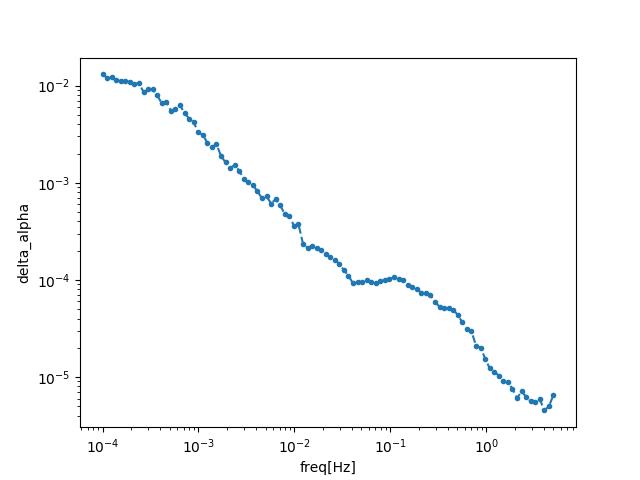

[Text(0, 0.5, 'delta_alpha'), Text(0.5, 0, 'freq[Hz]')]

In [13]:
_, ax = plt.subplots()
ax.loglog(alphas_freq, limit, '.--')
ax.set(xlabel='freq[Hz]', ylabel='delta_alpha')

In [14]:
limits_delta_alpha = 2*np.array(limit)/2 # 2 sigma of delta_alpha over 2 -> because the force is the delta alpha square
mass_ev = alphas_freq/2e14
rho_dm = 0.4*(1.98e-14)**3*(1e9)**4

In [15]:
ge_lim = limits_delta_alpha*mass_ev/np.sqrt(2*rho_dm)

### 60 sec. data

In [6]:
DManalyzer2 = dm_search.DMAnalyser()

In [7]:
fnames = [r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X8/Discharge_{}.h5'.format(i) for i in range(120)]
foldername = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X9/'
# DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]
DManalyzer.BDFs = load_dir(foldername, file_prefix='DMdata')

No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrode

In [8]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  9.609473334239448
x3 noise rms:  1.1860464249823146


<IPython.core.display.Javascript object>


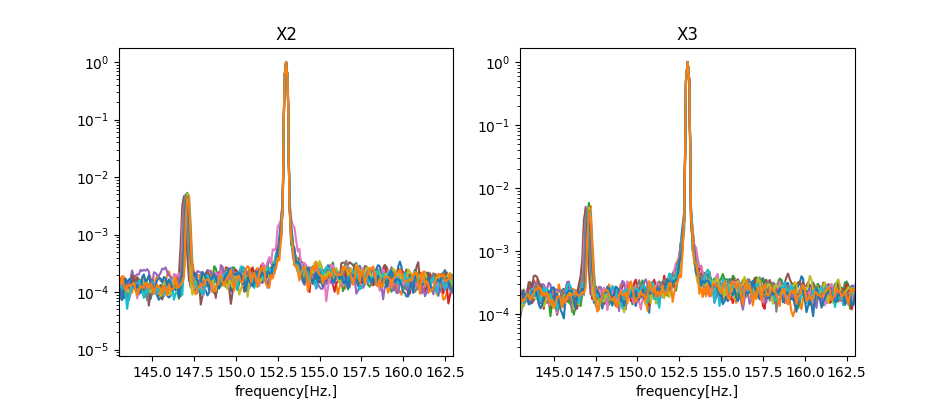

[(143, 163), Text(0.5, 0, 'frequency[Hz.]'), Text(0.5, 1.0, 'X3')]

In [134]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
for bb in DManalyzer.BDFs[::10]:
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft2 /= fft2[freq2==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].set(xlim=(143,163), xlabel='frequency[Hz.]', title='X2')
ax[1].set(xlim=(143,163), xlabel='frequency[Hz.]', title='X3')

In [9]:
DManalyzer.get_delta_alpha(bdf_i=10, alpha_frequency=1, frequency=153)

***************************************************
bdf_i:  10 , AM frequency:  1
sensitivity:  3.68e-05


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(3.678049027285088e-05, <iminuit._libiminuit.Minuit at 0x23d23a8>)

In [11]:
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=0.1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  0.1
sensitivity:  2.17e-04
***************************************************
bdf_i:  1 , AM frequency:  0.1
sensitivity:  1.68e-03
***************************************************
bdf_i:  2 , AM frequency:  0.1
sensitivity:  2.45e-04
***************************************************
bdf_i:  3 , AM frequency:  0.1
sensitivity:  5.38e-04
***************************************************
bdf_i:  4 , AM frequency:  0.1
sensitivity:  1.55e-04
***************************************************
bdf_i:  5 , AM frequency:  0.1
sensitivity:  8.46e-04
***************************************************
bdf_i:  6 , AM frequency:  0.1
sensitivity:  1.58e-03
***************************************************
bdf_i:  7 , AM frequency:  0.1
sensitivity:  1.55e-03
***************************************************
bdf_i:  8 , AM frequency:  0.1
sensitivity:  5.29e-05
**********************************************

***************************************************
bdf_i:  80 , AM frequency:  0.1
sensitivity:  9.50e-04
***************************************************
bdf_i:  81 , AM frequency:  0.1
sensitivity:  2.79e-04
***************************************************
bdf_i:  82 , AM frequency:  0.1
sensitivity:  3.79e-04
***************************************************
bdf_i:  83 , AM frequency:  0.1
sensitivity:  2.03e-04
***************************************************
bdf_i:  84 , AM frequency:  0.1
sensitivity:  1.12e-03
***************************************************
bdf_i:  85 , AM frequency:  0.1
sensitivity:  5.72e-05
***************************************************
bdf_i:  86 , AM frequency:  0.1
sensitivity:  6.13e-05
***************************************************
bdf_i:  87 , AM frequency:  0.1
sensitivity:  2.77e-04
***************************************************
bdf_i:  88 , AM frequency:  0.1
sensitivity:  1.54e-03
*************************************

In [137]:
resp_x2 = np.array([np.std(bb.response_at_freq2('x',drive_freq=153)*50000) for bb in DManalyzer.BDFs])
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


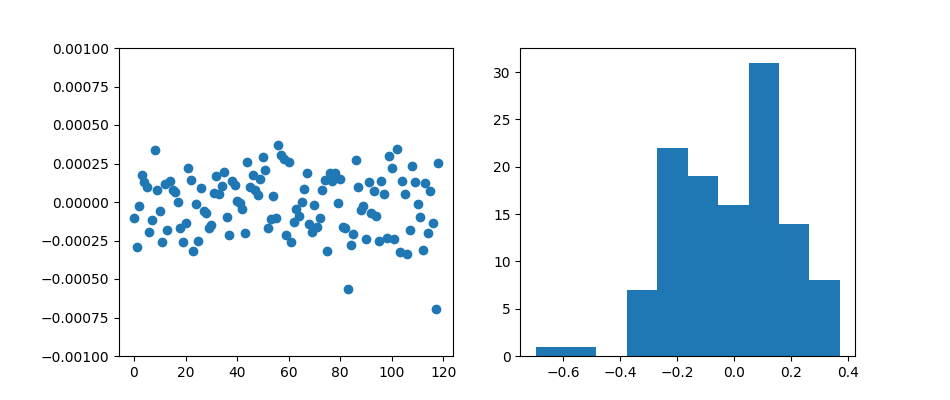

avergae:  -1.2654094734105737e-05 std:  0.0001944746650792155
standard error:  1.7827463318818164e-05
avergae:  3.943566632447974e-07 std:  0.00019636986416916117
standard error:  2.777089251493902e-05


In [138]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[0].set(ylim=(-0.001,0.001))
ax[1].hist(A/resp_x3*1000)
all_vals = A/resp_x3
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

all_vals = [A[i_]/resp_x3[i_] for i_ in i]
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

In [213]:
alphas_freq2 = np.logspace(2, 3, 50)
limit2 = [DManalyzer.get_sensitivity(alpha_frequency=freq) for freq in alphas_freq2]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  100.0
sensitivity:  4.41e-02
***************************************************
bdf_i:  1 , AM frequency:  100.0
sensitivity:  3.69e-02
***************************************************
bdf_i:  2 , AM frequency:  100.0
sensitivity:  3.23e-02
***************************************************
bdf_i:  3 , AM frequency:  100.0
sensitivity:  4.07e-02
***************************************************
bdf_i:  4 , AM frequency:  100.0
sensitivity:  6.63e-02
***************************************************
bdf_i:  5 , AM frequency:  100.0
sensitivity:  1.59e-06
***************************************************
bdf_i:  6 , AM frequency:  100.0
sensitivity:  1.13e-06
***************************************************
bdf_i:  7 , AM frequency:  100.0
sensitivity:  1.91e-06
***************************************************
bdf_i:  8 , AM frequency:  100.0
sensitivity:  2.53e-01
****************************

***************************************************
bdf_i:  76 , AM frequency:  100.0
sensitivity:  8.42e-07
***************************************************
bdf_i:  77 , AM frequency:  100.0
sensitivity:  2.82e-02
***************************************************
bdf_i:  78 , AM frequency:  100.0
sensitivity:  2.17e-02
***************************************************
bdf_i:  79 , AM frequency:  100.0
sensitivity:  2.17e-06
***************************************************
bdf_i:  80 , AM frequency:  100.0
sensitivity:  1.03e-06
***************************************************
bdf_i:  81 , AM frequency:  100.0
sensitivity:  9.36e-06
***************************************************
bdf_i:  82 , AM frequency:  100.0
sensitivity:  1.36e-02
***************************************************
bdf_i:  83 , AM frequency:  100.0
sensitivity:  1.53e-06
***************************************************
bdf_i:  84 , AM frequency:  100.0
sensitivity:  1.45e-02
*******************

***************************************************
bdf_i:  29 , AM frequency:  104.81131341546852
sensitivity:  7.96e-05
***************************************************
bdf_i:  30 , AM frequency:  104.81131341546852
sensitivity:  8.99e-06
***************************************************
bdf_i:  31 , AM frequency:  104.81131341546852
sensitivity:  1.33e-05
***************************************************
bdf_i:  32 , AM frequency:  104.81131341546852
sensitivity:  2.86e-05
***************************************************
bdf_i:  33 , AM frequency:  104.81131341546852
sensitivity:  4.69e-05
***************************************************
bdf_i:  34 , AM frequency:  104.81131341546852
sensitivity:  1.01e-05
***************************************************
bdf_i:  35 , AM frequency:  104.81131341546852
sensitivity:  5.07e-05
***************************************************
bdf_i:  36 , AM frequency:  104.81131341546852
sensitivity:  2.82e-05
************************

***************************************************
bdf_i:  99 , AM frequency:  104.81131341546852
sensitivity:  1.74e-06
***************************************************
bdf_i:  100 , AM frequency:  104.81131341546852
sensitivity:  8.28e-05
***************************************************
bdf_i:  101 , AM frequency:  104.81131341546852
sensitivity:  3.65e-05
***************************************************
bdf_i:  102 , AM frequency:  104.81131341546852
sensitivity:  5.93e-05
***************************************************
bdf_i:  103 , AM frequency:  104.81131341546852
sensitivity:  1.16e-04
***************************************************
bdf_i:  104 , AM frequency:  104.81131341546852
sensitivity:  1.32e-05
***************************************************
bdf_i:  105 , AM frequency:  104.81131341546852
sensitivity:  5.15e-05
***************************************************
bdf_i:  106 , AM frequency:  104.81131341546852
sensitivity:  8.21e-07
*****************

***************************************************
bdf_i:  46 , AM frequency:  109.85411419875584
sensitivity:  1.26e-06
***************************************************
bdf_i:  47 , AM frequency:  109.85411419875584
sensitivity:  1.46e-06
***************************************************
bdf_i:  48 , AM frequency:  109.85411419875584
sensitivity:  5.71e-06
***************************************************
bdf_i:  49 , AM frequency:  109.85411419875584
sensitivity:  1.05e-05
***************************************************
bdf_i:  50 , AM frequency:  109.85411419875584
sensitivity:  1.35e-05
***************************************************
bdf_i:  51 , AM frequency:  109.85411419875584
sensitivity:  4.78e-06
***************************************************
bdf_i:  52 , AM frequency:  109.85411419875584
sensitivity:  3.57e-06
***************************************************
bdf_i:  53 , AM frequency:  109.85411419875584
sensitivity:  2.34e-06
************************

***************************************************
bdf_i:  115 , AM frequency:  109.85411419875584
sensitivity:  6.73e-07
***************************************************
bdf_i:  116 , AM frequency:  109.85411419875584
sensitivity:  1.00e-05
***************************************************
bdf_i:  117 , AM frequency:  109.85411419875584
sensitivity:  1.80e-05
***************************************************
bdf_i:  118 , AM frequency:  109.85411419875584
sensitivity:  1.04e-05
***************************************************
average:  4.812783383925946e-06 std:  3.3775024867942706e-06
standard error:  3.0961514533533543e-07
***************************************************
bdf_i:  0 , AM frequency:  115.1395399326447
sensitivity:  3.37e-06
***************************************************
bdf_i:  1 , AM frequency:  115.1395399326447
sensitivity:  2.46e-06
***************************************************
bdf_i:  2 , AM frequency:  115.1395399326447
sensitivity:  7.40

***************************************************
bdf_i:  65 , AM frequency:  115.1395399326447
sensitivity:  4.81e-07
***************************************************
bdf_i:  66 , AM frequency:  115.1395399326447
sensitivity:  1.24e-06
***************************************************
bdf_i:  67 , AM frequency:  115.1395399326447
sensitivity:  4.59e-06
***************************************************
bdf_i:  68 , AM frequency:  115.1395399326447
sensitivity:  2.95e-07
***************************************************
bdf_i:  69 , AM frequency:  115.1395399326447
sensitivity:  9.88e-07
***************************************************
bdf_i:  70 , AM frequency:  115.1395399326447
sensitivity:  1.36e-06
***************************************************
bdf_i:  71 , AM frequency:  115.1395399326447
sensitivity:  1.13e-06
***************************************************
bdf_i:  72 , AM frequency:  115.1395399326447
sensitivity:  2.18e-07
********************************

***************************************************
bdf_i:  14 , AM frequency:  120.67926406393289
sensitivity:  1.68e-06
***************************************************
bdf_i:  15 , AM frequency:  120.67926406393289
sensitivity:  3.11e-06
***************************************************
bdf_i:  16 , AM frequency:  120.67926406393289
sensitivity:  1.76e-06
***************************************************
bdf_i:  17 , AM frequency:  120.67926406393289
sensitivity:  1.95e-07
***************************************************
bdf_i:  18 , AM frequency:  120.67926406393289
sensitivity:  1.10e-06
***************************************************
bdf_i:  19 , AM frequency:  120.67926406393289
sensitivity:  1.69e-06
***************************************************
bdf_i:  20 , AM frequency:  120.67926406393289
sensitivity:  1.15e-06
***************************************************
bdf_i:  21 , AM frequency:  120.67926406393289
sensitivity:  5.44e-07
************************

***************************************************
bdf_i:  84 , AM frequency:  120.67926406393289
sensitivity:  1.41e-06
***************************************************
bdf_i:  85 , AM frequency:  120.67926406393289
sensitivity:  4.76e-07
***************************************************
bdf_i:  86 , AM frequency:  120.67926406393289
sensitivity:  1.80e-06
***************************************************
bdf_i:  87 , AM frequency:  120.67926406393289
sensitivity:  1.15e-07
***************************************************
bdf_i:  88 , AM frequency:  120.67926406393289
sensitivity:  1.21e-06
***************************************************
bdf_i:  89 , AM frequency:  120.67926406393289
sensitivity:  8.79e-07
***************************************************
bdf_i:  90 , AM frequency:  120.67926406393289
sensitivity:  3.87e-06
***************************************************
bdf_i:  91 , AM frequency:  120.67926406393289
sensitivity:  1.00e-06
************************

***************************************************
bdf_i:  33 , AM frequency:  126.48552168552958
sensitivity:  9.11e-07
***************************************************
bdf_i:  34 , AM frequency:  126.48552168552958
sensitivity:  8.32e-08
***************************************************
bdf_i:  35 , AM frequency:  126.48552168552958
sensitivity:  1.06e-06
***************************************************
bdf_i:  36 , AM frequency:  126.48552168552958
sensitivity:  3.75e-07
***************************************************
bdf_i:  37 , AM frequency:  126.48552168552958
sensitivity:  1.79e-06
***************************************************
bdf_i:  38 , AM frequency:  126.48552168552958
sensitivity:  9.59e-07
***************************************************
bdf_i:  39 , AM frequency:  126.48552168552958
sensitivity:  1.64e-06
***************************************************
bdf_i:  40 , AM frequency:  126.48552168552958
sensitivity:  1.00e-06
************************

***************************************************
bdf_i:  101 , AM frequency:  126.48552168552958
sensitivity:  5.54e-06
***************************************************
bdf_i:  102 , AM frequency:  126.48552168552958
sensitivity:  4.14e-06
***************************************************
bdf_i:  103 , AM frequency:  126.48552168552958
sensitivity:  7.17e-06
***************************************************
bdf_i:  104 , AM frequency:  126.48552168552958
sensitivity:  2.62e-06
***************************************************
bdf_i:  105 , AM frequency:  126.48552168552958
sensitivity:  1.01e-06
***************************************************
bdf_i:  106 , AM frequency:  126.48552168552958
sensitivity:  5.11e-06
***************************************************
bdf_i:  107 , AM frequency:  126.48552168552958
sensitivity:  2.94e-06
***************************************************
bdf_i:  108 , AM frequency:  126.48552168552958
sensitivity:  1.13e-06
****************

***************************************************
bdf_i:  50 , AM frequency:  132.57113655901094
sensitivity:  2.01e-06
***************************************************
bdf_i:  51 , AM frequency:  132.57113655901094
sensitivity:  7.83e-07
***************************************************
bdf_i:  52 , AM frequency:  132.57113655901094
sensitivity:  7.63e-07
***************************************************
bdf_i:  53 , AM frequency:  132.57113655901094
sensitivity:  1.20e-06
***************************************************
bdf_i:  54 , AM frequency:  132.57113655901094
sensitivity:  1.92e-06
***************************************************
bdf_i:  55 , AM frequency:  132.57113655901094
sensitivity:  5.80e-08
***************************************************
bdf_i:  56 , AM frequency:  132.57113655901094
sensitivity:  1.77e-06
***************************************************
bdf_i:  57 , AM frequency:  132.57113655901094
sensitivity:  1.65e-06
************************

***************************************************
bdf_i:  118 , AM frequency:  132.57113655901094
sensitivity:  8.73e-06
***************************************************
average:  1.607104799131646e-06 std:  1.7767576405054533e-06
standard error:  1.62875105863474e-07
***************************************************
bdf_i:  0 , AM frequency:  138.94954943731375
sensitivity:  1.48e-06
***************************************************
bdf_i:  1 , AM frequency:  138.94954943731375
sensitivity:  9.02e-07
***************************************************
bdf_i:  2 , AM frequency:  138.94954943731375
sensitivity:  1.67e-07
***************************************************
bdf_i:  3 , AM frequency:  138.94954943731375
sensitivity:  4.67e-07
***************************************************
bdf_i:  4 , AM frequency:  138.94954943731375
sensitivity:  7.40e-07
***************************************************
bdf_i:  5 , AM frequency:  138.94954943731375
sensitivity:  9.63e-07


***************************************************
bdf_i:  65 , AM frequency:  138.94954943731375
sensitivity:  7.51e-09
***************************************************
bdf_i:  66 , AM frequency:  138.94954943731375
sensitivity:  2.05e-07
***************************************************
bdf_i:  67 , AM frequency:  138.94954943731375
sensitivity:  1.99e-06
***************************************************
bdf_i:  68 , AM frequency:  138.94954943731375
sensitivity:  3.50e-07
***************************************************
bdf_i:  69 , AM frequency:  138.94954943731375
sensitivity:  2.70e-07
***************************************************
bdf_i:  70 , AM frequency:  138.94954943731375
sensitivity:  3.30e-07
***************************************************
bdf_i:  71 , AM frequency:  138.94954943731375
sensitivity:  1.56e-07
***************************************************
bdf_i:  72 , AM frequency:  138.94954943731375
sensitivity:  2.45e-07
************************

***************************************************
bdf_i:  14 , AM frequency:  145.63484775012444
sensitivity:  1.27e-07
***************************************************
bdf_i:  15 , AM frequency:  145.63484775012444
sensitivity:  1.65e-06
***************************************************
bdf_i:  16 , AM frequency:  145.63484775012444
sensitivity:  5.93e-07
***************************************************
bdf_i:  17 , AM frequency:  145.63484775012444
sensitivity:  1.51e-06
***************************************************
bdf_i:  18 , AM frequency:  145.63484775012444
sensitivity:  1.53e-06
***************************************************
bdf_i:  19 , AM frequency:  145.63484775012444
sensitivity:  1.38e-06
***************************************************
bdf_i:  20 , AM frequency:  145.63484775012444
sensitivity:  1.56e-08
***************************************************
bdf_i:  21 , AM frequency:  145.63484775012444
sensitivity:  2.97e-07
************************

***************************************************
bdf_i:  83 , AM frequency:  145.63484775012444
sensitivity:  1.78e-06
***************************************************
bdf_i:  84 , AM frequency:  145.63484775012444
sensitivity:  6.34e-07
***************************************************
bdf_i:  85 , AM frequency:  145.63484775012444
sensitivity:  3.15e-07
***************************************************
bdf_i:  86 , AM frequency:  145.63484775012444
sensitivity:  1.31e-06
***************************************************
bdf_i:  87 , AM frequency:  145.63484775012444
sensitivity:  2.67e-07
***************************************************
bdf_i:  88 , AM frequency:  145.63484775012444
sensitivity:  1.67e-07
***************************************************
bdf_i:  89 , AM frequency:  145.63484775012444
sensitivity:  1.25e-07
***************************************************
bdf_i:  90 , AM frequency:  145.63484775012444
sensitivity:  3.86e-06
************************

***************************************************
bdf_i:  32 , AM frequency:  152.64179671752333
sensitivity:  1.92e-06
***************************************************
bdf_i:  33 , AM frequency:  152.64179671752333
sensitivity:  5.27e-07
***************************************************
bdf_i:  34 , AM frequency:  152.64179671752333
sensitivity:  1.24e-06
***************************************************
bdf_i:  35 , AM frequency:  152.64179671752333
sensitivity:  1.87e-06
***************************************************
bdf_i:  36 , AM frequency:  152.64179671752333
sensitivity:  8.32e-07
***************************************************
bdf_i:  37 , AM frequency:  152.64179671752333
sensitivity:  3.33e-06
***************************************************
bdf_i:  38 , AM frequency:  152.64179671752333
sensitivity:  1.74e-06
***************************************************
bdf_i:  39 , AM frequency:  152.64179671752333
sensitivity:  1.50e-06
************************

***************************************************
bdf_i:  101 , AM frequency:  152.64179671752333
sensitivity:  1.37e-06
***************************************************
bdf_i:  102 , AM frequency:  152.64179671752333
sensitivity:  5.05e-07
***************************************************
bdf_i:  103 , AM frequency:  152.64179671752333
sensitivity:  2.48e-06
***************************************************
bdf_i:  104 , AM frequency:  152.64179671752333
sensitivity:  1.92e-07
***************************************************
bdf_i:  105 , AM frequency:  152.64179671752333
sensitivity:  8.07e-07
***************************************************
bdf_i:  106 , AM frequency:  152.64179671752333
sensitivity:  2.36e-06
***************************************************
bdf_i:  107 , AM frequency:  152.64179671752333
sensitivity:  2.99e-06
***************************************************
bdf_i:  108 , AM frequency:  152.64179671752333
sensitivity:  5.66e-07
****************

***************************************************
bdf_i:  50 , AM frequency:  159.98587196060572
sensitivity:  5.05e-07
***************************************************
bdf_i:  51 , AM frequency:  159.98587196060572
sensitivity:  5.49e-07
***************************************************
bdf_i:  52 , AM frequency:  159.98587196060572
sensitivity:  2.33e-07
***************************************************
bdf_i:  53 , AM frequency:  159.98587196060572
sensitivity:  8.37e-07
***************************************************
bdf_i:  54 , AM frequency:  159.98587196060572
sensitivity:  4.55e-07
***************************************************
bdf_i:  55 , AM frequency:  159.98587196060572
sensitivity:  3.63e-07
***************************************************
bdf_i:  56 , AM frequency:  159.98587196060572
sensitivity:  7.44e-07
***************************************************
bdf_i:  57 , AM frequency:  159.98587196060572
sensitivity:  7.33e-07
************************

***************************************************
bdf_i:  0 , AM frequency:  167.68329368110082
sensitivity:  8.00e-07
***************************************************
bdf_i:  1 , AM frequency:  167.68329368110082
sensitivity:  1.01e-07
***************************************************
bdf_i:  2 , AM frequency:  167.68329368110082
sensitivity:  4.97e-08
***************************************************
bdf_i:  3 , AM frequency:  167.68329368110082
sensitivity:  2.55e-07
***************************************************
bdf_i:  4 , AM frequency:  167.68329368110082
sensitivity:  1.99e-07
***************************************************
bdf_i:  5 , AM frequency:  167.68329368110082
sensitivity:  7.44e-07
***************************************************
bdf_i:  6 , AM frequency:  167.68329368110082
sensitivity:  9.13e-07
***************************************************
bdf_i:  7 , AM frequency:  167.68329368110082
sensitivity:  1.61e-06
********************************

***************************************************
bdf_i:  68 , AM frequency:  167.68329368110082
sensitivity:  3.04e-07
***************************************************
bdf_i:  69 , AM frequency:  167.68329368110082
sensitivity:  6.48e-07
***************************************************
bdf_i:  70 , AM frequency:  167.68329368110082
sensitivity:  5.81e-07
***************************************************
bdf_i:  71 , AM frequency:  167.68329368110082
sensitivity:  5.25e-07
***************************************************
bdf_i:  72 , AM frequency:  167.68329368110082
sensitivity:  1.22e-07
***************************************************
bdf_i:  73 , AM frequency:  167.68329368110082
sensitivity:  1.03e-06
***************************************************
bdf_i:  74 , AM frequency:  167.68329368110082
sensitivity:  1.14e-06
***************************************************
bdf_i:  75 , AM frequency:  167.68329368110082
sensitivity:  7.47e-07
************************

***************************************************
bdf_i:  17 , AM frequency:  175.7510624854791
sensitivity:  4.83e-07
***************************************************
bdf_i:  18 , AM frequency:  175.7510624854791
sensitivity:  6.46e-07
***************************************************
bdf_i:  19 , AM frequency:  175.7510624854791
sensitivity:  1.48e-06
***************************************************
bdf_i:  20 , AM frequency:  175.7510624854791
sensitivity:  8.12e-07
***************************************************
bdf_i:  21 , AM frequency:  175.7510624854791
sensitivity:  3.06e-07
***************************************************
bdf_i:  22 , AM frequency:  175.7510624854791
sensitivity:  2.72e-06
***************************************************
bdf_i:  23 , AM frequency:  175.7510624854791
sensitivity:  1.80e-06
***************************************************
bdf_i:  24 , AM frequency:  175.7510624854791
sensitivity:  2.03e-06
********************************

***************************************************
bdf_i:  87 , AM frequency:  175.7510624854791
sensitivity:  9.63e-07
***************************************************
bdf_i:  88 , AM frequency:  175.7510624854791
sensitivity:  5.73e-07
***************************************************
bdf_i:  89 , AM frequency:  175.7510624854791
sensitivity:  8.43e-07
***************************************************
bdf_i:  90 , AM frequency:  175.7510624854791
sensitivity:  2.89e-06
***************************************************
bdf_i:  91 , AM frequency:  175.7510624854791
sensitivity:  7.66e-07
***************************************************
bdf_i:  92 , AM frequency:  175.7510624854791
sensitivity:  3.78e-08
***************************************************
bdf_i:  93 , AM frequency:  175.7510624854791
sensitivity:  1.57e-06
***************************************************
bdf_i:  94 , AM frequency:  175.7510624854791
sensitivity:  3.49e-06
********************************

***************************************************
bdf_i:  37 , AM frequency:  184.20699693267164
sensitivity:  2.64e-06
***************************************************
bdf_i:  38 , AM frequency:  184.20699693267164
sensitivity:  1.26e-06
***************************************************
bdf_i:  39 , AM frequency:  184.20699693267164
sensitivity:  3.11e-06
***************************************************
bdf_i:  40 , AM frequency:  184.20699693267164
sensitivity:  2.55e-06
***************************************************
bdf_i:  41 , AM frequency:  184.20699693267164
sensitivity:  1.49e-06
***************************************************
bdf_i:  42 , AM frequency:  184.20699693267164
sensitivity:  2.05e-06
***************************************************
bdf_i:  43 , AM frequency:  184.20699693267164
sensitivity:  1.31e-06
***************************************************
bdf_i:  44 , AM frequency:  184.20699693267164
sensitivity:  9.53e-06
************************

***************************************************
bdf_i:  105 , AM frequency:  184.20699693267164
sensitivity:  2.23e-06
***************************************************
bdf_i:  106 , AM frequency:  184.20699693267164
sensitivity:  8.10e-06
***************************************************
bdf_i:  107 , AM frequency:  184.20699693267164
sensitivity:  4.70e-06
***************************************************
bdf_i:  108 , AM frequency:  184.20699693267164
sensitivity:  2.34e-06
***************************************************
bdf_i:  109 , AM frequency:  184.20699693267164
sensitivity:  1.56e-06
***************************************************
bdf_i:  110 , AM frequency:  184.20699693267164
sensitivity:  8.16e-06
***************************************************
bdf_i:  111 , AM frequency:  184.20699693267164
sensitivity:  2.66e-06
***************************************************
bdf_i:  112 , AM frequency:  184.20699693267164
sensitivity:  7.77e-06
****************

***************************************************
bdf_i:  52 , AM frequency:  193.06977288832496
sensitivity:  9.78e-07
***************************************************
bdf_i:  53 , AM frequency:  193.06977288832496
sensitivity:  2.98e-05
***************************************************
bdf_i:  54 , AM frequency:  193.06977288832496
sensitivity:  1.51e-07
***************************************************
bdf_i:  55 , AM frequency:  193.06977288832496
sensitivity:  2.57e-05
***************************************************
bdf_i:  56 , AM frequency:  193.06977288832496
sensitivity:  1.13e-05
***************************************************
bdf_i:  57 , AM frequency:  193.06977288832496
sensitivity:  5.16e-05
***************************************************
bdf_i:  58 , AM frequency:  193.06977288832496
sensitivity:  1.23e-05
***************************************************
bdf_i:  59 , AM frequency:  193.06977288832496
sensitivity:  3.03e-05
************************

***************************************************
bdf_i:  0 , AM frequency:  202.35896477251575
sensitivity:  5.10e-05
***************************************************
bdf_i:  1 , AM frequency:  202.35896477251575
sensitivity:  2.55e-05
***************************************************
bdf_i:  2 , AM frequency:  202.35896477251575
sensitivity:  3.27e-05
***************************************************
bdf_i:  3 , AM frequency:  202.35896477251575
sensitivity:  4.31e-05
***************************************************
bdf_i:  4 , AM frequency:  202.35896477251575
sensitivity:  2.07e-05
***************************************************
bdf_i:  5 , AM frequency:  202.35896477251575
sensitivity:  4.42e-05
***************************************************
bdf_i:  6 , AM frequency:  202.35896477251575
sensitivity:  3.26e-05
***************************************************
bdf_i:  7 , AM frequency:  202.35896477251575
sensitivity:  2.11e-05
********************************

***************************************************
bdf_i:  69 , AM frequency:  202.35896477251575
sensitivity:  1.01e-04
***************************************************
bdf_i:  70 , AM frequency:  202.35896477251575
sensitivity:  7.48e-07
***************************************************
bdf_i:  71 , AM frequency:  202.35896477251575
sensitivity:  6.58e-05
***************************************************
bdf_i:  72 , AM frequency:  202.35896477251575
sensitivity:  8.78e-05
***************************************************
bdf_i:  73 , AM frequency:  202.35896477251575
sensitivity:  1.46e-05
***************************************************
bdf_i:  74 , AM frequency:  202.35896477251575
sensitivity:  7.76e-05
***************************************************
bdf_i:  75 , AM frequency:  202.35896477251575
sensitivity:  3.40e-05
***************************************************
bdf_i:  76 , AM frequency:  202.35896477251575
sensitivity:  5.42e-05
************************

***************************************************
bdf_i:  17 , AM frequency:  212.09508879201903
sensitivity:  3.36e-06
***************************************************
bdf_i:  18 , AM frequency:  212.09508879201903
sensitivity:  1.40e-06
***************************************************
bdf_i:  19 , AM frequency:  212.09508879201903
sensitivity:  4.94e-06
***************************************************
bdf_i:  20 , AM frequency:  212.09508879201903
sensitivity:  2.88e-06
***************************************************
bdf_i:  21 , AM frequency:  212.09508879201903
sensitivity:  4.54e-07
***************************************************
bdf_i:  22 , AM frequency:  212.09508879201903
sensitivity:  6.27e-06
***************************************************
bdf_i:  23 , AM frequency:  212.09508879201903
sensitivity:  3.14e-06
***************************************************
bdf_i:  24 , AM frequency:  212.09508879201903
sensitivity:  7.61e-06
************************

***************************************************
bdf_i:  86 , AM frequency:  212.09508879201903
sensitivity:  3.99e-06
***************************************************
bdf_i:  87 , AM frequency:  212.09508879201903
sensitivity:  9.90e-07
***************************************************
bdf_i:  88 , AM frequency:  212.09508879201903
sensitivity:  3.98e-06
***************************************************
bdf_i:  89 , AM frequency:  212.09508879201903
sensitivity:  3.28e-06
***************************************************
bdf_i:  90 , AM frequency:  212.09508879201903
sensitivity:  5.91e-06
***************************************************
bdf_i:  91 , AM frequency:  212.09508879201903
sensitivity:  2.13e-06
***************************************************
bdf_i:  92 , AM frequency:  212.09508879201903
sensitivity:  3.98e-06
***************************************************
bdf_i:  93 , AM frequency:  212.09508879201903
sensitivity:  2.34e-06
************************

***************************************************
bdf_i:  34 , AM frequency:  222.29964825261956
sensitivity:  8.07e-07
***************************************************
bdf_i:  35 , AM frequency:  222.29964825261956
sensitivity:  4.88e-08
***************************************************
bdf_i:  36 , AM frequency:  222.29964825261956
sensitivity:  6.33e-07
***************************************************
bdf_i:  37 , AM frequency:  222.29964825261956
sensitivity:  1.17e-06
***************************************************
bdf_i:  38 , AM frequency:  222.29964825261956
sensitivity:  4.02e-07
***************************************************
bdf_i:  39 , AM frequency:  222.29964825261956
sensitivity:  5.43e-07
***************************************************
bdf_i:  40 , AM frequency:  222.29964825261956
sensitivity:  1.37e-06
***************************************************
bdf_i:  41 , AM frequency:  222.29964825261956
sensitivity:  1.75e-06
************************

***************************************************
bdf_i:  102 , AM frequency:  222.29964825261956
sensitivity:  6.18e-06
***************************************************
bdf_i:  103 , AM frequency:  222.29964825261956
sensitivity:  4.06e-06
***************************************************
bdf_i:  104 , AM frequency:  222.29964825261956
sensitivity:  1.42e-06
***************************************************
bdf_i:  105 , AM frequency:  222.29964825261956
sensitivity:  4.47e-07
***************************************************
bdf_i:  106 , AM frequency:  222.29964825261956
sensitivity:  1.89e-06
***************************************************
bdf_i:  107 , AM frequency:  222.29964825261956
sensitivity:  1.22e-06
***************************************************
bdf_i:  108 , AM frequency:  222.29964825261956
sensitivity:  1.23e-06
***************************************************
bdf_i:  109 , AM frequency:  222.29964825261956
sensitivity:  3.90e-07
****************

***************************************************
bdf_i:  51 , AM frequency:  232.99518105153717
sensitivity:  1.13e-06
***************************************************
bdf_i:  52 , AM frequency:  232.99518105153717
sensitivity:  6.90e-07
***************************************************
bdf_i:  53 , AM frequency:  232.99518105153717
sensitivity:  5.61e-07
***************************************************
bdf_i:  54 , AM frequency:  232.99518105153717
sensitivity:  1.01e-06
***************************************************
bdf_i:  55 , AM frequency:  232.99518105153717
sensitivity:  6.25e-07
***************************************************
bdf_i:  56 , AM frequency:  232.99518105153717
sensitivity:  8.56e-07
***************************************************
bdf_i:  57 , AM frequency:  232.99518105153717
sensitivity:  1.53e-06
***************************************************
bdf_i:  58 , AM frequency:  232.99518105153717
sensitivity:  2.33e-06
************************

***************************************************
bdf_i:  1 , AM frequency:  244.205309454865
sensitivity:  8.21e-07
***************************************************
bdf_i:  2 , AM frequency:  244.205309454865
sensitivity:  5.22e-07
***************************************************
bdf_i:  3 , AM frequency:  244.205309454865
sensitivity:  6.39e-07
***************************************************
bdf_i:  4 , AM frequency:  244.205309454865
sensitivity:  8.87e-07
***************************************************
bdf_i:  5 , AM frequency:  244.205309454865
sensitivity:  2.99e-07
***************************************************
bdf_i:  6 , AM frequency:  244.205309454865
sensitivity:  4.16e-07
***************************************************
bdf_i:  7 , AM frequency:  244.205309454865
sensitivity:  4.53e-07
***************************************************
bdf_i:  8 , AM frequency:  244.205309454865
sensitivity:  8.12e-09
************************************************

***************************************************
bdf_i:  70 , AM frequency:  244.205309454865
sensitivity:  7.01e-07
***************************************************
bdf_i:  71 , AM frequency:  244.205309454865
sensitivity:  4.95e-07
***************************************************
bdf_i:  72 , AM frequency:  244.205309454865
sensitivity:  3.47e-07
***************************************************
bdf_i:  73 , AM frequency:  244.205309454865
sensitivity:  9.34e-09
***************************************************
bdf_i:  74 , AM frequency:  244.205309454865
sensitivity:  1.05e-08
***************************************************
bdf_i:  75 , AM frequency:  244.205309454865
sensitivity:  2.48e-07
***************************************************
bdf_i:  76 , AM frequency:  244.205309454865
sensitivity:  4.93e-07
***************************************************
bdf_i:  77 , AM frequency:  244.205309454865
sensitivity:  2.92e-07
****************************************

***************************************************
bdf_i:  20 , AM frequency:  255.95479226995357
sensitivity:  3.61e-07
***************************************************
bdf_i:  21 , AM frequency:  255.95479226995357
sensitivity:  2.81e-07
***************************************************
bdf_i:  22 , AM frequency:  255.95479226995357
sensitivity:  1.55e-06
***************************************************
bdf_i:  23 , AM frequency:  255.95479226995357
sensitivity:  1.95e-08
***************************************************
bdf_i:  24 , AM frequency:  255.95479226995357
sensitivity:  1.57e-06
***************************************************
bdf_i:  25 , AM frequency:  255.95479226995357
sensitivity:  1.10e-06
***************************************************
bdf_i:  26 , AM frequency:  255.95479226995357
sensitivity:  5.13e-07
***************************************************
bdf_i:  27 , AM frequency:  255.95479226995357
sensitivity:  1.52e-06
************************

***************************************************
bdf_i:  89 , AM frequency:  255.95479226995357
sensitivity:  1.02e-06
***************************************************
bdf_i:  90 , AM frequency:  255.95479226995357
sensitivity:  2.45e-06
***************************************************
bdf_i:  91 , AM frequency:  255.95479226995357
sensitivity:  9.97e-07
***************************************************
bdf_i:  92 , AM frequency:  255.95479226995357
sensitivity:  1.30e-06
***************************************************
bdf_i:  93 , AM frequency:  255.95479226995357
sensitivity:  8.71e-07
***************************************************
bdf_i:  94 , AM frequency:  255.95479226995357
sensitivity:  9.93e-07
***************************************************
bdf_i:  95 , AM frequency:  255.95479226995357
sensitivity:  1.70e-06
***************************************************
bdf_i:  96 , AM frequency:  255.95479226995357
sensitivity:  4.48e-07
************************

***************************************************
bdf_i:  38 , AM frequency:  268.26957952797244
sensitivity:  9.60e-07
***************************************************
bdf_i:  39 , AM frequency:  268.26957952797244
sensitivity:  1.23e-06
***************************************************
bdf_i:  40 , AM frequency:  268.26957952797244
sensitivity:  7.25e-07
***************************************************
bdf_i:  41 , AM frequency:  268.26957952797244
sensitivity:  4.74e-08
***************************************************
bdf_i:  42 , AM frequency:  268.26957952797244
sensitivity:  3.48e-07
***************************************************
bdf_i:  43 , AM frequency:  268.26957952797244
sensitivity:  5.41e-07
***************************************************
bdf_i:  44 , AM frequency:  268.26957952797244
sensitivity:  1.95e-06
***************************************************
bdf_i:  45 , AM frequency:  268.26957952797244
sensitivity:  1.15e-06
************************

***************************************************
bdf_i:  106 , AM frequency:  268.26957952797244
sensitivity:  1.46e-06
***************************************************
bdf_i:  107 , AM frequency:  268.26957952797244
sensitivity:  8.78e-07
***************************************************
bdf_i:  108 , AM frequency:  268.26957952797244
sensitivity:  1.21e-06
***************************************************
bdf_i:  109 , AM frequency:  268.26957952797244
sensitivity:  1.71e-07
***************************************************
bdf_i:  110 , AM frequency:  268.26957952797244
sensitivity:  2.21e-06
***************************************************
bdf_i:  111 , AM frequency:  268.26957952797244
sensitivity:  6.64e-07
***************************************************
bdf_i:  112 , AM frequency:  268.26957952797244
sensitivity:  2.19e-06
***************************************************
bdf_i:  113 , AM frequency:  268.26957952797244
sensitivity:  6.05e-07
****************

***************************************************
bdf_i:  56 , AM frequency:  281.1768697974231
sensitivity:  2.19e-06
***************************************************
bdf_i:  57 , AM frequency:  281.1768697974231
sensitivity:  4.85e-06
***************************************************
bdf_i:  58 , AM frequency:  281.1768697974231
sensitivity:  9.81e-07
***************************************************
bdf_i:  59 , AM frequency:  281.1768697974231
sensitivity:  8.16e-08
***************************************************
bdf_i:  60 , AM frequency:  281.1768697974231
sensitivity:  3.26e-06
***************************************************
bdf_i:  61 , AM frequency:  281.1768697974231
sensitivity:  1.61e-06
***************************************************
bdf_i:  62 , AM frequency:  281.1768697974231
sensitivity:  2.02e-06
***************************************************
bdf_i:  63 , AM frequency:  281.1768697974231
sensitivity:  7.58e-07
********************************

***************************************************
bdf_i:  5 , AM frequency:  294.705170255181
sensitivity:  5.72e-05
***************************************************
bdf_i:  6 , AM frequency:  294.705170255181
sensitivity:  3.61e-05
***************************************************
bdf_i:  7 , AM frequency:  294.705170255181
sensitivity:  4.68e-05
***************************************************
bdf_i:  8 , AM frequency:  294.705170255181
sensitivity:  2.39e-05
***************************************************
bdf_i:  9 , AM frequency:  294.705170255181
sensitivity:  4.00e-05
***************************************************
bdf_i:  10 , AM frequency:  294.705170255181
sensitivity:  5.93e-05
***************************************************
bdf_i:  11 , AM frequency:  294.705170255181
sensitivity:  1.45e-05
***************************************************
bdf_i:  12 , AM frequency:  294.705170255181
sensitivity:  4.67e-05
*********************************************

***************************************************
bdf_i:  75 , AM frequency:  294.705170255181
sensitivity:  1.18e-04
***************************************************
bdf_i:  76 , AM frequency:  294.705170255181
sensitivity:  3.75e-05
***************************************************
bdf_i:  77 , AM frequency:  294.705170255181
sensitivity:  8.05e-05
***************************************************
bdf_i:  78 , AM frequency:  294.705170255181
sensitivity:  1.16e-04
***************************************************
bdf_i:  79 , AM frequency:  294.705170255181
sensitivity:  4.19e-05
***************************************************
bdf_i:  80 , AM frequency:  294.705170255181
sensitivity:  1.29e-05
***************************************************
bdf_i:  81 , AM frequency:  294.705170255181
sensitivity:  5.97e-05
***************************************************
bdf_i:  82 , AM frequency:  294.705170255181
sensitivity:  4.77e-05
****************************************

sensitivity:  2.79e-06
***************************************************
bdf_i:  23 , AM frequency:  308.88435964774817
sensitivity:  5.43e-06
***************************************************
bdf_i:  24 , AM frequency:  308.88435964774817
sensitivity:  2.07e-06
***************************************************
bdf_i:  25 , AM frequency:  308.88435964774817
sensitivity:  1.28e-05
***************************************************
bdf_i:  26 , AM frequency:  308.88435964774817
sensitivity:  1.06e-05
***************************************************
bdf_i:  27 , AM frequency:  308.88435964774817
sensitivity:  3.74e-06
***************************************************
bdf_i:  28 , AM frequency:  308.88435964774817
sensitivity:  7.05e-06
***************************************************
bdf_i:  29 , AM frequency:  308.88435964774817
sensitivity:  7.57e-06
***************************************************
bdf_i:  30 , AM frequency:  308.88435964774817
sensitivity:  3.17e-06
*

***************************************************
bdf_i:  91 , AM frequency:  308.88435964774817
sensitivity:  3.51e-06
***************************************************
bdf_i:  92 , AM frequency:  308.88435964774817
sensitivity:  5.88e-06
***************************************************
bdf_i:  93 , AM frequency:  308.88435964774817
sensitivity:  2.29e-06
***************************************************
bdf_i:  94 , AM frequency:  308.88435964774817
sensitivity:  2.72e-07
***************************************************
bdf_i:  95 , AM frequency:  308.88435964774817
sensitivity:  4.93e-07
***************************************************
bdf_i:  96 , AM frequency:  308.88435964774817
sensitivity:  8.04e-06
***************************************************
bdf_i:  97 , AM frequency:  308.88435964774817
sensitivity:  6.78e-06
***************************************************
bdf_i:  98 , AM frequency:  308.88435964774817
sensitivity:  1.02e-05
************************

***************************************************
bdf_i:  39 , AM frequency:  323.74575428176433
sensitivity:  2.01e-06
***************************************************
bdf_i:  40 , AM frequency:  323.74575428176433
sensitivity:  1.29e-06
***************************************************
bdf_i:  41 , AM frequency:  323.74575428176433
sensitivity:  5.38e-07
***************************************************
bdf_i:  42 , AM frequency:  323.74575428176433
sensitivity:  8.60e-07
***************************************************
bdf_i:  43 , AM frequency:  323.74575428176433
sensitivity:  1.20e-06
***************************************************
bdf_i:  44 , AM frequency:  323.74575428176433
sensitivity:  4.40e-06
***************************************************
bdf_i:  45 , AM frequency:  323.74575428176433
sensitivity:  1.68e-06
***************************************************
bdf_i:  46 , AM frequency:  323.74575428176433
sensitivity:  1.99e-06
************************

***************************************************
bdf_i:  107 , AM frequency:  323.74575428176433
sensitivity:  2.08e-06
***************************************************
bdf_i:  108 , AM frequency:  323.74575428176433
sensitivity:  7.73e-07
***************************************************
bdf_i:  109 , AM frequency:  323.74575428176433
sensitivity:  4.83e-07
***************************************************
bdf_i:  110 , AM frequency:  323.74575428176433
sensitivity:  4.72e-06
***************************************************
bdf_i:  111 , AM frequency:  323.74575428176433
sensitivity:  1.12e-06
***************************************************
bdf_i:  112 , AM frequency:  323.74575428176433
sensitivity:  4.21e-06
***************************************************
bdf_i:  113 , AM frequency:  323.74575428176433
sensitivity:  9.35e-07
***************************************************
bdf_i:  114 , AM frequency:  323.74575428176433
sensitivity:  1.09e-06
****************

***************************************************
bdf_i:  56 , AM frequency:  339.32217718953297
sensitivity:  1.60e-07
***************************************************
bdf_i:  57 , AM frequency:  339.32217718953297
sensitivity:  1.78e-06
***************************************************
bdf_i:  58 , AM frequency:  339.32217718953297
sensitivity:  1.82e-06
***************************************************
bdf_i:  59 , AM frequency:  339.32217718953297
sensitivity:  9.24e-08
***************************************************
bdf_i:  60 , AM frequency:  339.32217718953297
sensitivity:  2.15e-06
***************************************************
bdf_i:  61 , AM frequency:  339.32217718953297
sensitivity:  7.54e-07
***************************************************
bdf_i:  62 , AM frequency:  339.32217718953297
sensitivity:  1.78e-06
***************************************************
bdf_i:  63 , AM frequency:  339.32217718953297
sensitivity:  1.29e-06
************************

***************************************************
bdf_i:  4 , AM frequency:  355.64803062231283
sensitivity:  9.16e-07
***************************************************
bdf_i:  5 , AM frequency:  355.64803062231283
sensitivity:  4.91e-07
***************************************************
bdf_i:  6 , AM frequency:  355.64803062231283
sensitivity:  6.57e-07
***************************************************
bdf_i:  7 , AM frequency:  355.64803062231283
sensitivity:  3.03e-07
***************************************************
bdf_i:  8 , AM frequency:  355.64803062231283
sensitivity:  1.06e-06
***************************************************
bdf_i:  9 , AM frequency:  355.64803062231283
sensitivity:  2.41e-07
***************************************************
bdf_i:  10 , AM frequency:  355.64803062231283
sensitivity:  1.03e-07
***************************************************
bdf_i:  11 , AM frequency:  355.64803062231283
sensitivity:  6.37e-08
******************************

***************************************************
bdf_i:  73 , AM frequency:  355.64803062231283
sensitivity:  6.17e-07
***************************************************
bdf_i:  74 , AM frequency:  355.64803062231283
sensitivity:  5.44e-08
***************************************************
bdf_i:  75 , AM frequency:  355.64803062231283
sensitivity:  1.69e-07
***************************************************
bdf_i:  76 , AM frequency:  355.64803062231283
sensitivity:  7.64e-07
***************************************************
bdf_i:  77 , AM frequency:  355.64803062231283
sensitivity:  2.03e-06
***************************************************
bdf_i:  78 , AM frequency:  355.64803062231283
sensitivity:  5.76e-07
***************************************************
bdf_i:  79 , AM frequency:  355.64803062231283
sensitivity:  8.26e-07
***************************************************
bdf_i:  80 , AM frequency:  355.64803062231283
sensitivity:  4.96e-07
************************

***************************************************
bdf_i:  22 , AM frequency:  372.7593720314938
sensitivity:  2.74e-06
***************************************************
bdf_i:  23 , AM frequency:  372.7593720314938
sensitivity:  1.22e-06
***************************************************
bdf_i:  24 , AM frequency:  372.7593720314938
sensitivity:  3.39e-07
***************************************************
bdf_i:  25 , AM frequency:  372.7593720314938
sensitivity:  2.58e-07
***************************************************
bdf_i:  26 , AM frequency:  372.7593720314938
sensitivity:  2.82e-06
***************************************************
bdf_i:  27 , AM frequency:  372.7593720314938
sensitivity:  5.52e-07
***************************************************
bdf_i:  28 , AM frequency:  372.7593720314938
sensitivity:  2.52e-06
***************************************************
bdf_i:  29 , AM frequency:  372.7593720314938
sensitivity:  1.24e-06
********************************

***************************************************
bdf_i:  90 , AM frequency:  372.7593720314938
sensitivity:  3.64e-06
***************************************************
bdf_i:  91 , AM frequency:  372.7593720314938
sensitivity:  3.90e-07
***************************************************
bdf_i:  92 , AM frequency:  372.7593720314938
sensitivity:  2.27e-06
***************************************************
bdf_i:  93 , AM frequency:  372.7593720314938
sensitivity:  1.19e-06
***************************************************
bdf_i:  94 , AM frequency:  372.7593720314938
sensitivity:  4.95e-07
***************************************************
bdf_i:  95 , AM frequency:  372.7593720314938
sensitivity:  1.89e-06
***************************************************
bdf_i:  96 , AM frequency:  372.7593720314938
sensitivity:  3.83e-07
***************************************************
bdf_i:  97 , AM frequency:  372.7593720314938
sensitivity:  1.08e-06
********************************

***************************************************
bdf_i:  38 , AM frequency:  390.6939937054617
sensitivity:  1.62e-06
***************************************************
bdf_i:  39 , AM frequency:  390.6939937054617
sensitivity:  3.58e-07
***************************************************
bdf_i:  40 , AM frequency:  390.6939937054617
sensitivity:  8.98e-07
***************************************************
bdf_i:  41 , AM frequency:  390.6939937054617
sensitivity:  3.22e-06
***************************************************
bdf_i:  42 , AM frequency:  390.6939937054617
sensitivity:  2.77e-06
***************************************************
bdf_i:  43 , AM frequency:  390.6939937054617
sensitivity:  9.22e-06
***************************************************
bdf_i:  44 , AM frequency:  390.6939937054617
sensitivity:  1.36e-05
***************************************************
bdf_i:  45 , AM frequency:  390.6939937054617
sensitivity:  2.46e-06
********************************

***************************************************
bdf_i:  108 , AM frequency:  390.6939937054617
sensitivity:  9.04e-06
***************************************************
bdf_i:  109 , AM frequency:  390.6939937054617
sensitivity:  2.23e-06
***************************************************
bdf_i:  110 , AM frequency:  390.6939937054617
sensitivity:  1.10e-05
***************************************************
bdf_i:  111 , AM frequency:  390.6939937054617
sensitivity:  2.00e-06
***************************************************
bdf_i:  112 , AM frequency:  390.6939937054617
sensitivity:  1.08e-05
***************************************************
bdf_i:  113 , AM frequency:  390.6939937054617
sensitivity:  5.04e-06
***************************************************
bdf_i:  114 , AM frequency:  390.6939937054617
sensitivity:  2.77e-06
***************************************************
bdf_i:  115 , AM frequency:  390.6939937054617
sensitivity:  8.01e-06
************************

***************************************************
bdf_i:  57 , AM frequency:  409.49150623804235
sensitivity:  2.40e-06
***************************************************
bdf_i:  58 , AM frequency:  409.49150623804235
sensitivity:  4.96e-07
***************************************************
bdf_i:  59 , AM frequency:  409.49150623804235
sensitivity:  2.56e-06
***************************************************
bdf_i:  60 , AM frequency:  409.49150623804235
sensitivity:  2.53e-06
***************************************************
bdf_i:  61 , AM frequency:  409.49150623804235
sensitivity:  2.86e-06
***************************************************
bdf_i:  62 , AM frequency:  409.49150623804235
sensitivity:  8.50e-06
***************************************************
bdf_i:  63 , AM frequency:  409.49150623804235
sensitivity:  5.27e-06
***************************************************
bdf_i:  64 , AM frequency:  409.49150623804235
sensitivity:  5.87e-06
************************

***************************************************
bdf_i:  4 , AM frequency:  429.1934260128778
sensitivity:  8.44e-07
***************************************************
bdf_i:  5 , AM frequency:  429.1934260128778
sensitivity:  1.48e-06
***************************************************
bdf_i:  6 , AM frequency:  429.1934260128778
sensitivity:  1.55e-06
***************************************************
bdf_i:  7 , AM frequency:  429.1934260128778
sensitivity:  2.85e-06
***************************************************
bdf_i:  8 , AM frequency:  429.1934260128778
sensitivity:  3.82e-06
***************************************************
bdf_i:  9 , AM frequency:  429.1934260128778
sensitivity:  1.44e-06
***************************************************
bdf_i:  10 , AM frequency:  429.1934260128778
sensitivity:  1.95e-07
***************************************************
bdf_i:  11 , AM frequency:  429.1934260128778
sensitivity:  4.39e-07
**************************************

***************************************************
bdf_i:  74 , AM frequency:  429.1934260128778
sensitivity:  3.65e-07
***************************************************
bdf_i:  75 , AM frequency:  429.1934260128778
sensitivity:  1.33e-06
***************************************************
bdf_i:  76 , AM frequency:  429.1934260128778
sensitivity:  8.84e-07
***************************************************
bdf_i:  77 , AM frequency:  429.1934260128778
sensitivity:  1.05e-06
***************************************************
bdf_i:  78 , AM frequency:  429.1934260128778
sensitivity:  1.88e-06
***************************************************
bdf_i:  79 , AM frequency:  429.1934260128778
sensitivity:  2.52e-06
***************************************************
bdf_i:  80 , AM frequency:  429.1934260128778
sensitivity:  1.08e-06
***************************************************
bdf_i:  81 , AM frequency:  429.1934260128778
sensitivity:  7.46e-07
********************************

***************************************************
bdf_i:  23 , AM frequency:  449.8432668969444
sensitivity:  2.46e-07
***************************************************
bdf_i:  24 , AM frequency:  449.8432668969444
sensitivity:  8.62e-07
***************************************************
bdf_i:  25 , AM frequency:  449.8432668969444
sensitivity:  6.77e-07
***************************************************
bdf_i:  26 , AM frequency:  449.8432668969444
sensitivity:  6.71e-07
***************************************************
bdf_i:  27 , AM frequency:  449.8432668969444
sensitivity:  2.52e-07
***************************************************
bdf_i:  28 , AM frequency:  449.8432668969444
sensitivity:  2.08e-07
***************************************************
bdf_i:  29 , AM frequency:  449.8432668969444
sensitivity:  1.71e-06
***************************************************
bdf_i:  30 , AM frequency:  449.8432668969444
sensitivity:  2.89e-07
********************************

***************************************************
bdf_i:  91 , AM frequency:  449.8432668969444
sensitivity:  1.23e-08
***************************************************
bdf_i:  92 , AM frequency:  449.8432668969444
sensitivity:  1.71e-08
***************************************************
bdf_i:  93 , AM frequency:  449.8432668969444
sensitivity:  1.51e-06
***************************************************
bdf_i:  94 , AM frequency:  449.8432668969444
sensitivity:  4.35e-07
***************************************************
bdf_i:  95 , AM frequency:  449.8432668969444
sensitivity:  1.12e-06
***************************************************
bdf_i:  96 , AM frequency:  449.8432668969444
sensitivity:  5.77e-07
***************************************************
bdf_i:  97 , AM frequency:  449.8432668969444
sensitivity:  1.33e-06
***************************************************
bdf_i:  98 , AM frequency:  449.8432668969444
sensitivity:  1.99e-06
********************************

***************************************************
bdf_i:  39 , AM frequency:  471.48663634573944
sensitivity:  5.26e-07
***************************************************
bdf_i:  40 , AM frequency:  471.48663634573944
sensitivity:  1.39e-07
***************************************************
bdf_i:  41 , AM frequency:  471.48663634573944
sensitivity:  1.13e-06
***************************************************
bdf_i:  42 , AM frequency:  471.48663634573944
sensitivity:  9.15e-07
***************************************************
bdf_i:  43 , AM frequency:  471.48663634573944
sensitivity:  7.12e-07
***************************************************
bdf_i:  44 , AM frequency:  471.48663634573944
sensitivity:  6.32e-07
***************************************************
bdf_i:  45 , AM frequency:  471.48663634573944
sensitivity:  1.21e-06
***************************************************
bdf_i:  46 , AM frequency:  471.48663634573944
sensitivity:  1.74e-06
************************

***************************************************
bdf_i:  109 , AM frequency:  471.48663634573944
sensitivity:  5.42e-08
***************************************************
bdf_i:  110 , AM frequency:  471.48663634573944
sensitivity:  1.64e-07
***************************************************
bdf_i:  111 , AM frequency:  471.48663634573944
sensitivity:  1.12e-06
***************************************************
bdf_i:  112 , AM frequency:  471.48663634573944
sensitivity:  5.08e-08
***************************************************
bdf_i:  113 , AM frequency:  471.48663634573944
sensitivity:  1.05e-06
***************************************************
bdf_i:  114 , AM frequency:  471.48663634573944
sensitivity:  9.72e-07
***************************************************
bdf_i:  115 , AM frequency:  471.48663634573944
sensitivity:  2.18e-06
***************************************************
bdf_i:  116 , AM frequency:  471.48663634573944
sensitivity:  1.67e-06
****************

***************************************************
bdf_i:  58 , AM frequency:  494.1713361323833
sensitivity:  1.46e-04
***************************************************
bdf_i:  59 , AM frequency:  494.1713361323833
sensitivity:  2.82e-05
***************************************************
bdf_i:  60 , AM frequency:  494.1713361323833
sensitivity:  1.06e-04
***************************************************
bdf_i:  61 , AM frequency:  494.1713361323833
sensitivity:  2.41e-05
***************************************************
bdf_i:  62 , AM frequency:  494.1713361323833
sensitivity:  9.61e-06
***************************************************
bdf_i:  63 , AM frequency:  494.1713361323833
sensitivity:  2.88e-06
***************************************************
bdf_i:  64 , AM frequency:  494.1713361323833
sensitivity:  2.62e-05
***************************************************
bdf_i:  65 , AM frequency:  494.1713361323833
sensitivity:  6.20e-05
********************************

***************************************************
bdf_i:  7 , AM frequency:  517.9474679231213
sensitivity:  6.01e-06
***************************************************
bdf_i:  8 , AM frequency:  517.9474679231213
sensitivity:  5.98e-06
***************************************************
bdf_i:  9 , AM frequency:  517.9474679231213
sensitivity:  2.43e-06
***************************************************
bdf_i:  10 , AM frequency:  517.9474679231213
sensitivity:  1.09e-06
***************************************************
bdf_i:  11 , AM frequency:  517.9474679231213
sensitivity:  1.48e-07
***************************************************
bdf_i:  12 , AM frequency:  517.9474679231213
sensitivity:  1.64e-06
***************************************************
bdf_i:  13 , AM frequency:  517.9474679231213
sensitivity:  1.17e-06
***************************************************
bdf_i:  14 , AM frequency:  517.9474679231213
sensitivity:  2.36e-06
***********************************

***************************************************
bdf_i:  77 , AM frequency:  517.9474679231213
sensitivity:  4.46e-07
***************************************************
bdf_i:  78 , AM frequency:  517.9474679231213
sensitivity:  9.58e-07
***************************************************
bdf_i:  79 , AM frequency:  517.9474679231213
sensitivity:  4.13e-06
***************************************************
bdf_i:  80 , AM frequency:  517.9474679231213
sensitivity:  1.53e-06
***************************************************
bdf_i:  81 , AM frequency:  517.9474679231213
sensitivity:  2.19e-06
***************************************************
bdf_i:  82 , AM frequency:  517.9474679231213
sensitivity:  5.26e-07
***************************************************
bdf_i:  83 , AM frequency:  517.9474679231213
sensitivity:  3.46e-06
***************************************************
bdf_i:  84 , AM frequency:  517.9474679231213
sensitivity:  5.01e-07
********************************

***************************************************
bdf_i:  25 , AM frequency:  542.867543932386
sensitivity:  9.35e-07
***************************************************
bdf_i:  26 , AM frequency:  542.867543932386
sensitivity:  1.28e-06
***************************************************
bdf_i:  27 , AM frequency:  542.867543932386
sensitivity:  1.70e-06
***************************************************
bdf_i:  28 , AM frequency:  542.867543932386
sensitivity:  1.59e-06
***************************************************
bdf_i:  29 , AM frequency:  542.867543932386
sensitivity:  2.67e-08
***************************************************
bdf_i:  30 , AM frequency:  542.867543932386
sensitivity:  9.01e-07
***************************************************
bdf_i:  31 , AM frequency:  542.867543932386
sensitivity:  2.91e-07
***************************************************
bdf_i:  32 , AM frequency:  542.867543932386
sensitivity:  8.69e-07
****************************************

***************************************************
bdf_i:  95 , AM frequency:  542.867543932386
sensitivity:  1.33e-06
***************************************************
bdf_i:  96 , AM frequency:  542.867543932386
sensitivity:  6.52e-07
***************************************************
bdf_i:  97 , AM frequency:  542.867543932386
sensitivity:  6.60e-07
***************************************************
bdf_i:  98 , AM frequency:  542.867543932386
sensitivity:  2.48e-06
***************************************************
bdf_i:  99 , AM frequency:  542.867543932386
sensitivity:  1.33e-06
***************************************************
bdf_i:  100 , AM frequency:  542.867543932386
sensitivity:  7.57e-07
***************************************************
bdf_i:  101 , AM frequency:  542.867543932386
sensitivity:  2.49e-06
***************************************************
bdf_i:  102 , AM frequency:  542.867543932386
sensitivity:  4.08e-06
*************************************

***************************************************
bdf_i:  43 , AM frequency:  568.9866029018293
sensitivity:  3.88e-07
***************************************************
bdf_i:  44 , AM frequency:  568.9866029018293
sensitivity:  8.96e-07
***************************************************
bdf_i:  45 , AM frequency:  568.9866029018293
sensitivity:  9.02e-07
***************************************************
bdf_i:  46 , AM frequency:  568.9866029018293
sensitivity:  4.53e-07
***************************************************
bdf_i:  47 , AM frequency:  568.9866029018293
sensitivity:  5.76e-07
***************************************************
bdf_i:  48 , AM frequency:  568.9866029018293
sensitivity:  2.60e-07
***************************************************
bdf_i:  49 , AM frequency:  568.9866029018293
sensitivity:  1.78e-06
***************************************************
bdf_i:  50 , AM frequency:  568.9866029018293
sensitivity:  3.01e-06
********************************

***************************************************
bdf_i:  113 , AM frequency:  568.9866029018293
sensitivity:  9.45e-07
***************************************************
bdf_i:  114 , AM frequency:  568.9866029018293
sensitivity:  3.39e-08
***************************************************
bdf_i:  115 , AM frequency:  568.9866029018293
sensitivity:  2.28e-06
***************************************************
bdf_i:  116 , AM frequency:  568.9866029018293
sensitivity:  2.04e-06
***************************************************
bdf_i:  117 , AM frequency:  568.9866029018293
sensitivity:  1.34e-05
***************************************************
bdf_i:  118 , AM frequency:  568.9866029018293
sensitivity:  2.54e-06
***************************************************
average:  1.2124470746853563e-06 std:  1.443846586168057e-06
standard error:  1.3235719954795716e-07
***************************************************
bdf_i:  0 , AM frequency:  596.3623316594643
sensitivity:  9.85

***************************************************
bdf_i:  62 , AM frequency:  596.3623316594643
sensitivity:  4.39e-06
***************************************************
bdf_i:  63 , AM frequency:  596.3623316594643
sensitivity:  1.34e-05
***************************************************
bdf_i:  64 , AM frequency:  596.3623316594643
sensitivity:  1.35e-05
***************************************************
bdf_i:  65 , AM frequency:  596.3623316594643
sensitivity:  3.63e-05
***************************************************
bdf_i:  66 , AM frequency:  596.3623316594643
sensitivity:  3.86e-05
***************************************************
bdf_i:  67 , AM frequency:  596.3623316594643
sensitivity:  4.83e-05
***************************************************
bdf_i:  68 , AM frequency:  596.3623316594643
sensitivity:  2.40e-05
***************************************************
bdf_i:  69 , AM frequency:  596.3623316594643
sensitivity:  8.76e-06
********************************

***************************************************
bdf_i:  12 , AM frequency:  625.0551925273969
sensitivity:  9.23e-07
***************************************************
bdf_i:  13 , AM frequency:  625.0551925273969
sensitivity:  6.01e-07
***************************************************
bdf_i:  14 , AM frequency:  625.0551925273969
sensitivity:  1.65e-06
***************************************************
bdf_i:  15 , AM frequency:  625.0551925273969
sensitivity:  3.38e-06
***************************************************
bdf_i:  16 , AM frequency:  625.0551925273969
sensitivity:  1.99e-06
***************************************************
bdf_i:  17 , AM frequency:  625.0551925273969
sensitivity:  1.97e-06
***************************************************
bdf_i:  18 , AM frequency:  625.0551925273969
sensitivity:  1.75e-06
***************************************************
bdf_i:  19 , AM frequency:  625.0551925273969
sensitivity:  1.57e-06
********************************

***************************************************
bdf_i:  81 , AM frequency:  625.0551925273969
sensitivity:  9.38e-07
***************************************************
bdf_i:  82 , AM frequency:  625.0551925273969
sensitivity:  2.14e-07
***************************************************
bdf_i:  83 , AM frequency:  625.0551925273969
sensitivity:  2.61e-06
***************************************************
bdf_i:  84 , AM frequency:  625.0551925273969
sensitivity:  6.93e-07
***************************************************
bdf_i:  85 , AM frequency:  625.0551925273969
sensitivity:  1.13e-06
***************************************************
bdf_i:  86 , AM frequency:  625.0551925273969
sensitivity:  9.83e-07
***************************************************
bdf_i:  87 , AM frequency:  625.0551925273969
sensitivity:  3.32e-07
***************************************************
bdf_i:  88 , AM frequency:  625.0551925273969
sensitivity:  5.35e-07
********************************

***************************************************
bdf_i:  29 , AM frequency:  655.1285568595509
sensitivity:  1.78e-06
***************************************************
bdf_i:  30 , AM frequency:  655.1285568595509
sensitivity:  1.02e-06
***************************************************
bdf_i:  31 , AM frequency:  655.1285568595509
sensitivity:  1.31e-06
***************************************************
bdf_i:  32 , AM frequency:  655.1285568595509
sensitivity:  7.14e-07
***************************************************
bdf_i:  33 , AM frequency:  655.1285568595509
sensitivity:  5.55e-07
***************************************************
bdf_i:  34 , AM frequency:  655.1285568595509
sensitivity:  7.98e-08
***************************************************
bdf_i:  35 , AM frequency:  655.1285568595509
sensitivity:  7.88e-07
***************************************************
bdf_i:  36 , AM frequency:  655.1285568595509
sensitivity:  1.19e-07
********************************

***************************************************
bdf_i:  99 , AM frequency:  655.1285568595509
sensitivity:  3.99e-07
***************************************************
bdf_i:  100 , AM frequency:  655.1285568595509
sensitivity:  7.48e-07
***************************************************
bdf_i:  101 , AM frequency:  655.1285568595509
sensitivity:  6.83e-07
***************************************************
bdf_i:  102 , AM frequency:  655.1285568595509
sensitivity:  3.94e-06
***************************************************
bdf_i:  103 , AM frequency:  655.1285568595509
sensitivity:  2.55e-07
***************************************************
bdf_i:  104 , AM frequency:  655.1285568595509
sensitivity:  1.93e-07
***************************************************
bdf_i:  105 , AM frequency:  655.1285568595509
sensitivity:  3.82e-08
***************************************************
bdf_i:  106 , AM frequency:  655.1285568595509
sensitivity:  4.75e-07
*************************

***************************************************
bdf_i:  48 , AM frequency:  686.6488450042998
sensitivity:  4.06e-07
***************************************************
bdf_i:  49 , AM frequency:  686.6488450042998
sensitivity:  1.22e-06
***************************************************
bdf_i:  50 , AM frequency:  686.6488450042998
sensitivity:  1.03e-05
***************************************************
bdf_i:  51 , AM frequency:  686.6488450042998
sensitivity:  5.21e-07
***************************************************
bdf_i:  52 , AM frequency:  686.6488450042998
sensitivity:  8.15e-07
***************************************************
bdf_i:  53 , AM frequency:  686.6488450042998
sensitivity:  3.19e-06
***************************************************
bdf_i:  54 , AM frequency:  686.6488450042998
sensitivity:  4.26e-06
***************************************************
bdf_i:  55 , AM frequency:  686.6488450042998
sensitivity:  2.22e-06
********************************

***************************************************
bdf_i:  116 , AM frequency:  686.6488450042998
sensitivity:  6.43e-06
***************************************************
bdf_i:  117 , AM frequency:  686.6488450042998
sensitivity:  1.92e-05
***************************************************
bdf_i:  118 , AM frequency:  686.6488450042998
sensitivity:  9.27e-06
***************************************************
average:  2.7472451511626283e-06 std:  2.5492258028899177e-06
standard error:  2.336871462094723e-07
***************************************************
bdf_i:  0 , AM frequency:  719.6856730011522
sensitivity:  3.18e-07
***************************************************
bdf_i:  1 , AM frequency:  719.6856730011522
sensitivity:  1.93e-06
***************************************************
bdf_i:  2 , AM frequency:  719.6856730011522
sensitivity:  9.76e-08
***************************************************
bdf_i:  3 , AM frequency:  719.6856730011522
sensitivity:  1.67e-07
*

***************************************************
bdf_i:  65 , AM frequency:  719.6856730011522
sensitivity:  1.66e-06
***************************************************
bdf_i:  66 , AM frequency:  719.6856730011522
sensitivity:  2.13e-06
***************************************************
bdf_i:  67 , AM frequency:  719.6856730011522
sensitivity:  8.39e-07
***************************************************
bdf_i:  68 , AM frequency:  719.6856730011522
sensitivity:  2.86e-06
***************************************************
bdf_i:  69 , AM frequency:  719.6856730011522
sensitivity:  2.27e-06
***************************************************
bdf_i:  70 , AM frequency:  719.6856730011522
sensitivity:  2.76e-08
***************************************************
bdf_i:  71 , AM frequency:  719.6856730011522
sensitivity:  5.38e-07
***************************************************
bdf_i:  72 , AM frequency:  719.6856730011522
sensitivity:  3.36e-07
********************************

***************************************************
bdf_i:  14 , AM frequency:  754.3120063354615
sensitivity:  3.25e-07
***************************************************
bdf_i:  15 , AM frequency:  754.3120063354615
sensitivity:  6.24e-07
***************************************************
bdf_i:  16 , AM frequency:  754.3120063354615
sensitivity:  5.48e-08
***************************************************
bdf_i:  17 , AM frequency:  754.3120063354615
sensitivity:  1.51e-06
***************************************************
bdf_i:  18 , AM frequency:  754.3120063354615
sensitivity:  1.56e-06
***************************************************
bdf_i:  19 , AM frequency:  754.3120063354615
sensitivity:  1.23e-06
***************************************************
bdf_i:  20 , AM frequency:  754.3120063354615
sensitivity:  5.91e-07
***************************************************
bdf_i:  21 , AM frequency:  754.3120063354615
sensitivity:  5.17e-07
********************************

***************************************************
bdf_i:  83 , AM frequency:  754.3120063354615
sensitivity:  1.27e-06
***************************************************
bdf_i:  84 , AM frequency:  754.3120063354615
sensitivity:  9.44e-07
***************************************************
bdf_i:  85 , AM frequency:  754.3120063354615
sensitivity:  5.63e-07
***************************************************
bdf_i:  86 , AM frequency:  754.3120063354615
sensitivity:  1.05e-06
***************************************************
bdf_i:  87 , AM frequency:  754.3120063354615
sensitivity:  2.49e-07
***************************************************
bdf_i:  88 , AM frequency:  754.3120063354615
sensitivity:  2.47e-07
***************************************************
bdf_i:  89 , AM frequency:  754.3120063354615
sensitivity:  2.39e-07
***************************************************
bdf_i:  90 , AM frequency:  754.3120063354615
sensitivity:  2.34e-06
********************************

***************************************************
bdf_i:  32 , AM frequency:  790.6043210907702
sensitivity:  6.76e-06
***************************************************
bdf_i:  33 , AM frequency:  790.6043210907702
sensitivity:  4.28e-06
***************************************************
bdf_i:  34 , AM frequency:  790.6043210907702
sensitivity:  9.37e-06
***************************************************
bdf_i:  35 , AM frequency:  790.6043210907702
sensitivity:  2.12e-06
***************************************************
bdf_i:  36 , AM frequency:  790.6043210907702
sensitivity:  3.72e-06
***************************************************
bdf_i:  37 , AM frequency:  790.6043210907702
sensitivity:  8.13e-06
***************************************************
bdf_i:  38 , AM frequency:  790.6043210907702
sensitivity:  6.36e-06
***************************************************
bdf_i:  39 , AM frequency:  790.6043210907702
sensitivity:  3.00e-06
********************************

***************************************************
bdf_i:  101 , AM frequency:  790.6043210907702
sensitivity:  1.05e-05
***************************************************
bdf_i:  102 , AM frequency:  790.6043210907702
sensitivity:  1.80e-05
***************************************************
bdf_i:  103 , AM frequency:  790.6043210907702
sensitivity:  1.88e-05
***************************************************
bdf_i:  104 , AM frequency:  790.6043210907702
sensitivity:  8.66e-06
***************************************************
bdf_i:  105 , AM frequency:  790.6043210907702
sensitivity:  5.43e-06
***************************************************
bdf_i:  106 , AM frequency:  790.6043210907702
sensitivity:  1.44e-05
***************************************************
bdf_i:  107 , AM frequency:  790.6043210907702
sensitivity:  4.72e-06
***************************************************
bdf_i:  108 , AM frequency:  790.6043210907702
sensitivity:  4.22e-06
************************

***************************************************
bdf_i:  49 , AM frequency:  828.6427728546843
sensitivity:  2.86e-06
***************************************************
bdf_i:  50 , AM frequency:  828.6427728546843
sensitivity:  4.91e-06
***************************************************
bdf_i:  51 , AM frequency:  828.6427728546843
sensitivity:  9.02e-07
***************************************************
bdf_i:  52 , AM frequency:  828.6427728546843
sensitivity:  6.37e-07
***************************************************
bdf_i:  53 , AM frequency:  828.6427728546843
sensitivity:  1.17e-06
***************************************************
bdf_i:  54 , AM frequency:  828.6427728546843
sensitivity:  1.26e-06
***************************************************
bdf_i:  55 , AM frequency:  828.6427728546843
sensitivity:  9.32e-07
***************************************************
bdf_i:  56 , AM frequency:  828.6427728546843
sensitivity:  1.21e-06
********************************

***************************************************
bdf_i:  0 , AM frequency:  868.511373751352
sensitivity:  9.75e-07
***************************************************
bdf_i:  1 , AM frequency:  868.511373751352
sensitivity:  1.73e-06
***************************************************
bdf_i:  2 , AM frequency:  868.511373751352
sensitivity:  5.09e-07
***************************************************
bdf_i:  3 , AM frequency:  868.511373751352
sensitivity:  3.35e-07
***************************************************
bdf_i:  4 , AM frequency:  868.511373751352
sensitivity:  3.19e-07
***************************************************
bdf_i:  5 , AM frequency:  868.511373751352
sensitivity:  8.00e-07
***************************************************
bdf_i:  6 , AM frequency:  868.511373751352
sensitivity:  1.07e-06
***************************************************
bdf_i:  7 , AM frequency:  868.511373751352
sensitivity:  1.89e-06
************************************************

***************************************************
bdf_i:  71 , AM frequency:  868.511373751352
sensitivity:  3.31e-07
***************************************************
bdf_i:  72 , AM frequency:  868.511373751352
sensitivity:  1.52e-07
***************************************************
bdf_i:  73 , AM frequency:  868.511373751352
sensitivity:  5.78e-09
***************************************************
bdf_i:  74 , AM frequency:  868.511373751352
sensitivity:  1.08e-06
***************************************************
bdf_i:  75 , AM frequency:  868.511373751352
sensitivity:  1.14e-06
***************************************************
bdf_i:  76 , AM frequency:  868.511373751352
sensitivity:  3.72e-07
***************************************************
bdf_i:  77 , AM frequency:  868.511373751352
sensitivity:  3.99e-06
***************************************************
bdf_i:  78 , AM frequency:  868.511373751352
sensitivity:  7.39e-07
****************************************

***************************************************
bdf_i:  21 , AM frequency:  910.2981779915218
sensitivity:  1.87e-06
***************************************************
bdf_i:  22 , AM frequency:  910.2981779915218
sensitivity:  5.37e-06
***************************************************
bdf_i:  23 , AM frequency:  910.2981779915218
sensitivity:  5.20e-06
***************************************************
bdf_i:  24 , AM frequency:  910.2981779915218
sensitivity:  1.92e-06
***************************************************
bdf_i:  25 , AM frequency:  910.2981779915218
sensitivity:  1.50e-08
***************************************************
bdf_i:  26 , AM frequency:  910.2981779915218
sensitivity:  5.62e-06
***************************************************
bdf_i:  27 , AM frequency:  910.2981779915218
sensitivity:  8.27e-06
***************************************************
bdf_i:  28 , AM frequency:  910.2981779915218
sensitivity:  5.52e-06
********************************

***************************************************
bdf_i:  90 , AM frequency:  910.2981779915218
sensitivity:  8.41e-06
***************************************************
bdf_i:  91 , AM frequency:  910.2981779915218
sensitivity:  1.58e-06
***************************************************
bdf_i:  92 , AM frequency:  910.2981779915218
sensitivity:  9.00e-06
***************************************************
bdf_i:  93 , AM frequency:  910.2981779915218
sensitivity:  2.09e-06
***************************************************
bdf_i:  94 , AM frequency:  910.2981779915218
sensitivity:  6.64e-06
***************************************************
bdf_i:  95 , AM frequency:  910.2981779915218
sensitivity:  1.13e-07
***************************************************
bdf_i:  96 , AM frequency:  910.2981779915218
sensitivity:  6.94e-07
***************************************************
bdf_i:  97 , AM frequency:  910.2981779915218
sensitivity:  1.20e-06
********************************

***************************************************
bdf_i:  38 , AM frequency:  954.0954763499944
sensitivity:  5.39e-07
***************************************************
bdf_i:  39 , AM frequency:  954.0954763499944
sensitivity:  4.99e-07
***************************************************
bdf_i:  40 , AM frequency:  954.0954763499944
sensitivity:  2.58e-07
***************************************************
bdf_i:  41 , AM frequency:  954.0954763499944
sensitivity:  2.09e-07
***************************************************
bdf_i:  42 , AM frequency:  954.0954763499944
sensitivity:  6.92e-07
***************************************************
bdf_i:  43 , AM frequency:  954.0954763499944
sensitivity:  7.20e-08
***************************************************
bdf_i:  44 , AM frequency:  954.0954763499944
sensitivity:  1.98e-07
***************************************************
bdf_i:  45 , AM frequency:  954.0954763499944
sensitivity:  7.57e-07
********************************

***************************************************
bdf_i:  106 , AM frequency:  954.0954763499944
sensitivity:  8.66e-07
***************************************************
bdf_i:  107 , AM frequency:  954.0954763499944
sensitivity:  2.36e-06
***************************************************
bdf_i:  108 , AM frequency:  954.0954763499944
sensitivity:  4.67e-07
***************************************************
bdf_i:  109 , AM frequency:  954.0954763499944
sensitivity:  2.91e-07
***************************************************
bdf_i:  110 , AM frequency:  954.0954763499944
sensitivity:  5.21e-07
***************************************************
bdf_i:  111 , AM frequency:  954.0954763499944
sensitivity:  9.64e-07
***************************************************
bdf_i:  112 , AM frequency:  954.0954763499944
sensitivity:  8.81e-07
***************************************************
bdf_i:  113 , AM frequency:  954.0954763499944
sensitivity:  3.34e-07
************************

***************************************************
bdf_i:  61 , AM frequency:  1000.0
sensitivity:  1.93e-06
***************************************************
bdf_i:  62 , AM frequency:  1000.0
sensitivity:  3.62e-06
***************************************************
bdf_i:  63 , AM frequency:  1000.0
sensitivity:  1.56e-01
***************************************************
bdf_i:  64 , AM frequency:  1000.0
sensitivity:  3.67e-06
***************************************************
bdf_i:  65 , AM frequency:  1000.0
sensitivity:  1.89e-02
***************************************************
bdf_i:  66 , AM frequency:  1000.0
sensitivity:  2.45e-02
***************************************************
bdf_i:  67 , AM frequency:  1000.0
sensitivity:  4.06e-06
***************************************************
bdf_i:  68 , AM frequency:  1000.0
sensitivity:  1.05e-06
***************************************************
bdf_i:  69 , AM frequency:  1000.0
sensitivity:  4.93e-02
**********

In [216]:
len(alphas_freq2), len(limit2)

(50, 50)

In [217]:
_, ax = plt.subplots()
ax.loglog(alphas_freq, limit, '.--')
ax.loglog(alphas_freq2, limit2, '.--')
ax.set(xlabel='freq[Hz]', ylabel=r'$\Delta\alpha$/$\alpha$')

<IPython.core.display.Javascript object>

[Text(0, 0.5, '$\\Delta\\alpha$/$\\alpha$'), Text(0.5, 0, 'freq[Hz]')]

In [219]:
limits_delta_alpha = 2*np.array(limit)/2 # 2 sigma of delta_alpha over 2 -> because the force is the delta alpha square
mass_ev = alphas_freq/2e14
rho_dm = 0.4*(1.98e-14)**3*(1e9)**4

In [226]:
ge_lim = limits_delta_alpha*mass_ev/np.sqrt(2*rho_dm)
const = 2.4e18*1e9/np.sqrt(2)

In [234]:
_,ax = plt.subplots()
ax.loglog(alphas_freq, ge_lim)
ax.loglog(alphas_freq2, ge_lim2)

<IPython.core.display.Javascript object>

In [232]:
_, ax = plt.subplots(figsize=(7,5))
xs, ys = 10**limit_Hees[::2], 10**limit_Hees[1::2]
d = scipy.zeros(len(ys))+1e17
ax.loglog(xs,ys, '--', label='Limits from Hees et al. (2018)')
ax.fill_between(xs, ys, d, interpolate=True, color='gray', alpha=0.3)
ax.loglog(alphas_freq, ge_lim*const, color='black', label='120 minutes')
ax.loglog(alphas_freq2, ge_lim2*const, color='black')
ax.set(xlabel='mass[Hz]', ylabel='$d_{e}$', ylim=(1e-7,1e17), xlim=(1e-8,1e7))
ax.legend()

<IPython.core.display.Javascript object>

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


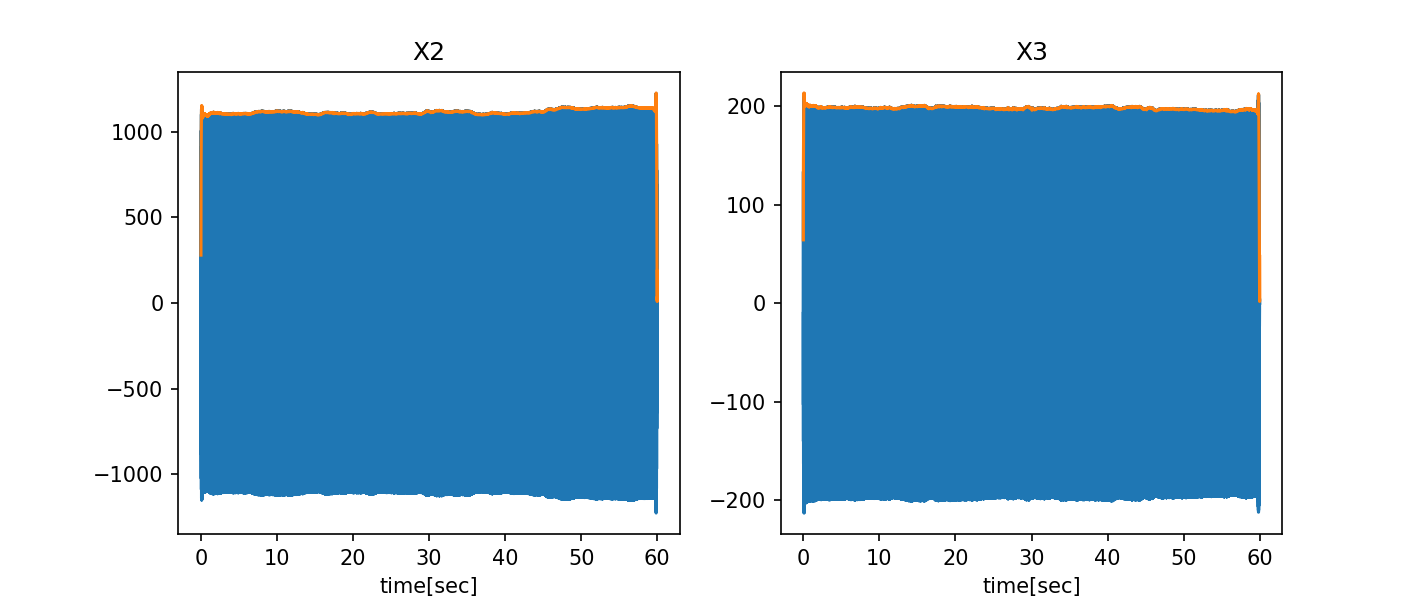

In [61]:
DManalyzer.plot_dataset(bdf_i=30,frequency=153)

In [147]:
_,ax = plt.subplots()
ax.loglog(10**limit_Hees[::2], 10**limit_Hees[1::2])

<IPython.core.display.Javascript object>

In [144]:
limit_Hees = np.array([-10.000000000000002, -7.038961038961039,
-9.61904761904762, -7.459889904334348,
-9.35930735930736, -7.756987868098976,
-9.151515151515152, -7.930468708246487,
-8.874458874458876, -8.15354604243493,
-8.666666666666668, -8.327026882582437,
-8.441558441558442, -8.401795735129069,
-8.181818181818183, -8.22975789642456,
-7.93939393939394, -7.958901181123403,
-7.783549783549784, -7.737159959382181,
-7.610389610389611, -7.5895462562129214,
-7.4025974025974035, -7.3679653679653665,
-7.212121212121213, -7.146331035219923,
-7.004329004329005, -6.9494415049970595,
-6.865800865800867, -6.801720912832023,
-6.606060606060606, -6.654374432152208,
-6.3982683982683985, -6.3587194698305805,
-6.190476190476191, -6.161829939607717,
-5.913419913419913, -5.891080113302335,
-5.670995670995671, -5.694297472075249,
-5.411255411255411, -5.522259633370744,
-5.255411255411255, -5.448666559777671,
-5.012987012987012, -5.227192560525893,
-4.874458874458874, -5.1041633263855495,
-4.632034632034631, -4.956763401207844,
-4.476190476190476, -4.735022179466622,
-4.320346320346319, -4.513280957725401,
-4.077922077922078, -4.291806958473623,
-3.99134199134199, -4.1686173908396125,
-3.8181818181818166, -3.9963123296456624,
-3.523809523809522, -3.972529528085083,
-3.2640692640692635, -3.973331195553417,
-3.004329004329003, -3.9988242210464433,
-2.7965367965367953, -3.9994655550211107,
-2.4848484848484826, -4.000427555983111,
-2.1385281385281374, -4.00149644594089,
-1.8787878787878771, -4.002298113409224,
-1.5844155844155825, -4.003206669873336,
-1.3246753246753222, -4.00400833734167,
-1.064935064935062, -4.029501362834696,
-0.7878787878787854, -4.030356474800919,
-0.49350649350649256, -4.031265031265031,
-0.2337662337662305, -4.032066698733365,
0.06060606060606233, -4.008283897172785,
0.2683982683982702, -4.033616589172144,
0.5974025974026009, -4.034632034632034,
0.8398268398268431, -3.9366148255037148,
1.0129870129870149, -3.8877665544332194,
1.2554112554112589, -3.8144407033295913,
1.480519480519483, -3.7163700497033823,
1.705627705627709, -3.5689166800277903,
1.948051948051953, -3.3474426807760134,
2.0865800865800903, -3.1750307305862853,
2.2077922077922114, -3.0025653358986677,
2.259740259740264, -2.9039602372935693,
2.4155844155844175, -2.855058521725188,
2.640692640692645, -2.7322965100742866,
2.935064935064938, -2.5603655603655593,
3.264069264069269, -2.38854149965261,
3.489177489177493, -2.290470846026402,
3.731601731601735, -2.167762278873389,
3.974025974025979, -2.045053711720378,
4.21645021645022, -1.922345144567366,
4.493506493506498, -1.7750521083854398,
4.683982683982691, -1.701565923788145,
4.94372294372295, -1.5789108011330226,
5.186147186147192, -1.4315108759553192,
5.619047619047624, -1.4328469884025425,
5.982683982683991, -1.4339693228582107,
6.121212121212128, -1.434396878841322,
6.329004329004334, -1.3856554967666073,
6.606060606060609, -1.3865106087328307,
6.8311688311688386, -1.3872053872053867,
7.108225108225113, -1.4127518571963007,
7.47186147186148, -1.4138741916519688,
7.783549783549791, -1.4148361926139703,
8.077922077922086, -1.4157447490780815,
8.389610389610397, -1.4413981080647735,
8.874458874458881, -1.319437763882208,
9.030303030303038, -1.2458446902891334,
9.203463203463212, -1.0982309871198757,
9.307359307359313, -0.851638073860296,
9.515151515151523, -0.48190903746459224,
9.619047619047624, -0.2353161242050117,
9.67099567099568, 0.036128480572925614,
9.757575757575761, 0.35684891240446825,
9.826839826839837, 0.6282400726845179,
9.84415584415585, 0.8997915664582341,
9.913419913419922, 1.1218000106889003,
9.98268398268399, 1.417882528993641,
9.98268398268399, 1.7635615413393202])